# Jupyter Notebook UI to graph your speed trace (with opto) data!

Version 1.3 - Joseph Liang, Rankin Lab
Updated:
1. Upgraded folder path selection application
2. Upgraded dataset management (less moving parts for end-user)
3. output changed from tif -> png

## Known bug: Step 2 an empty windows displays in Mac. May also apply to linux/windows.

## Beginner Essentials:
1. Shift-Enter to run each cell. After you run, you should see an output "done step #". If not, an error has occured
2. When inputting your own code/revising the code, make sure you close all your quotation marks '' and brackets (), [], {}.
3. Don't leave any commas (,) hanging! (make sure an object always follows a comma. If there is nothing after a comma, remove the comma!
4. Learning to code? Each line of code is annotated to help you understand how this code works!

## 3. Run all cells/steps sequentially, even the ones that do not require input

## Steps that require input: #3, #6.1, #7

# 1. Importing Packages Required (No input required, just run)

In [1]:
import pandas as pd #<- package used to import and organize data
import numpy as np #<- package used to import and organize data
import seaborn as sns #<- package used to plot graphs
from matplotlib import pyplot as plt #<- package used to plot graphs
import os #<- package used to work with system filepaths
from ipywidgets import widgets #<- widget tool to generate button
from IPython.display import display #<- displays button
from tkinter import Tk, filedialog #<- Tkinter is a GUI package
from tqdm.notebook import tqdm
import dask.dataframe as dd
import pingouin as pg
pd.set_option('display.max_columns', 50)
print("done step 1")

done step 1


# 2. Pick filepath (just run and click button)

Run the following cell and clicke the button 'Select Folder' to pick a filepath.

## Important: Later on, this script uses the total file path for each file to import and group data. That means if your folder has whatever your strain is named, the script will not work.

(ex. if your folder has "N2" in it this script sees all files inside this folder as having the "N2" search key)

## An easy fix is to just rename your folder to something else (make your strains lower-case, or just have the date)

In [2]:
### Select Folder App - After you run, you can select your folder for filepath
button = widgets.Button(description = 'Select Folder') #<- creates a button variable
display(button) #<- displays the button in output

def select_folder(b): #<- defines an action. This action requires a variable, so an arbitrary one 'b' is there
    global folder_path #<- sets a variable as a global variable, not just within this action
    #Tk().withdraw() #<- Tkinter likes to create annoying empty windows. This removes them
    folder_path = filedialog.askdirectory() #<- Opens up a file explorer window, and determines folder path
    #Tk().update() #<- below
    #Tk().destroy() #<- this and the line above it removes the file explorer window after a selection is made
    print(folder_path) #<- this helps confirm that this action was performed
    print('done step 2')
button.on_click(select_folder)

Button(description='Select Folder', style=ButtonStyle())

# 3. User Defined Variables (Add input here)

Here, we add some constants to help you blaze through this code.

## 3.1: Setting time bins
pretty self explanatory



## 3.2: Setting view range for your graph
Top, bottom = y axis view range
left, right = x axis view range



In [3]:
# Setting 1s Bins: for 0.5s Bins: 0,360,721
# bins = np.linspace(0,360,721) #<- np.linspace(start, end, steps in between)
# bins = np.linspace(0,420,841) #<- np.linspace(start, end, steps in between)
bins = np.linspace(0,420,421) # 1 second bins (smoother lines on graph)
print(bins)


print("done step 3")

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.
 196. 

# 4. Construct filelist from folder path (No input required, just run)

In [4]:
#folder_path = '/Users/Joseph/Desktop/lrk1_ATR_NoATR_08_15_2019'
print(folder_path)
os.chdir(folder_path) #<- setting your working directory so that your images will be saved here

filelist = list() #<- empty list
for root, dirs, files in os.walk(folder_path): #<- this for loop goes through your folder 
    for name in files:
        if name.endswith('.dat'): #<- and takes out all files with a .dat (file that contains your data)
            filepath = os.path.join(root, name) #<- Notes down the file path of each data file
            filelist.append(filepath) #<- saves it into the list
    
print(filelist)
print('done step 4')

/Volumes/JosephBSR
['/Volumes/JosephBSR/bas-1(tm351)_OffFood/20220616_120429/LC33_6x2_n72h20C_420s_C0616_LN4.00001.dat', '/Volumes/JosephBSR/bas-1(tm351)_OffFood/20220616_120429/LC33_6x2_n72h20C_420s_C0616_LN4.00002.dat', '/Volumes/JosephBSR/bas-1(tm351)_OffFood/20220616_120429/LC33_6x2_n72h20C_420s_C0616_LN4.00003.dat', '/Volumes/JosephBSR/bas-1(tm351)_OffFood/20220616_120429/LC33_6x2_n72h20C_420s_C0616_LN4.00004.dat', '/Volumes/JosephBSR/bas-1(tm351)_OffFood/20220616_120429/LC33_6x2_n72h20C_420s_C0616_LN4.00005.dat', '/Volumes/JosephBSR/bas-1(tm351)_OffFood/20220616_120429/LC33_6x2_n72h20C_420s_C0616_LN4.00007.dat', '/Volumes/JosephBSR/bas-1(tm351)_OffFood/20220616_120429/LC33_6x2_n72h20C_420s_C0616_LN4.00008.dat', '/Volumes/JosephBSR/bas-1(tm351)_OffFood/20220616_120429/LC33_6x2_n72h20C_420s_C0616_LN4.00009.dat', '/Volumes/JosephBSR/bas-1(tm351)_OffFood/20220616_120429/LC33_6x2_n72h20C_420s_C0616_LN4.00011.dat', '/Volumes/JosephBSR/bas-1(tm351)_OffFood/20220616_120429/LC33_6x2_n72h2

# 5. Process Data Function (No input required, just run)

In [5]:
def ProcessData(strain): #<- an example of a user-defined function
    strain_filelist = []  #<- empty list
    for i in filelist: #<- goes through the list and filters for keyword
        if strain in i:
            strain_filelist.append(i)
    Strain_N = len(strain_filelist) #<- N per strain, or number of plates
    print(f'This Strain has {Strain_N} worms tracked') #<- prints out number of plates per strain
    for i, f in tqdm(enumerate(strain_filelist, start=1)): #<- a progress bar function integrated into data import
        N = len(strain_filelist)
        statement = f"Processing {i} of {N} worms" #<- progress bar statement
        DF_Read = pd.read_csv(f, sep=' ', skiprows = 0, header = None) #<- imports and cleans data
        if i==1:
            DF_Total = DF_Read
            DF_Total = DF_Total.dropna(axis=0)
            DF_Total["worm"]=i
#             DF_Total["x_0"] = DF_Total.iloc[:,2] - DF_Total.iloc[0,2]
#             DF_Total["y_0"] = DF_Total.iloc[:,3] - DF_Total.iloc[0,3]
#             pathlen_i = np.array(DF_Total.iloc[1:,5])
#             pathlen_i_1 = np.array(DF_Total.iloc[0:-1,5])
#             result = np.abs(pathlen_i - pathlen_i_1).tolist()
#             result.insert(0,0)
#             resultS=pd.Series(result)
#             DF_Total["distance"]=resultS.cumsum()
            DF_Total=DF_Total.dropna()
#             print(DF_Total)
        else:
            DF_Add = DF_Read
            DF_Add = DF_Add.dropna(axis=0)
            DF_Add["worm"]=i
#             DF_Add["x_0"] = DF_Add.iloc[:,2] - DF_Add.iloc[0,2]
#             DF_Add["y_0"] = DF_Add.iloc[:,3] - DF_Add.iloc[0,3]
#             pathlen_i = np.array(DF_Add.iloc[1:,5])
#             pathlen_i_1 = np.array(DF_Add.iloc[0:-1,5])
#             result = np.abs(pathlen_i - pathlen_i_1).tolist()
#             result.insert(0,0)
#             resultS=pd.Series(result)
#             DF_Add["distance"]=resultS.cumsum()
#             DF_Add = DF_Add.dropna()
            DF_Total = pd.concat((DF_Total, DF_Add), ignore_index = True)  #<- imports and cleans data
        print(statement)
#         print(DF_Total)
    DF_Total = DF_Total.dropna(axis = 0) #<- more data cleaning
    DF_Total = DF_Total.rename( #<- more data cleaning
                {0:'time',
                1:'speed',
                2: "x",
                3: "y",
                4: "angularspeed",
                5: "pathlength",
                6: "kink",
                7: "bias",
                8: "curve",
                9: "dir",
                10: "crab",
                11: "length",
                12: "midline",
                13: "width",
                14: "morphwidth",
                15: "area"
                }, axis=1)
#     print(DF_Total)

    #0.5s Bins
    Bins = [float(i) for i in bins] #<- adds time bins into the data frame
    DF_Total['time_bin'] = pd.cut(DF_Total['time'], Bins, labels = Bins[1:])
    DF_Total['time_bin'] = DF_Total['time_bin'].astype(np.float64)
    DF_time_bin=DF_Total.groupby(["time_bin", "worm"], as_index=False).mean()
#     print(DF_time_bin)
    #     DF_Speed_DF = DF_Total[["time", "time_bin", "speed", "x", "y", "x_0","y_0", "pathlength", "worm"]].copy()
    
    return{
            'N': Strain_N,
            'Confirm':DF_time_bin, #DF_Total if want to non-binned data
#             'Speed_DF': DF_Speed_DF, #<- this is the finished product we will use for analysis
            'Filelist':strain_filelist} 

print('done step 5')

done step 5


# 6.1 Processing Data (Please Read, Input Here)

Here is the hardest part - From your naming convention, you need to pick a unique identifier for each group.

This means that all of names of your files for that strain should have that in common but is not commone with across all other files! If you did a good job naming your files and following a good naming convention, this should be easy.

## Be careful and really look hard in your naming structure. Note you want an unique identifier in the entire file path for the same group of files. An easy mistake is to have the strain name in the folder name, in this case if you use your strain name as a keyword it would include all files in that folder!

For example, if all your N2 files have a certain pattern like "N2_5x4" in this following example:
'/Users/Joseph/Desktop/AVR14_10sISI_TapHab_0710_2019/N2/20190710_141740/N2_5x4_f94h20c_100s30x10s10s_C0710ab.trv'

Then you need to set that identifier for the strain keyword:
'Strain_1' = 'N2_5x4'

In the same example, if the identifier for your second strain is 'AVR14', then the N2 files will also be included, as this identifier can also be found in this file path.

## Depending on how many strains you are running for comparison, you may need to add/delete some lines.

You are not naming your data groups here, we have a step for that later.
## Here, you want to note down ALL the strains you have in the folder

If you have just 2 strains, add hashtags (#) in front of the lines you do not need.
If you need more strains, just add more lines, following the same format!

In [6]:
# TotalConcatenated[['Genotype', 'Treatment']] = TotalConcatenated['Strain'].str.split(' - ', 1, expand=True)
# print(list(set(filelist)))
# nfiles = list(range(1, len(filelist.unique())+1))
# print(nfiles)
# strainnames = []
strainnames=[]
for f in filelist:
    strainnames.append(f.split('/')[3])
ustrainnames=list(set(strainnames))
# print(ustrainnames)
ustrainnames.sort()
# print(ustrainnames)
ustrainnames.insert(0, ustrainnames.pop(ustrainnames.index("N2_OnFood")))
# print(ustrainnames)
ustrainnames.insert(0, ustrainnames.pop(ustrainnames.index("N2_OffFood")))
# print(ustrainnames)
nstrains=list(range(1,len(ustrainnames)+1))
# print(nstrains)

StrainNames = {}
StrainNames = {nstrains[i]: ustrainnames[i] for i in range(len(nstrains))}
print(StrainNames)
print("done step 6.1")

# <---------------- Test element to use for dictionary buidling -------------------
# s = '/Users/Joseph/Desktop/OnFoodOffFoodTest/N2_OnFood/20220401_163048/N2_10x1_n96h20C_360sA0401_ka.00065.dat'
# slist=s.split('/')[5]
# print(slist)
# print(list(range(1,5+1)))

{1: 'N2_OffFood', 2: 'N2_OnFood', 3: 'F53B2.5(ok226)_OffFood', 4: 'F53B2.5(ok226)_OnFood', 5: 'Y18D10A.22(ok3535)_OffFood', 6: 'Y18D10A.22(ok3535)_OnFood', 7: 'bas-1(tm351)_OffFood', 8: 'bas-1(tm351)_OnFood', 9: 'cat-1(e1111)_OffFood', 10: 'cat-1(e1111)_OnFood', 11: 'cat-1(ok411)_OffFood', 12: 'cat-1(ok411)_OnFood', 13: 'cat-2(e1112)_OffFood', 14: 'cat-2(e1112)_OnFood', 15: 'djr-1.2(tm1346)_OffFood', 16: 'djr-1.2(tm1346)_OnFood', 17: 'dop-1(vs101)_OffFood', 18: 'dop-1(vs101)_OnFood', 19: 'dop-3(ok295)_OffFood', 20: 'dop-3(ok295)_OnFood', 21: 'dop-3(tm1356)_OffFood', 22: 'dop-3(tm1356)_OnFood', 23: 'gba-3(gk3287)_OffFood', 24: 'gba-3(gk3287)_OnFood', 25: 'gba-3(tm3302)_OffFood', 26: 'gba-3(tm3302)_OnFood', 27: 'gck-3(tm1296)_OffFood', 28: 'gck-3(tm1296)_OnFood', 29: 'glo-1(tm3240)_OffFood', 30: 'glo-1(tm3240)_OnFood', 31: 'glo-1(zu391)_OffFood', 32: 'glo-1(zu391)_Onfood', 33: 'let-19(gk149538)_OffFood', 34: 'let-19(gk149538)_OnFood', 35: 'lrk-1(tm1898)_OffFood', 36: 'lrk-1(tm1898)_OnFoo

In [ ]:
# ------------This Cell Is Now Defunct ----------------


# #Format: Strain_# = 'unique_identifier'

# ### Make into dictionary
# StrainNames = {
#     'Strain_1' : 'N2_OffFood',   #<- each strain will be designated to a unique identifier here
# #     'Strain_2' : 'N2_OnFood',
# #     'Strain_3' : 'e1112_OffFood',
# #     'Strain_4' : 'e1112_OnFood',
# #     'Strain_5' : 'Test_OffFood',
# #     'Strain_6' : 'Test_OnFood',
# #     'Strain_5' : 'N2_NoFood',
# #     'Strain_6' : 'N2_Food',
# #     'Strain_9' : 'LX636_NoFood',  #<- empty entries are for those hardcore trackers that tracking this many strains
# #     'Strain_10' : 'LX636_Food',
# #     'Strain_11' : '',
# #     'Strain_12' : '',
# #     'Strain_13' : '',
# #     'Strain_14' : '',
# #     'Strain_15' : '',
# }
# #...etc, etc

# print('done step 6.1')
# print(StrainNames)

# Cell below is to run testing/debugging. Do not need to run (commented out)

In [ ]:


# DF_Read = pd.read_csv('/Users/Joseph/Desktop/OnFoodOffFoodTest/N2_OnFood/20220401_163048/N2_10x1_n96h20C_360sA0401_ka.00065.dat'
#                       , sep=' ', header = None, index_col=False) #<- imports and cleans data
# DF_Read["worm"]=1
# # print(DF_Read)
# DF_Total = DF_Read #<- more data cleaning
# DF_Total = DF_Total.rename( #<- more data cleaning
#             {0:'time',
#             1:'speed',
#             2: "x",
#             3: "y",
#             4: "angularspeed",
#             5: "pathlength",
#             6: "kink",
#             7: "bias",
#             8: "curve",
#             9: "dir",
#             10: "crab",
#             11: "length",
#             12: "midline",
#             13: "width",
#             14: "morphwidth",
#             15: "area"
#             }, axis=1)
# DF_Total["x_0"] = DF_Total.x - DF_Total.x.iloc[0]
# DF_Total["y_0"] = DF_Total.y - DF_Total.y.iloc[0]

# DF_Total["x_test"] = DF_Total.iloc[:,2] - DF_Total.iloc[0,2]
# DF_Total["y_test"] = DF_Total.iloc[:,3] - DF_Total.iloc[0,3]
# DF_Total["distance"]= 0
print(DF_Total)

# A_i = np.array(DF_Total['pathlength'][1:])
# A_i_1 = np.array(DF_Total['pathlength'][0:-1])
# result = np.abs(A_i - A_i_1).tolist()
# result.insert(0,0)
# curr_sum = 0
# new_list = []
# for i in range(len(result)):
#     curr_sum += result[i]
#     new_list.append(curr_sum)
# DF_Total["distance"]=new_list
# print(DF_Total)



        


# A_i = np.array(DF_Total.iloc[1:,5])
# A_i_1 = np.array(DF_Total.iloc[0:-1,5])
# result = np.abs(A_i - A_i_1).tolist()
# result.insert(0,0)
# curr_sum = 0
# new_list = []
# for i in range(len(result)):
#     curr_sum += result[i]
#     new_list.append(curr_sum)
# print(A_i)
# print(A_i_1)
# print(len(A_i))
# print(len(A_i_1))
# # resultS=pd.Series(result)
# # print(resultS.cumsum())
# # print(new_list)

# curr_sum = 0
# new_list = []
# for i in range(len(result)):
#     curr_sum += result[i]
#     new_list.append(curr_sum)
    
    
# import matplotlib.pyplot as plt
# plt.plot(new_list)

# 6.2 Process Data (just run this cell)

In [7]:
DataLists = [0] #<- generates empty list. 0 is there to account for python's index starting at 0. 
# we want indexing to start at 1 (when I say #1 I want the first point, not the second point)

for s in tqdm(StrainNames.values()): #<- goes through the dictionary in step 6.1 and processes data
    if not s == '':
        DataLists.append(ProcessData(s)['Confirm']) #<- appends all data into a list of dataframes
# print(DataLists[2])
print('done step 6.2')

  0%|          | 0/50 [00:00<?, ?it/s]

This Strain has 2752 worms tracked


0it [00:00, ?it/s]

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Total["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Processing 1 of 2752 worms
Processing 2 of 2752 worms
Processing 3 of 2752 worms
Processing 4 of 2752 worms
Processing 5 of 2752 worms
Processing 6 of 2752 worms
Processing 7 of 2752 worms
Processing 8 of 2752 worms
Processing 9 of 2752 worms
Processing 10 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 11 of 2752 worms
Processing 12 of 2752 worms
Processing 13 of 2752 worms
Processing 14 of 2752 worms
Processing 15 of 2752 worms
Processing 16 of 2752 worms
Processing 17 of 2752 worms
Processing 18 of 2752 worms
Processing 19 of 2752 worms
Processing 20 of 2752 worms
Processing 21 of 2752 worms
Processing 22 of 2752 worms
Processing 23 of 2752 worms
Processing 24 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 25 of 2752 worms
Processing 26 of 2752 worms
Processing 27 of 2752 worms
Processing 28 of 2752 worms
Processing 29 of 2752 worms
Processing 30 of 2752 worms
Processing 31 of 2752 worms
Processing 32 of 2752 worms
Processing 33 of 2752 worms
Processing 34 of 2752 worms
Processing 35 of 2752 worms
Processing 36 of 2752 worms
Processing 37 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 38 of 2752 worms
Processing 39 of 2752 worms
Processing 40 of 2752 worms
Processing 41 of 2752 worms
Processing 42 of 2752 worms
Processing 43 of 2752 worms
Processing 44 of 2752 worms
Processing 45 of 2752 worms
Processing 46 of 2752 worms
Processing 47 of 2752 worms
Processing 48 of 2752 worms
Processing 49 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 50 of 2752 worms
Processing 51 of 2752 worms
Processing 52 of 2752 worms
Processing 53 of 2752 worms
Processing 54 of 2752 worms
Processing 55 of 2752 worms
Processing 56 of 2752 worms
Processing 57 of 2752 worms
Processing 58 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 59 of 2752 worms
Processing 60 of 2752 worms
Processing 61 of 2752 worms
Processing 62 of 2752 worms
Processing 63 of 2752 worms
Processing 64 of 2752 worms
Processing 65 of 2752 worms
Processing 66 of 2752 worms
Processing 67 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 68 of 2752 worms
Processing 69 of 2752 worms
Processing 70 of 2752 worms
Processing 71 of 2752 worms
Processing 72 of 2752 worms
Processing 73 of 2752 worms
Processing 74 of 2752 worms
Processing 75 of 2752 worms
Processing 76 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 77 of 2752 worms
Processing 78 of 2752 worms
Processing 79 of 2752 worms
Processing 80 of 2752 worms
Processing 81 of 2752 worms
Processing 82 of 2752 worms
Processing 83 of 2752 worms
Processing 84 of 2752 worms
Processing 85 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 86 of 2752 worms
Processing 87 of 2752 worms
Processing 88 of 2752 worms
Processing 89 of 2752 worms
Processing 90 of 2752 worms
Processing 91 of 2752 worms
Processing 92 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 93 of 2752 worms
Processing 94 of 2752 worms
Processing 95 of 2752 worms
Processing 96 of 2752 worms
Processing 97 of 2752 worms
Processing 98 of 2752 worms
Processing 99 of 2752 worms
Processing 100 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 101 of 2752 worms
Processing 102 of 2752 worms
Processing 103 of 2752 worms
Processing 104 of 2752 worms
Processing 105 of 2752 worms
Processing 106 of 2752 worms
Processing 107 of 2752 worms
Processing 108 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 109 of 2752 worms
Processing 110 of 2752 worms
Processing 111 of 2752 worms
Processing 112 of 2752 worms
Processing 113 of 2752 worms
Processing 114 of 2752 worms
Processing 115 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 116 of 2752 worms
Processing 117 of 2752 worms
Processing 118 of 2752 worms
Processing 119 of 2752 worms
Processing 120 of 2752 worms
Processing 121 of 2752 worms
Processing 122 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 123 of 2752 worms
Processing 124 of 2752 worms
Processing 125 of 2752 worms
Processing 126 of 2752 worms
Processing 127 of 2752 worms
Processing 128 of 2752 worms
Processing 129 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 130 of 2752 worms
Processing 131 of 2752 worms
Processing 132 of 2752 worms
Processing 133 of 2752 worms
Processing 134 of 2752 worms
Processing 135 of 2752 worms
Processing 136 of 2752 worms
Processing 137 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 138 of 2752 worms
Processing 139 of 2752 worms
Processing 140 of 2752 worms
Processing 141 of 2752 worms
Processing 142 of 2752 worms
Processing 143 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 144 of 2752 worms
Processing 145 of 2752 worms
Processing 146 of 2752 worms
Processing 147 of 2752 worms
Processing 148 of 2752 worms
Processing 149 of 2752 worms
Processing 150 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 151 of 2752 worms
Processing 152 of 2752 worms
Processing 153 of 2752 worms
Processing 154 of 2752 worms
Processing 155 of 2752 worms
Processing 156 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 157 of 2752 worms
Processing 158 of 2752 worms
Processing 159 of 2752 worms
Processing 160 of 2752 worms
Processing 161 of 2752 worms
Processing 162 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 163 of 2752 worms
Processing 164 of 2752 worms
Processing 165 of 2752 worms
Processing 166 of 2752 worms
Processing 167 of 2752 worms
Processing 168 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 169 of 2752 worms
Processing 170 of 2752 worms
Processing 171 of 2752 worms
Processing 172 of 2752 worms
Processing 173 of 2752 worms
Processing 174 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 175 of 2752 worms
Processing 176 of 2752 worms
Processing 177 of 2752 worms
Processing 178 of 2752 worms
Processing 179 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 180 of 2752 worms
Processing 181 of 2752 worms
Processing 182 of 2752 worms
Processing 183 of 2752 worms
Processing 184 of 2752 worms
Processing 185 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 186 of 2752 worms
Processing 187 of 2752 worms
Processing 188 of 2752 worms
Processing 189 of 2752 worms
Processing 190 of 2752 worms
Processing 191 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 192 of 2752 worms
Processing 193 of 2752 worms
Processing 194 of 2752 worms
Processing 195 of 2752 worms
Processing 196 of 2752 worms
Processing 197 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 198 of 2752 worms
Processing 199 of 2752 worms
Processing 200 of 2752 worms
Processing 201 of 2752 worms
Processing 202 of 2752 worms
Processing 203 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 204 of 2752 worms
Processing 205 of 2752 worms
Processing 206 of 2752 worms
Processing 207 of 2752 worms
Processing 208 of 2752 worms
Processing 209 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 210 of 2752 worms
Processing 211 of 2752 worms
Processing 212 of 2752 worms
Processing 213 of 2752 worms
Processing 214 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 215 of 2752 worms
Processing 216 of 2752 worms
Processing 217 of 2752 worms
Processing 218 of 2752 worms
Processing 219 of 2752 worms
Processing 220 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 221 of 2752 worms
Processing 222 of 2752 worms
Processing 223 of 2752 worms
Processing 224 of 2752 worms
Processing 225 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 226 of 2752 worms
Processing 227 of 2752 worms
Processing 228 of 2752 worms
Processing 229 of 2752 worms
Processing 230 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 231 of 2752 worms
Processing 232 of 2752 worms
Processing 233 of 2752 worms
Processing 234 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 235 of 2752 worms
Processing 236 of 2752 worms
Processing 237 of 2752 worms
Processing 238 of 2752 worms
Processing 239 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 240 of 2752 worms
Processing 241 of 2752 worms
Processing 242 of 2752 worms
Processing 243 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 244 of 2752 worms
Processing 245 of 2752 worms
Processing 246 of 2752 worms
Processing 247 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 248 of 2752 worms
Processing 249 of 2752 worms
Processing 250 of 2752 worms
Processing 251 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 252 of 2752 worms
Processing 253 of 2752 worms
Processing 254 of 2752 worms
Processing 255 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 256 of 2752 worms
Processing 257 of 2752 worms
Processing 258 of 2752 worms
Processing 259 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 260 of 2752 worms
Processing 261 of 2752 worms
Processing 262 of 2752 worms
Processing 263 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 264 of 2752 worms
Processing 265 of 2752 worms
Processing 266 of 2752 worms
Processing 267 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 268 of 2752 worms
Processing 269 of 2752 worms
Processing 270 of 2752 worms
Processing 271 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 272 of 2752 worms
Processing 273 of 2752 worms
Processing 274 of 2752 worms
Processing 275 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 276 of 2752 worms
Processing 277 of 2752 worms
Processing 278 of 2752 worms
Processing 279 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 280 of 2752 worms
Processing 281 of 2752 worms
Processing 282 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 283 of 2752 worms
Processing 284 of 2752 worms
Processing 285 of 2752 worms
Processing 286 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 287 of 2752 worms
Processing 288 of 2752 worms
Processing 289 of 2752 worms
Processing 290 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 291 of 2752 worms
Processing 292 of 2752 worms
Processing 293 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 294 of 2752 worms
Processing 295 of 2752 worms
Processing 296 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 297 of 2752 worms
Processing 298 of 2752 worms
Processing 299 of 2752 worms
Processing 300 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 301 of 2752 worms
Processing 302 of 2752 worms
Processing 303 of 2752 worms
Processing 304 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 305 of 2752 worms
Processing 306 of 2752 worms
Processing 307 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 308 of 2752 worms
Processing 309 of 2752 worms
Processing 310 of 2752 worms
Processing 311 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 312 of 2752 worms
Processing 313 of 2752 worms
Processing 314 of 2752 worms
Processing 315 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 316 of 2752 worms
Processing 317 of 2752 worms
Processing 318 of 2752 worms
Processing 319 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 320 of 2752 worms
Processing 321 of 2752 worms
Processing 322 of 2752 worms
Processing 323 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 324 of 2752 worms
Processing 325 of 2752 worms
Processing 326 of 2752 worms
Processing 327 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 328 of 2752 worms
Processing 329 of 2752 worms
Processing 330 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 331 of 2752 worms
Processing 332 of 2752 worms
Processing 333 of 2752 worms
Processing 334 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 335 of 2752 worms
Processing 336 of 2752 worms
Processing 337 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 338 of 2752 worms
Processing 339 of 2752 worms
Processing 340 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 341 of 2752 worms
Processing 342 of 2752 worms
Processing 343 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 344 of 2752 worms
Processing 345 of 2752 worms
Processing 346 of 2752 worms
Processing 347 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 348 of 2752 worms
Processing 349 of 2752 worms
Processing 350 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 351 of 2752 worms
Processing 352 of 2752 worms
Processing 353 of 2752 worms
Processing 354 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 355 of 2752 worms
Processing 356 of 2752 worms
Processing 357 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 358 of 2752 worms
Processing 359 of 2752 worms
Processing 360 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 361 of 2752 worms
Processing 362 of 2752 worms
Processing 363 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 364 of 2752 worms
Processing 365 of 2752 worms
Processing 366 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 367 of 2752 worms
Processing 368 of 2752 worms
Processing 369 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 370 of 2752 worms
Processing 371 of 2752 worms
Processing 372 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 373 of 2752 worms
Processing 374 of 2752 worms
Processing 375 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 376 of 2752 worms
Processing 377 of 2752 worms
Processing 378 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 379 of 2752 worms
Processing 380 of 2752 worms
Processing 381 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 382 of 2752 worms
Processing 383 of 2752 worms
Processing 384 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 385 of 2752 worms
Processing 386 of 2752 worms
Processing 387 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 388 of 2752 worms
Processing 389 of 2752 worms
Processing 390 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 391 of 2752 worms
Processing 392 of 2752 worms
Processing 393 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 394 of 2752 worms
Processing 395 of 2752 worms
Processing 396 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 397 of 2752 worms
Processing 398 of 2752 worms
Processing 399 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 400 of 2752 worms
Processing 401 of 2752 worms
Processing 402 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 403 of 2752 worms
Processing 404 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 405 of 2752 worms
Processing 406 of 2752 worms
Processing 407 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 408 of 2752 worms
Processing 409 of 2752 worms
Processing 410 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 411 of 2752 worms
Processing 412 of 2752 worms
Processing 413 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 414 of 2752 worms
Processing 415 of 2752 worms
Processing 416 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 417 of 2752 worms
Processing 418 of 2752 worms
Processing 419 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 420 of 2752 worms
Processing 421 of 2752 worms
Processing 422 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 423 of 2752 worms
Processing 424 of 2752 worms
Processing 425 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 426 of 2752 worms
Processing 427 of 2752 worms
Processing 428 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 429 of 2752 worms
Processing 430 of 2752 worms
Processing 431 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 432 of 2752 worms
Processing 433 of 2752 worms
Processing 434 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 435 of 2752 worms
Processing 436 of 2752 worms
Processing 437 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 438 of 2752 worms
Processing 439 of 2752 worms
Processing 440 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 441 of 2752 worms
Processing 442 of 2752 worms
Processing 443 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 444 of 2752 worms
Processing 445 of 2752 worms
Processing 446 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 447 of 2752 worms
Processing 448 of 2752 worms
Processing 449 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 450 of 2752 worms
Processing 451 of 2752 worms
Processing 452 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 453 of 2752 worms
Processing 454 of 2752 worms
Processing 455 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 456 of 2752 worms
Processing 457 of 2752 worms
Processing 458 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 459 of 2752 worms
Processing 460 of 2752 worms
Processing 461 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 462 of 2752 worms
Processing 463 of 2752 worms
Processing 464 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 465 of 2752 worms
Processing 466 of 2752 worms
Processing 467 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 468 of 2752 worms
Processing 469 of 2752 worms
Processing 470 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 471 of 2752 worms
Processing 472 of 2752 worms
Processing 473 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 474 of 2752 worms
Processing 475 of 2752 worms
Processing 476 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 477 of 2752 worms
Processing 478 of 2752 worms
Processing 479 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 480 of 2752 worms
Processing 481 of 2752 worms
Processing 482 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 483 of 2752 worms
Processing 484 of 2752 worms
Processing 485 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 486 of 2752 worms
Processing 487 of 2752 worms
Processing 488 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 489 of 2752 worms
Processing 490 of 2752 worms
Processing 491 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 492 of 2752 worms
Processing 493 of 2752 worms
Processing 494 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 495 of 2752 worms
Processing 496 of 2752 worms
Processing 497 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 498 of 2752 worms
Processing 499 of 2752 worms
Processing 500 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 501 of 2752 worms
Processing 502 of 2752 worms
Processing 503 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 504 of 2752 worms
Processing 505 of 2752 worms
Processing 506 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 507 of 2752 worms
Processing 508 of 2752 worms
Processing 509 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 510 of 2752 worms
Processing 511 of 2752 worms
Processing 512 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 513 of 2752 worms
Processing 514 of 2752 worms
Processing 515 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 516 of 2752 worms
Processing 517 of 2752 worms
Processing 518 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 519 of 2752 worms
Processing 520 of 2752 worms
Processing 521 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 522 of 2752 worms
Processing 523 of 2752 worms
Processing 524 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 525 of 2752 worms
Processing 526 of 2752 worms
Processing 527 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 528 of 2752 worms
Processing 529 of 2752 worms
Processing 530 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 531 of 2752 worms
Processing 532 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 533 of 2752 worms
Processing 534 of 2752 worms
Processing 535 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 536 of 2752 worms
Processing 537 of 2752 worms
Processing 538 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 539 of 2752 worms
Processing 540 of 2752 worms
Processing 541 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 542 of 2752 worms
Processing 543 of 2752 worms
Processing 544 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 545 of 2752 worms
Processing 546 of 2752 worms
Processing 547 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 548 of 2752 worms
Processing 549 of 2752 worms
Processing 550 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 551 of 2752 worms
Processing 552 of 2752 worms
Processing 553 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 554 of 2752 worms
Processing 555 of 2752 worms
Processing 556 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 557 of 2752 worms
Processing 558 of 2752 worms
Processing 559 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 560 of 2752 worms
Processing 561 of 2752 worms
Processing 562 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 563 of 2752 worms
Processing 564 of 2752 worms
Processing 565 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 566 of 2752 worms
Processing 567 of 2752 worms
Processing 568 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 569 of 2752 worms
Processing 570 of 2752 worms
Processing 571 of 2752 worms
Processing 572 of 2752 worms
Processing 573 of 2752 worms
Processing 574 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 575 of 2752 worms
Processing 576 of 2752 worms
Processing 577 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 578 of 2752 worms
Processing 579 of 2752 worms
Processing 580 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 581 of 2752 worms
Processing 582 of 2752 worms
Processing 583 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 584 of 2752 worms
Processing 585 of 2752 worms
Processing 586 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 587 of 2752 worms
Processing 588 of 2752 worms
Processing 589 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 590 of 2752 worms
Processing 591 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 592 of 2752 worms
Processing 593 of 2752 worms
Processing 594 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 595 of 2752 worms
Processing 596 of 2752 worms
Processing 597 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 598 of 2752 worms
Processing 599 of 2752 worms
Processing 600 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 601 of 2752 worms
Processing 602 of 2752 worms
Processing 603 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 604 of 2752 worms
Processing 605 of 2752 worms
Processing 606 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 607 of 2752 worms
Processing 608 of 2752 worms
Processing 609 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 610 of 2752 worms
Processing 611 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 612 of 2752 worms
Processing 613 of 2752 worms
Processing 614 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 615 of 2752 worms
Processing 616 of 2752 worms
Processing 617 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 618 of 2752 worms
Processing 619 of 2752 worms
Processing 620 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 621 of 2752 worms
Processing 622 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 623 of 2752 worms
Processing 624 of 2752 worms
Processing 625 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 626 of 2752 worms
Processing 627 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 628 of 2752 worms
Processing 629 of 2752 worms
Processing 630 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 631 of 2752 worms
Processing 632 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 633 of 2752 worms
Processing 634 of 2752 worms
Processing 635 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 636 of 2752 worms
Processing 637 of 2752 worms
Processing 638 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 639 of 2752 worms
Processing 640 of 2752 worms
Processing 641 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 642 of 2752 worms
Processing 643 of 2752 worms
Processing 644 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 645 of 2752 worms
Processing 646 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 647 of 2752 worms
Processing 648 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 649 of 2752 worms
Processing 650 of 2752 worms
Processing 651 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 652 of 2752 worms
Processing 653 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 654 of 2752 worms
Processing 655 of 2752 worms
Processing 656 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 657 of 2752 worms
Processing 658 of 2752 worms
Processing 659 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 660 of 2752 worms
Processing 661 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 662 of 2752 worms
Processing 663 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 664 of 2752 worms
Processing 665 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 666 of 2752 worms
Processing 667 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 668 of 2752 worms
Processing 669 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 670 of 2752 worms
Processing 671 of 2752 worms
Processing 672 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 673 of 2752 worms
Processing 674 of 2752 worms
Processing 675 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 676 of 2752 worms
Processing 677 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 678 of 2752 worms
Processing 679 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 680 of 2752 worms
Processing 681 of 2752 worms
Processing 682 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 683 of 2752 worms
Processing 684 of 2752 worms
Processing 685 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 686 of 2752 worms
Processing 687 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 688 of 2752 worms
Processing 689 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 690 of 2752 worms
Processing 691 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 692 of 2752 worms
Processing 693 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 694 of 2752 worms
Processing 695 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 696 of 2752 worms
Processing 697 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 698 of 2752 worms
Processing 699 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 700 of 2752 worms
Processing 701 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 702 of 2752 worms
Processing 703 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 704 of 2752 worms
Processing 705 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 706 of 2752 worms
Processing 707 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 708 of 2752 worms
Processing 709 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 710 of 2752 worms
Processing 711 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 712 of 2752 worms
Processing 713 of 2752 worms
Processing 714 of 2752 worms
Processing 715 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 716 of 2752 worms
Processing 717 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 718 of 2752 worms
Processing 719 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 720 of 2752 worms
Processing 721 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 722 of 2752 worms
Processing 723 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 724 of 2752 worms
Processing 725 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 726 of 2752 worms
Processing 727 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 728 of 2752 worms
Processing 729 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 730 of 2752 worms
Processing 731 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 732 of 2752 worms
Processing 733 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 734 of 2752 worms
Processing 735 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 736 of 2752 worms
Processing 737 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 738 of 2752 worms
Processing 739 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 740 of 2752 worms
Processing 741 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 742 of 2752 worms
Processing 743 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 744 of 2752 worms
Processing 745 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 746 of 2752 worms
Processing 747 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 748 of 2752 worms
Processing 749 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 750 of 2752 worms
Processing 751 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 752 of 2752 worms
Processing 753 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 754 of 2752 worms
Processing 755 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 756 of 2752 worms
Processing 757 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 758 of 2752 worms
Processing 759 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 760 of 2752 worms
Processing 761 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 762 of 2752 worms
Processing 763 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 764 of 2752 worms
Processing 765 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 766 of 2752 worms
Processing 767 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 768 of 2752 worms
Processing 769 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 770 of 2752 worms
Processing 771 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 772 of 2752 worms
Processing 773 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 774 of 2752 worms
Processing 775 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 776 of 2752 worms
Processing 777 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 778 of 2752 worms
Processing 779 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 780 of 2752 worms
Processing 781 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 782 of 2752 worms
Processing 783 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 784 of 2752 worms
Processing 785 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 786 of 2752 worms
Processing 787 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 788 of 2752 worms
Processing 789 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 790 of 2752 worms
Processing 791 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 792 of 2752 worms
Processing 793 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 794 of 2752 worms
Processing 795 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 796 of 2752 worms
Processing 797 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 798 of 2752 worms
Processing 799 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 800 of 2752 worms
Processing 801 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 802 of 2752 worms
Processing 803 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 804 of 2752 worms
Processing 805 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 806 of 2752 worms
Processing 807 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 808 of 2752 worms
Processing 809 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 810 of 2752 worms
Processing 811 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 812 of 2752 worms
Processing 813 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 814 of 2752 worms
Processing 815 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 816 of 2752 worms
Processing 817 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 818 of 2752 worms
Processing 819 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 820 of 2752 worms
Processing 821 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 822 of 2752 worms
Processing 823 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 824 of 2752 worms
Processing 825 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 826 of 2752 worms
Processing 827 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 828 of 2752 worms
Processing 829 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 830 of 2752 worms
Processing 831 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 832 of 2752 worms
Processing 833 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 834 of 2752 worms
Processing 835 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 836 of 2752 worms
Processing 837 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 838 of 2752 worms
Processing 839 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 840 of 2752 worms
Processing 841 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 842 of 2752 worms
Processing 843 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 844 of 2752 worms
Processing 845 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 846 of 2752 worms
Processing 847 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 848 of 2752 worms
Processing 849 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 850 of 2752 worms
Processing 851 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 852 of 2752 worms
Processing 853 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 854 of 2752 worms
Processing 855 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 856 of 2752 worms
Processing 857 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 858 of 2752 worms
Processing 859 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 860 of 2752 worms
Processing 861 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 862 of 2752 worms
Processing 863 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 864 of 2752 worms
Processing 865 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 866 of 2752 worms
Processing 867 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 868 of 2752 worms
Processing 869 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 870 of 2752 worms
Processing 871 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 872 of 2752 worms
Processing 873 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 874 of 2752 worms
Processing 875 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 876 of 2752 worms
Processing 877 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 878 of 2752 worms
Processing 879 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 880 of 2752 worms
Processing 881 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 882 of 2752 worms
Processing 883 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 884 of 2752 worms
Processing 885 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 886 of 2752 worms
Processing 887 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 888 of 2752 worms
Processing 889 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 890 of 2752 worms
Processing 891 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 892 of 2752 worms
Processing 893 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 894 of 2752 worms
Processing 895 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 896 of 2752 worms
Processing 897 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 898 of 2752 worms
Processing 899 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 900 of 2752 worms
Processing 901 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 902 of 2752 worms
Processing 903 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 904 of 2752 worms
Processing 905 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 906 of 2752 worms
Processing 907 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 908 of 2752 worms
Processing 909 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 910 of 2752 worms
Processing 911 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 912 of 2752 worms
Processing 913 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 914 of 2752 worms
Processing 915 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 916 of 2752 worms
Processing 917 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 918 of 2752 worms
Processing 919 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 920 of 2752 worms
Processing 921 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 922 of 2752 worms
Processing 923 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 924 of 2752 worms
Processing 925 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 926 of 2752 worms
Processing 927 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 928 of 2752 worms
Processing 929 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 930 of 2752 worms
Processing 931 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 932 of 2752 worms
Processing 933 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 934 of 2752 worms
Processing 935 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 936 of 2752 worms
Processing 937 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 938 of 2752 worms
Processing 939 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 940 of 2752 worms
Processing 941 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 942 of 2752 worms
Processing 943 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 944 of 2752 worms
Processing 945 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 946 of 2752 worms
Processing 947 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 948 of 2752 worms
Processing 949 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 950 of 2752 worms
Processing 951 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 952 of 2752 worms
Processing 953 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 954 of 2752 worms
Processing 955 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 956 of 2752 worms
Processing 957 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 958 of 2752 worms
Processing 959 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 960 of 2752 worms
Processing 961 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 962 of 2752 worms
Processing 963 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 964 of 2752 worms
Processing 965 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 966 of 2752 worms
Processing 967 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 968 of 2752 worms
Processing 969 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 970 of 2752 worms
Processing 971 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 972 of 2752 worms
Processing 973 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 974 of 2752 worms
Processing 975 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 976 of 2752 worms
Processing 977 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 978 of 2752 worms
Processing 979 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 980 of 2752 worms
Processing 981 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 982 of 2752 worms
Processing 983 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 984 of 2752 worms
Processing 985 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 986 of 2752 worms
Processing 987 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 988 of 2752 worms
Processing 989 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 990 of 2752 worms
Processing 991 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 992 of 2752 worms
Processing 993 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 994 of 2752 worms
Processing 995 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 996 of 2752 worms
Processing 997 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 998 of 2752 worms
Processing 999 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1000 of 2752 worms
Processing 1001 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1002 of 2752 worms
Processing 1003 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1004 of 2752 worms
Processing 1005 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1006 of 2752 worms
Processing 1007 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1008 of 2752 worms
Processing 1009 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1010 of 2752 worms
Processing 1011 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1012 of 2752 worms
Processing 1013 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1014 of 2752 worms
Processing 1015 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1016 of 2752 worms
Processing 1017 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1018 of 2752 worms
Processing 1019 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1020 of 2752 worms
Processing 1021 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1022 of 2752 worms
Processing 1023 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1024 of 2752 worms
Processing 1025 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1026 of 2752 worms
Processing 1027 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1028 of 2752 worms
Processing 1029 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1030 of 2752 worms
Processing 1031 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1032 of 2752 worms
Processing 1033 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1034 of 2752 worms
Processing 1035 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1036 of 2752 worms
Processing 1037 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1038 of 2752 worms
Processing 1039 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1040 of 2752 worms
Processing 1041 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1042 of 2752 worms
Processing 1043 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1044 of 2752 worms
Processing 1045 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1046 of 2752 worms
Processing 1047 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1048 of 2752 worms
Processing 1049 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1050 of 2752 worms
Processing 1051 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1052 of 2752 worms
Processing 1053 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1054 of 2752 worms
Processing 1055 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1056 of 2752 worms
Processing 1057 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1058 of 2752 worms
Processing 1059 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1060 of 2752 worms
Processing 1061 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1062 of 2752 worms
Processing 1063 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1064 of 2752 worms
Processing 1065 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1066 of 2752 worms
Processing 1067 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1068 of 2752 worms
Processing 1069 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1070 of 2752 worms
Processing 1071 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1072 of 2752 worms
Processing 1073 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1074 of 2752 worms
Processing 1075 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1076 of 2752 worms
Processing 1077 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1078 of 2752 worms
Processing 1079 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1080 of 2752 worms
Processing 1081 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1082 of 2752 worms
Processing 1083 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1084 of 2752 worms
Processing 1085 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1086 of 2752 worms
Processing 1087 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1088 of 2752 worms
Processing 1089 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1090 of 2752 worms
Processing 1091 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1092 of 2752 worms
Processing 1093 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1094 of 2752 worms
Processing 1095 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1096 of 2752 worms
Processing 1097 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1098 of 2752 worms
Processing 1099 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1100 of 2752 worms
Processing 1101 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1102 of 2752 worms
Processing 1103 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1104 of 2752 worms
Processing 1105 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1106 of 2752 worms
Processing 1107 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1108 of 2752 worms
Processing 1109 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1110 of 2752 worms
Processing 1111 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1112 of 2752 worms
Processing 1113 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1114 of 2752 worms
Processing 1115 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1116 of 2752 worms
Processing 1117 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1118 of 2752 worms
Processing 1119 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1120 of 2752 worms
Processing 1121 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1122 of 2752 worms
Processing 1123 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1124 of 2752 worms
Processing 1125 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1126 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1127 of 2752 worms
Processing 1128 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1129 of 2752 worms
Processing 1130 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1131 of 2752 worms
Processing 1132 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1133 of 2752 worms
Processing 1134 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1135 of 2752 worms
Processing 1136 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1137 of 2752 worms
Processing 1138 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1139 of 2752 worms
Processing 1140 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1141 of 2752 worms
Processing 1142 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1143 of 2752 worms
Processing 1144 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1145 of 2752 worms
Processing 1146 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1147 of 2752 worms
Processing 1148 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1149 of 2752 worms
Processing 1150 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1151 of 2752 worms
Processing 1152 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1153 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1154 of 2752 worms
Processing 1155 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1156 of 2752 worms
Processing 1157 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1158 of 2752 worms
Processing 1159 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1160 of 2752 worms
Processing 1161 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1162 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1163 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1164 of 2752 worms
Processing 1165 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1166 of 2752 worms
Processing 1167 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1168 of 2752 worms
Processing 1169 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1170 of 2752 worms
Processing 1171 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1172 of 2752 worms
Processing 1173 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1174 of 2752 worms
Processing 1175 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1176 of 2752 worms
Processing 1177 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1178 of 2752 worms
Processing 1179 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 1180 of 2752 worms
Processing 1181 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1182 of 2752 worms
Processing 1183 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1184 of 2752 worms
Processing 1185 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1186 of 2752 worms
Processing 1187 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1188 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1189 of 2752 worms
Processing 1190 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1191 of 2752 worms
Processing 1192 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1193 of 2752 worms
Processing 1194 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1195 of 2752 worms
Processing 1196 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1197 of 2752 worms
Processing 1198 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1199 of 2752 worms
Processing 1200 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1201 of 2752 worms
Processing 1202 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1203 of 2752 worms
Processing 1204 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1205 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1206 of 2752 worms
Processing 1207 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1208 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1209 of 2752 worms
Processing 1210 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1211 of 2752 worms
Processing 1212 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1213 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1214 of 2752 worms
Processing 1215 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 1216 of 2752 worms
Processing 1217 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1218 of 2752 worms
Processing 1219 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1220 of 2752 worms
Processing 1221 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1222 of 2752 worms
Processing 1223 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1224 of 2752 worms
Processing 1225 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1226 of 2752 worms
Processing 1227 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1228 of 2752 worms
Processing 1229 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1230 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1231 of 2752 worms
Processing 1232 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1233 of 2752 worms
Processing 1234 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1235 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1236 of 2752 worms
Processing 1237 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1238 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1239 of 2752 worms
Processing 1240 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1241 of 2752 worms
Processing 1242 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1243 of 2752 worms
Processing 1244 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1245 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1246 of 2752 worms
Processing 1247 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1248 of 2752 worms
Processing 1249 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1250 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1251 of 2752 worms
Processing 1252 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1253 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1254 of 2752 worms
Processing 1255 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1256 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1257 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1258 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1259 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1260 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1261 of 2752 worms
Processing 1262 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1263 of 2752 worms
Processing 1264 of 2752 worms
Processing 1265 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1266 of 2752 worms
Processing 1267 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1268 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1269 of 2752 worms
Processing 1270 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1271 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1272 of 2752 worms
Processing 1273 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1274 of 2752 worms
Processing 1275 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1276 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1277 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1278 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1279 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1280 of 2752 worms
Processing 1281 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1282 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1283 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1284 of 2752 worms
Processing 1285 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1286 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1287 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1288 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1289 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1290 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1291 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1292 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1293 of 2752 worms
Processing 1294 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1295 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1296 of 2752 worms
Processing 1297 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 1298 of 2752 worms
Processing 1299 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1300 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1301 of 2752 worms
Processing 1302 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 1303 of 2752 worms
Processing 1304 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1305 of 2752 worms
Processing 1306 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1307 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1308 of 2752 worms
Processing 1309 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1310 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1311 of 2752 worms
Processing 1312 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1313 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1314 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1315 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1316 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1317 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1318 of 2752 worms
Processing 1319 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1320 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1321 of 2752 worms
Processing 1322 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1323 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1324 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1325 of 2752 worms
Processing 1326 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1327 of 2752 worms
Processing 1328 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1329 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1330 of 2752 worms
Processing 1331 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1332 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1333 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1334 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1335 of 2752 worms
Processing 1336 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1337 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1338 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1339 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1340 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1341 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1342 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1343 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1344 of 2752 worms
Processing 1345 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1346 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1347 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1348 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1349 of 2752 worms
Processing 1350 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1351 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1352 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1353 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1354 of 2752 worms
Processing 1355 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1356 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1357 of 2752 worms
Processing 1358 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1359 of 2752 worms
Processing 1360 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 1361 of 2752 worms
Processing 1362 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1363 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1364 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1365 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1366 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1367 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1368 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1369 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1370 of 2752 worms
Processing 1371 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1372 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1373 of 2752 worms
Processing 1374 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1375 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1376 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1377 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1378 of 2752 worms
Processing 1379 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1380 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1381 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1382 of 2752 worms
Processing 1383 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1384 of 2752 worms
Processing 1385 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1386 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1387 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1388 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1389 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1390 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1391 of 2752 worms
Processing 1392 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1393 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1394 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1395 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1396 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1397 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1398 of 2752 worms
Processing 1399 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1400 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1401 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1402 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1403 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1404 of 2752 worms
Processing 1405 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1406 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1407 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1408 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1409 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1410 of 2752 worms
Processing 1411 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1412 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1413 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1414 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1415 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1416 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1417 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1418 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1419 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1420 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1421 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1422 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1423 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1424 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1425 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1426 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1427 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1428 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1429 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1430 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1431 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1432 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1433 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1434 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1435 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1436 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1437 of 2752 worms
Processing 1438 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1439 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1440 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1441 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1442 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1443 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1444 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1445 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1446 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1447 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1448 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1449 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1450 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1451 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1452 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1453 of 2752 worms
Processing 1454 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1455 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1456 of 2752 worms
Processing 1457 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1458 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1459 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1460 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1461 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1462 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1463 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1464 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1465 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1466 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1467 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1468 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1469 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1470 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1471 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1472 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1473 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1474 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1475 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1476 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1477 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1478 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1479 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1480 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1481 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1482 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1483 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1484 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1485 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1486 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1487 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1488 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1489 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1490 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1491 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1492 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1493 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1494 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1495 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1496 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1497 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1498 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1499 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1500 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1501 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1502 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1503 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1504 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1505 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1506 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1507 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1508 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1509 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1510 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1511 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1512 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1513 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1514 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1515 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1516 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1517 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1518 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1519 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1520 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1521 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1522 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1523 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1524 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1525 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1526 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1527 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1528 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1529 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1530 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1531 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1532 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1533 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1534 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1535 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1536 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1537 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1538 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1539 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1540 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1541 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1542 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1543 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1544 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1545 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1546 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1547 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1548 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1549 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1550 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1551 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1552 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1553 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1554 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1555 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1556 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1557 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1558 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1559 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1560 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1561 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1562 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1563 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1564 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1565 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1566 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1567 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1568 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1569 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1570 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1571 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1572 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1573 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1574 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1575 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1576 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1577 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1578 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1579 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1580 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1581 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1582 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1583 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1584 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1585 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1586 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1587 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1588 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1589 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1590 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1591 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1592 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1593 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1594 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1595 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1596 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1597 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1598 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1599 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1600 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1601 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1602 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1603 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1604 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1605 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1606 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1607 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1608 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1609 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1610 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1611 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1612 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1613 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1614 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1615 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1616 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1617 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1618 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1619 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1620 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1621 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1622 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1623 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1624 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1625 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1626 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1627 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1628 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1629 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1630 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1631 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1632 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1633 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1634 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1635 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1636 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1637 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1638 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1639 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1640 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1641 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1642 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1643 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1644 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1645 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1646 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1647 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1648 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1649 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1650 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1651 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1652 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1653 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1654 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1655 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1656 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1657 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1658 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1659 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1660 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1661 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1662 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1663 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1664 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1665 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1666 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1667 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1668 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1669 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1670 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1671 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1672 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1673 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1674 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1675 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1676 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1677 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1678 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1679 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1680 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1681 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1682 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1683 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1684 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1685 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1686 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1687 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1688 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1689 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1690 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1691 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1692 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1693 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1694 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1695 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1696 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1697 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1698 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1699 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1700 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1701 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1702 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1703 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1704 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1705 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1706 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1707 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1708 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1709 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1710 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1711 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1712 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1713 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1714 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1715 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1716 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1717 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1718 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1719 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1720 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1721 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1722 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1723 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1724 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1725 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1726 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1727 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1728 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1729 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1730 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1731 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1732 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1733 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1734 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1735 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1736 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1737 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1738 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1739 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1740 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1741 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1742 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1743 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1744 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1745 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1746 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1747 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1748 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1749 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1750 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1751 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1752 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1753 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1754 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1755 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1756 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1757 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1758 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1759 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1760 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1761 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1762 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1763 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1764 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1765 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1766 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1767 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1768 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1769 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1770 of 2752 worms
Processing 1771 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1772 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1773 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1774 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1775 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1776 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1777 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1778 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1779 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1780 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1781 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1782 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1783 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1784 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1785 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1786 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1787 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1788 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1789 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1790 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1791 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1792 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1793 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1794 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1795 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1796 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1797 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1798 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1799 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1800 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1801 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1802 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1803 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1804 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1805 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1806 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1807 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1808 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1809 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1810 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1811 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1812 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1813 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1814 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1815 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1816 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1817 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1818 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1819 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1820 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1821 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1822 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1823 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1824 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1825 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1826 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1827 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1828 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1829 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1830 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1831 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1832 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1833 of 2752 worms
Processing 1834 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1835 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1836 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1837 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1838 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1839 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1840 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1841 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1842 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1843 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1844 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1845 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1846 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1847 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1848 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1849 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1850 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1851 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1852 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1853 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1854 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1855 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1856 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1857 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1858 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1859 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1860 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1861 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1862 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1863 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1864 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1865 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1866 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1867 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1868 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1869 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1870 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1871 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1872 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1873 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1874 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1875 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1876 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1877 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1878 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1879 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1880 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1881 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1882 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1883 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1884 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1885 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1886 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1887 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1888 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1889 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1890 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1891 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1892 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1893 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1894 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1895 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1896 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1897 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1898 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1899 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1900 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1901 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1902 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1903 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1904 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1905 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1906 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1907 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1908 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1909 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1910 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1911 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1912 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1913 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1914 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1915 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1916 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1917 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1918 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1919 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1920 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1921 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1922 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1923 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1924 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1925 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1926 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1927 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1928 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1929 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1930 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1931 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1932 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1933 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1934 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1935 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1936 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1937 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1938 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1939 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1940 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1941 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1942 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1943 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1944 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1945 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1946 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1947 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1948 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1949 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1950 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1951 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1952 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1953 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1954 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1955 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1956 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1957 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1958 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1959 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1960 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1961 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1962 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1963 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1964 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1965 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1966 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1967 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1968 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1969 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1970 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1971 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1972 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1973 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1974 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1975 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1976 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1977 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1978 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1979 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1980 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1981 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1982 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1983 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1984 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1985 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1986 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1987 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1988 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1989 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1990 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1991 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1992 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1993 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1994 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1995 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1996 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1997 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1998 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1999 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2000 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2001 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2002 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2003 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2004 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2005 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2006 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2007 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2008 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2009 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2010 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2011 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2012 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2013 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2014 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2015 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2016 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2017 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2018 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2019 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2020 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2021 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2022 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2023 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2024 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2025 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2026 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2027 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2028 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2029 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2030 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2031 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2032 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2033 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2034 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2035 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2036 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2037 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2038 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2039 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2040 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2041 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2042 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2043 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2044 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2045 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2046 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2047 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2048 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2049 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2050 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2051 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2052 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2053 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2054 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2055 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2056 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2057 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2058 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2059 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2060 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2061 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2062 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2063 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2064 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2065 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2066 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2067 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2068 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2069 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2070 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2071 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2072 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2073 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2074 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2075 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2076 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2077 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2078 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2079 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2080 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2081 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2082 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2083 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2084 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2085 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2086 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2087 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2088 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2089 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2090 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2091 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2092 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2093 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2094 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2095 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2096 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2097 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2098 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2099 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2100 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2101 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2102 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2103 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2104 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2105 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2106 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2107 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2108 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2109 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2110 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2111 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2112 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2113 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2114 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2115 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2116 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2117 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2118 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2119 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2120 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2121 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2122 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2123 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2124 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2125 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2126 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2127 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2128 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2129 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2130 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2131 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2132 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2133 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2134 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2135 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2136 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2137 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2138 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2139 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2140 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2141 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2142 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2143 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2144 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2145 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2146 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2147 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2148 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2149 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2150 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2151 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2152 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2153 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2154 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2155 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2156 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2157 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2158 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2159 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2160 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2161 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2162 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2163 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2164 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2165 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2166 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2167 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2168 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2169 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2170 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2171 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2172 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2173 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2174 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2175 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2176 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2177 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2178 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2179 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2180 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2181 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2182 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2183 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2184 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2185 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2186 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2187 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2188 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2189 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2190 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2191 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2192 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2193 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2194 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2195 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2196 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2197 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2198 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2199 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2200 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2201 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2202 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2203 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2204 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2205 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2206 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2207 of 2752 worms
Processing 2208 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2209 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2210 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2211 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2212 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2213 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2214 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2215 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2216 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2217 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2218 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2219 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2220 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2221 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2222 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2223 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2224 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2225 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2226 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2227 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2228 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2229 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2230 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2231 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2232 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2233 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2234 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2235 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2236 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2237 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2238 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2239 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2240 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2241 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2242 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2243 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2244 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2245 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2246 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2247 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2248 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2249 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2250 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2251 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2252 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2253 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2254 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2255 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2256 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2257 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2258 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2259 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2260 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2261 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2262 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2263 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2264 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2265 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2266 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2267 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2268 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2269 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2270 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2271 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2272 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2273 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2274 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2275 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2276 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2277 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2278 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2279 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2280 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2281 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2282 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2283 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2284 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2285 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2286 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2287 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2288 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2289 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2290 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2291 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2292 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2293 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2294 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2295 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2296 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2297 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2298 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2299 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2300 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2301 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2302 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2303 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2304 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2305 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2306 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2307 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2308 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2309 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2310 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2311 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2312 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2313 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2314 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2315 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2316 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2317 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2318 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2319 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2320 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2321 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2322 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2323 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2324 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2325 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2326 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2327 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2328 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2329 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2330 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2331 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2332 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2333 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2334 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2335 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2336 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2337 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2338 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2339 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2340 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2341 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2342 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2343 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2344 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2345 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2346 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2347 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2348 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2349 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2350 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2351 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2352 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2353 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2354 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2355 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2356 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2357 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2358 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2359 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2360 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2361 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2362 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2363 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2364 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2365 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2366 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2367 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2368 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2369 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2370 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2371 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2372 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2373 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2374 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2375 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2376 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2377 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2378 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2379 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2380 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2381 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2382 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2383 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2384 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2385 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2386 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2387 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2388 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2389 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2390 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2391 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2392 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2393 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2394 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2395 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2396 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2397 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2398 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2399 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2400 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2401 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2402 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2403 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2404 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2405 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2406 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2407 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2408 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2409 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2410 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2411 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2412 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2413 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2414 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2415 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2416 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2417 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2418 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2419 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2420 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2421 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2422 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2423 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2424 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2425 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2426 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2427 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2428 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2429 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2430 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2431 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2432 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2433 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2434 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2435 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2436 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2437 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2438 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2439 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2440 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2441 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2442 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2443 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2444 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2445 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2446 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2447 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2448 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2449 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2450 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2451 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2452 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2453 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2454 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2455 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2456 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2457 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2458 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2459 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2460 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2461 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2462 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2463 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2464 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2465 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2466 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2467 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2468 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2469 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2470 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2471 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2472 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2473 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2474 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2475 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2476 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2477 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2478 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2479 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2480 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2481 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2482 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2483 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2484 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2485 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2486 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2487 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2488 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2489 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2490 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2491 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2492 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2493 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2494 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2495 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2496 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2497 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2498 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2499 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2500 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2501 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2502 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2503 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2504 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2505 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2506 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2507 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2508 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2509 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2510 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2511 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2512 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2513 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2514 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2515 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2516 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2517 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2518 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2519 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2520 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2521 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2522 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2523 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2524 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2525 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2526 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2527 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2528 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2529 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2530 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2531 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2532 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2533 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2534 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2535 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2536 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2537 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2538 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2539 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2540 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2541 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2542 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2543 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2544 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2545 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2546 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2547 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2548 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2549 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2550 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2551 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2552 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2553 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2554 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2555 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2556 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2557 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2558 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2559 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2560 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2561 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2562 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2563 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2564 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2565 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2566 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2567 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2568 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2569 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2570 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2571 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2572 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2573 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2574 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2575 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2576 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2577 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2578 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2579 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2580 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2581 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2582 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2583 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2584 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2585 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2586 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2587 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2588 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2589 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2590 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2591 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2592 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2593 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2594 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2595 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2596 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2597 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2598 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2599 of 2752 worms
Processing 2600 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2601 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2602 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2603 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2604 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2605 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2606 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2607 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2608 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2609 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2610 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2611 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2612 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2613 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2614 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2615 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2616 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2617 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2618 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2619 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2620 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2621 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2622 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2623 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2624 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2625 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2626 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2627 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2628 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2629 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2630 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2631 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2632 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2633 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2634 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2635 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2636 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2637 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2638 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2639 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2640 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2641 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2642 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2643 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2644 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2645 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2646 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2647 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2648 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2649 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2650 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2651 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2652 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2653 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2654 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2655 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2656 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2657 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2658 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2659 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2660 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2661 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2662 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2663 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2664 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2665 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2666 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2667 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2668 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2669 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2670 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2671 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2672 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2673 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2674 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2675 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2676 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2677 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2678 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2679 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2680 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2681 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2682 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2683 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2684 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2685 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2686 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2687 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2688 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2689 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2690 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2691 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2692 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2693 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2694 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2695 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2696 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2697 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2698 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2699 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2700 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2701 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2702 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2703 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2704 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2705 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2706 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2707 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2708 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2709 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2710 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2711 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2712 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2713 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2714 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2715 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2716 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2717 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2718 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2719 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2720 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2721 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2722 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2723 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2724 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2725 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2726 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2727 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2728 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2729 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2730 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2731 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2732 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2733 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2734 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2735 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2736 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2737 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2738 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2739 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2740 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2741 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2742 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2743 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2744 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2745 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2746 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2747 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2748 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2749 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2750 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2751 of 2752 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2752 of 2752 worms
This Strain has 2447 worms tracked


0it [00:00, ?it/s]

Processing 1 of 2447 worms
Processing 2 of 2447 worms
Processing 3 of 2447 worms
Processing 4 of 2447 worms
Processing 5 of 2447 worms
Processing 6 of 2447 worms
Processing 7 of 2447 worms
Processing 8 of 2447 worms
Processing 9 of 2447 worms
Processing 10 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Total["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Processing 11 of 2447 worms
Processing 12 of 2447 worms
Processing 13 of 2447 worms
Processing 14 of 2447 worms
Processing 15 of 2447 worms
Processing 16 of 2447 worms
Processing 17 of 2447 worms
Processing 18 of 2447 worms
Processing 19 of 2447 worms
Processing 20 of 2447 worms
Processing 21 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 22 of 2447 worms
Processing 23 of 2447 worms
Processing 24 of 2447 worms
Processing 25 of 2447 worms
Processing 26 of 2447 worms
Processing 27 of 2447 worms
Processing 28 of 2447 worms
Processing 29 of 2447 worms
Processing 30 of 2447 worms
Processing 31 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 32 of 2447 worms
Processing 33 of 2447 worms
Processing 34 of 2447 worms
Processing 35 of 2447 worms
Processing 36 of 2447 worms
Processing 37 of 2447 worms
Processing 38 of 2447 worms
Processing 39 of 2447 worms
Processing 40 of 2447 worms
Processing 41 of 2447 worms
Processing 42 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 43 of 2447 worms
Processing 44 of 2447 worms
Processing 45 of 2447 worms
Processing 46 of 2447 worms
Processing 47 of 2447 worms
Processing 48 of 2447 worms
Processing 49 of 2447 worms
Processing 50 of 2447 worms
Processing 51 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 52 of 2447 worms
Processing 53 of 2447 worms
Processing 54 of 2447 worms
Processing 55 of 2447 worms
Processing 56 of 2447 worms
Processing 57 of 2447 worms
Processing 58 of 2447 worms
Processing 59 of 2447 worms
Processing 60 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 61 of 2447 worms
Processing 62 of 2447 worms
Processing 63 of 2447 worms
Processing 64 of 2447 worms
Processing 65 of 2447 worms
Processing 66 of 2447 worms
Processing 67 of 2447 worms
Processing 68 of 2447 worms
Processing 69 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 70 of 2447 worms
Processing 71 of 2447 worms
Processing 72 of 2447 worms
Processing 73 of 2447 worms
Processing 74 of 2447 worms
Processing 75 of 2447 worms
Processing 76 of 2447 worms
Processing 77 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 78 of 2447 worms
Processing 79 of 2447 worms
Processing 80 of 2447 worms
Processing 81 of 2447 worms
Processing 82 of 2447 worms
Processing 83 of 2447 worms
Processing 84 of 2447 worms
Processing 85 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 86 of 2447 worms
Processing 87 of 2447 worms
Processing 88 of 2447 worms
Processing 89 of 2447 worms
Processing 90 of 2447 worms
Processing 91 of 2447 worms
Processing 92 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 93 of 2447 worms
Processing 94 of 2447 worms
Processing 95 of 2447 worms
Processing 96 of 2447 worms
Processing 97 of 2447 worms
Processing 98 of 2447 worms
Processing 99 of 2447 worms
Processing 100 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 101 of 2447 worms
Processing 102 of 2447 worms
Processing 103 of 2447 worms
Processing 104 of 2447 worms
Processing 105 of 2447 worms
Processing 106 of 2447 worms
Processing 107 of 2447 worms
Processing 108 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 109 of 2447 worms
Processing 110 of 2447 worms
Processing 111 of 2447 worms
Processing 112 of 2447 worms
Processing 113 of 2447 worms
Processing 114 of 2447 worms
Processing 115 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 116 of 2447 worms
Processing 117 of 2447 worms
Processing 118 of 2447 worms
Processing 119 of 2447 worms
Processing 120 of 2447 worms
Processing 121 of 2447 worms
Processing 122 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 123 of 2447 worms
Processing 124 of 2447 worms
Processing 125 of 2447 worms
Processing 126 of 2447 worms
Processing 127 of 2447 worms
Processing 128 of 2447 worms
Processing 129 of 2447 worms
Processing 130 of 2447 worms
Processing 131 of 2447 worms
Processing 132 of 2447 worms
Processing 133 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 134 of 2447 worms
Processing 135 of 2447 worms
Processing 136 of 2447 worms
Processing 137 of 2447 worms
Processing 138 of 2447 worms
Processing 139 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 140 of 2447 worms
Processing 141 of 2447 worms
Processing 142 of 2447 worms
Processing 143 of 2447 worms
Processing 144 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 145 of 2447 worms
Processing 146 of 2447 worms
Processing 147 of 2447 worms
Processing 148 of 2447 worms
Processing 149 of 2447 worms
Processing 150 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 151 of 2447 worms
Processing 152 of 2447 worms
Processing 153 of 2447 worms
Processing 154 of 2447 worms
Processing 155 of 2447 worms
Processing 156 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 157 of 2447 worms
Processing 158 of 2447 worms
Processing 159 of 2447 worms
Processing 160 of 2447 worms
Processing 161 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 162 of 2447 worms
Processing 163 of 2447 worms
Processing 164 of 2447 worms
Processing 165 of 2447 worms
Processing 166 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 167 of 2447 worms
Processing 168 of 2447 worms
Processing 169 of 2447 worms
Processing 170 of 2447 worms
Processing 171 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 172 of 2447 worms
Processing 173 of 2447 worms
Processing 174 of 2447 worms
Processing 175 of 2447 worms
Processing 176 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 177 of 2447 worms
Processing 178 of 2447 worms
Processing 179 of 2447 worms
Processing 180 of 2447 worms
Processing 181 of 2447 worms
Processing 182 of 2447 worms
Processing 183 of 2447 worms
Processing 184 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 185 of 2447 worms
Processing 186 of 2447 worms
Processing 187 of 2447 worms
Processing 188 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 189 of 2447 worms
Processing 190 of 2447 worms
Processing 191 of 2447 worms
Processing 192 of 2447 worms
Processing 193 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 194 of 2447 worms
Processing 195 of 2447 worms
Processing 196 of 2447 worms
Processing 197 of 2447 worms
Processing 198 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 199 of 2447 worms
Processing 200 of 2447 worms
Processing 201 of 2447 worms
Processing 202 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 203 of 2447 worms
Processing 204 of 2447 worms
Processing 205 of 2447 worms
Processing 206 of 2447 worms
Processing 207 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 208 of 2447 worms
Processing 209 of 2447 worms
Processing 210 of 2447 worms
Processing 211 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 212 of 2447 worms
Processing 213 of 2447 worms
Processing 214 of 2447 worms
Processing 215 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 216 of 2447 worms
Processing 217 of 2447 worms
Processing 218 of 2447 worms
Processing 219 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 220 of 2447 worms
Processing 221 of 2447 worms
Processing 222 of 2447 worms
Processing 223 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 224 of 2447 worms
Processing 225 of 2447 worms
Processing 226 of 2447 worms
Processing 227 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 228 of 2447 worms
Processing 229 of 2447 worms
Processing 230 of 2447 worms
Processing 231 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 232 of 2447 worms
Processing 233 of 2447 worms
Processing 234 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 235 of 2447 worms
Processing 236 of 2447 worms
Processing 237 of 2447 worms
Processing 238 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 239 of 2447 worms
Processing 240 of 2447 worms
Processing 241 of 2447 worms
Processing 242 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 243 of 2447 worms
Processing 244 of 2447 worms
Processing 245 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 246 of 2447 worms
Processing 247 of 2447 worms
Processing 248 of 2447 worms
Processing 249 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 250 of 2447 worms
Processing 251 of 2447 worms
Processing 252 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 253 of 2447 worms
Processing 254 of 2447 worms
Processing 255 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 256 of 2447 worms
Processing 257 of 2447 worms
Processing 258 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 259 of 2447 worms
Processing 260 of 2447 worms
Processing 261 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 262 of 2447 worms
Processing 263 of 2447 worms
Processing 264 of 2447 worms
Processing 265 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 266 of 2447 worms
Processing 267 of 2447 worms
Processing 268 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 269 of 2447 worms
Processing 270 of 2447 worms
Processing 271 of 2447 worms
Processing 272 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 273 of 2447 worms
Processing 274 of 2447 worms
Processing 275 of 2447 worms
Processing 276 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 277 of 2447 worms
Processing 278 of 2447 worms
Processing 279 of 2447 worms
Processing 280 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 281 of 2447 worms
Processing 282 of 2447 worms
Processing 283 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 284 of 2447 worms
Processing 285 of 2447 worms
Processing 286 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 287 of 2447 worms
Processing 288 of 2447 worms
Processing 289 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 290 of 2447 worms
Processing 291 of 2447 worms
Processing 292 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 293 of 2447 worms
Processing 294 of 2447 worms
Processing 295 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 296 of 2447 worms
Processing 297 of 2447 worms
Processing 298 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 299 of 2447 worms
Processing 300 of 2447 worms
Processing 301 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 302 of 2447 worms
Processing 303 of 2447 worms
Processing 304 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 305 of 2447 worms
Processing 306 of 2447 worms
Processing 307 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 308 of 2447 worms
Processing 309 of 2447 worms
Processing 310 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 311 of 2447 worms
Processing 312 of 2447 worms
Processing 313 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 314 of 2447 worms
Processing 315 of 2447 worms
Processing 316 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 317 of 2447 worms
Processing 318 of 2447 worms
Processing 319 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 320 of 2447 worms
Processing 321 of 2447 worms
Processing 322 of 2447 worms
Processing 323 of 2447 worms
Processing 324 of 2447 worms
Processing 325 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 326 of 2447 worms
Processing 327 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 328 of 2447 worms
Processing 329 of 2447 worms
Processing 330 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 331 of 2447 worms
Processing 332 of 2447 worms
Processing 333 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 334 of 2447 worms
Processing 335 of 2447 worms
Processing 336 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 337 of 2447 worms
Processing 338 of 2447 worms
Processing 339 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 340 of 2447 worms
Processing 341 of 2447 worms
Processing 342 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 343 of 2447 worms
Processing 344 of 2447 worms
Processing 345 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 346 of 2447 worms
Processing 347 of 2447 worms
Processing 348 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 349 of 2447 worms
Processing 350 of 2447 worms
Processing 351 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 352 of 2447 worms
Processing 353 of 2447 worms
Processing 354 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 355 of 2447 worms
Processing 356 of 2447 worms
Processing 357 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 358 of 2447 worms
Processing 359 of 2447 worms
Processing 360 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 361 of 2447 worms
Processing 362 of 2447 worms
Processing 363 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 364 of 2447 worms
Processing 365 of 2447 worms
Processing 366 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 367 of 2447 worms
Processing 368 of 2447 worms
Processing 369 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 370 of 2447 worms
Processing 371 of 2447 worms
Processing 372 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 373 of 2447 worms
Processing 374 of 2447 worms
Processing 375 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 376 of 2447 worms
Processing 377 of 2447 worms
Processing 378 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 379 of 2447 worms
Processing 380 of 2447 worms
Processing 381 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 382 of 2447 worms
Processing 383 of 2447 worms
Processing 384 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 385 of 2447 worms
Processing 386 of 2447 worms
Processing 387 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 388 of 2447 worms
Processing 389 of 2447 worms
Processing 390 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 391 of 2447 worms
Processing 392 of 2447 worms
Processing 393 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 394 of 2447 worms
Processing 395 of 2447 worms
Processing 396 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 397 of 2447 worms
Processing 398 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 399 of 2447 worms
Processing 400 of 2447 worms
Processing 401 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 402 of 2447 worms
Processing 403 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 404 of 2447 worms
Processing 405 of 2447 worms
Processing 406 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 407 of 2447 worms
Processing 408 of 2447 worms
Processing 409 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 410 of 2447 worms
Processing 411 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 412 of 2447 worms
Processing 413 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 414 of 2447 worms
Processing 415 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 416 of 2447 worms
Processing 417 of 2447 worms
Processing 418 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 419 of 2447 worms
Processing 420 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 421 of 2447 worms
Processing 422 of 2447 worms
Processing 423 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 424 of 2447 worms
Processing 425 of 2447 worms
Processing 426 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 427 of 2447 worms
Processing 428 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 429 of 2447 worms
Processing 430 of 2447 worms
Processing 431 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 432 of 2447 worms
Processing 433 of 2447 worms
Processing 434 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 435 of 2447 worms
Processing 436 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 437 of 2447 worms
Processing 438 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 439 of 2447 worms
Processing 440 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 441 of 2447 worms
Processing 442 of 2447 worms
Processing 443 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 444 of 2447 worms
Processing 445 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 446 of 2447 worms
Processing 447 of 2447 worms
Processing 448 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 449 of 2447 worms
Processing 450 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 451 of 2447 worms
Processing 452 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 453 of 2447 worms
Processing 454 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 455 of 2447 worms
Processing 456 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 457 of 2447 worms
Processing 458 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 459 of 2447 worms
Processing 460 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 461 of 2447 worms
Processing 462 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 463 of 2447 worms
Processing 464 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 465 of 2447 worms
Processing 466 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 467 of 2447 worms
Processing 468 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 469 of 2447 worms
Processing 470 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 471 of 2447 worms
Processing 472 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 473 of 2447 worms
Processing 474 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 475 of 2447 worms
Processing 476 of 2447 worms
Processing 477 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 478 of 2447 worms
Processing 479 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 480 of 2447 worms
Processing 481 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 482 of 2447 worms
Processing 483 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 484 of 2447 worms
Processing 485 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 486 of 2447 worms
Processing 487 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 488 of 2447 worms
Processing 489 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 490 of 2447 worms
Processing 491 of 2447 worms
Processing 492 of 2447 worms
Processing 493 of 2447 worms
Processing 494 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 495 of 2447 worms
Processing 496 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 497 of 2447 worms
Processing 498 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 499 of 2447 worms
Processing 500 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 501 of 2447 worms
Processing 502 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 503 of 2447 worms
Processing 504 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 505 of 2447 worms
Processing 506 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 507 of 2447 worms
Processing 508 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 509 of 2447 worms
Processing 510 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 511 of 2447 worms
Processing 512 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 513 of 2447 worms
Processing 514 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 515 of 2447 worms
Processing 516 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 517 of 2447 worms
Processing 518 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 519 of 2447 worms
Processing 520 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 521 of 2447 worms
Processing 522 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 523 of 2447 worms
Processing 524 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 525 of 2447 worms
Processing 526 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 527 of 2447 worms
Processing 528 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 529 of 2447 worms
Processing 530 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 531 of 2447 worms
Processing 532 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 533 of 2447 worms
Processing 534 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 535 of 2447 worms
Processing 536 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 537 of 2447 worms
Processing 538 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 539 of 2447 worms
Processing 540 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 541 of 2447 worms
Processing 542 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 543 of 2447 worms
Processing 544 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 545 of 2447 worms
Processing 546 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 547 of 2447 worms
Processing 548 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 549 of 2447 worms
Processing 550 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 551 of 2447 worms
Processing 552 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 553 of 2447 worms
Processing 554 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 555 of 2447 worms
Processing 556 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 557 of 2447 worms
Processing 558 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 559 of 2447 worms
Processing 560 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 561 of 2447 worms
Processing 562 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 563 of 2447 worms
Processing 564 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 565 of 2447 worms
Processing 566 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 567 of 2447 worms
Processing 568 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 569 of 2447 worms
Processing 570 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 571 of 2447 worms
Processing 572 of 2447 worms
Processing 573 of 2447 worms
Processing 574 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 575 of 2447 worms
Processing 576 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 577 of 2447 worms
Processing 578 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 579 of 2447 worms
Processing 580 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 581 of 2447 worms
Processing 582 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 583 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 584 of 2447 worms
Processing 585 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 586 of 2447 worms
Processing 587 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 588 of 2447 worms
Processing 589 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 590 of 2447 worms
Processing 591 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 592 of 2447 worms
Processing 593 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 594 of 2447 worms
Processing 595 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 596 of 2447 worms
Processing 597 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 598 of 2447 worms
Processing 599 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 600 of 2447 worms
Processing 601 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 602 of 2447 worms
Processing 603 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 604 of 2447 worms
Processing 605 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 606 of 2447 worms
Processing 607 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 608 of 2447 worms
Processing 609 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 610 of 2447 worms
Processing 611 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 612 of 2447 worms
Processing 613 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 614 of 2447 worms
Processing 615 of 2447 worms
Processing 616 of 2447 worms
Processing 617 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 618 of 2447 worms
Processing 619 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 620 of 2447 worms
Processing 621 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 622 of 2447 worms
Processing 623 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 624 of 2447 worms
Processing 625 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 626 of 2447 worms
Processing 627 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 628 of 2447 worms
Processing 629 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 630 of 2447 worms
Processing 631 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 632 of 2447 worms
Processing 633 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 634 of 2447 worms
Processing 635 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 636 of 2447 worms
Processing 637 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 638 of 2447 worms
Processing 639 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 640 of 2447 worms
Processing 641 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 642 of 2447 worms
Processing 643 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 644 of 2447 worms
Processing 645 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 646 of 2447 worms
Processing 647 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 648 of 2447 worms
Processing 649 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 650 of 2447 worms
Processing 651 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 652 of 2447 worms
Processing 653 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 654 of 2447 worms
Processing 655 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 656 of 2447 worms
Processing 657 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 658 of 2447 worms
Processing 659 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 660 of 2447 worms
Processing 661 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 662 of 2447 worms
Processing 663 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 664 of 2447 worms
Processing 665 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 666 of 2447 worms
Processing 667 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 668 of 2447 worms
Processing 669 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 670 of 2447 worms
Processing 671 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 672 of 2447 worms
Processing 673 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 674 of 2447 worms
Processing 675 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 676 of 2447 worms
Processing 677 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 678 of 2447 worms
Processing 679 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 680 of 2447 worms
Processing 681 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 682 of 2447 worms
Processing 683 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 684 of 2447 worms
Processing 685 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 686 of 2447 worms
Processing 687 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 688 of 2447 worms
Processing 689 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 690 of 2447 worms
Processing 691 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 692 of 2447 worms
Processing 693 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 694 of 2447 worms
Processing 695 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 696 of 2447 worms
Processing 697 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 698 of 2447 worms
Processing 699 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 700 of 2447 worms
Processing 701 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 702 of 2447 worms
Processing 703 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 704 of 2447 worms
Processing 705 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 706 of 2447 worms
Processing 707 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 708 of 2447 worms
Processing 709 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 710 of 2447 worms
Processing 711 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 712 of 2447 worms
Processing 713 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 714 of 2447 worms
Processing 715 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 716 of 2447 worms
Processing 717 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 718 of 2447 worms
Processing 719 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 720 of 2447 worms
Processing 721 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 722 of 2447 worms
Processing 723 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 724 of 2447 worms
Processing 725 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 726 of 2447 worms
Processing 727 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 728 of 2447 worms
Processing 729 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 730 of 2447 worms
Processing 731 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 732 of 2447 worms
Processing 733 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 734 of 2447 worms
Processing 735 of 2447 worms
Processing 736 of 2447 worms
Processing 737 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 738 of 2447 worms
Processing 739 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 740 of 2447 worms
Processing 741 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 742 of 2447 worms
Processing 743 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 744 of 2447 worms
Processing 745 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 746 of 2447 worms
Processing 747 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 748 of 2447 worms
Processing 749 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 750 of 2447 worms
Processing 751 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 752 of 2447 worms
Processing 753 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 754 of 2447 worms
Processing 755 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 756 of 2447 worms
Processing 757 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 758 of 2447 worms
Processing 759 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 760 of 2447 worms
Processing 761 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 762 of 2447 worms
Processing 763 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 764 of 2447 worms
Processing 765 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 766 of 2447 worms
Processing 767 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 768 of 2447 worms
Processing 769 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 770 of 2447 worms
Processing 771 of 2447 worms
Processing 772 of 2447 worms
Processing 773 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 774 of 2447 worms
Processing 775 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 776 of 2447 worms
Processing 777 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 778 of 2447 worms
Processing 779 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 780 of 2447 worms
Processing 781 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 782 of 2447 worms
Processing 783 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 784 of 2447 worms
Processing 785 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 786 of 2447 worms
Processing 787 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 788 of 2447 worms
Processing 789 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 790 of 2447 worms
Processing 791 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 792 of 2447 worms
Processing 793 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 794 of 2447 worms
Processing 795 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 796 of 2447 worms
Processing 797 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 798 of 2447 worms
Processing 799 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 800 of 2447 worms
Processing 801 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 802 of 2447 worms
Processing 803 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 804 of 2447 worms
Processing 805 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 806 of 2447 worms
Processing 807 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 808 of 2447 worms
Processing 809 of 2447 worms
Processing 810 of 2447 worms
Processing 811 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 812 of 2447 worms
Processing 813 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 814 of 2447 worms
Processing 815 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 816 of 2447 worms
Processing 817 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 818 of 2447 worms
Processing 819 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 820 of 2447 worms
Processing 821 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 822 of 2447 worms
Processing 823 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 824 of 2447 worms
Processing 825 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 826 of 2447 worms
Processing 827 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 828 of 2447 worms
Processing 829 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 830 of 2447 worms
Processing 831 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 832 of 2447 worms
Processing 833 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 834 of 2447 worms
Processing 835 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 836 of 2447 worms
Processing 837 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 838 of 2447 worms
Processing 839 of 2447 worms
Processing 840 of 2447 worms
Processing 841 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 842 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 843 of 2447 worms
Processing 844 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 845 of 2447 worms
Processing 846 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 847 of 2447 worms
Processing 848 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 849 of 2447 worms
Processing 850 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 851 of 2447 worms
Processing 852 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 853 of 2447 worms
Processing 854 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 855 of 2447 worms
Processing 856 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 857 of 2447 worms
Processing 858 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 859 of 2447 worms
Processing 860 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 861 of 2447 worms
Processing 862 of 2447 worms
Processing 863 of 2447 worms
Processing 864 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 865 of 2447 worms
Processing 866 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 867 of 2447 worms
Processing 868 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 869 of 2447 worms
Processing 870 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 871 of 2447 worms
Processing 872 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 873 of 2447 worms
Processing 874 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 875 of 2447 worms
Processing 876 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 877 of 2447 worms
Processing 878 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 879 of 2447 worms
Processing 880 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 881 of 2447 worms
Processing 882 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 883 of 2447 worms
Processing 884 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 885 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 886 of 2447 worms
Processing 887 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 888 of 2447 worms
Processing 889 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 890 of 2447 worms
Processing 891 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 892 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 893 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 894 of 2447 worms
Processing 895 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 896 of 2447 worms
Processing 897 of 2447 worms
Processing 898 of 2447 worms
Processing 899 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 900 of 2447 worms
Processing 901 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 902 of 2447 worms
Processing 903 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 904 of 2447 worms
Processing 905 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 906 of 2447 worms
Processing 907 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 908 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 909 of 2447 worms
Processing 910 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 911 of 2447 worms
Processing 912 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 913 of 2447 worms
Processing 914 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 915 of 2447 worms
Processing 916 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 917 of 2447 worms
Processing 918 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 919 of 2447 worms
Processing 920 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 921 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 922 of 2447 worms
Processing 923 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 924 of 2447 worms
Processing 925 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 926 of 2447 worms
Processing 927 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 928 of 2447 worms
Processing 929 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 930 of 2447 worms
Processing 931 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 932 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 933 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 934 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 935 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 936 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 937 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 938 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 939 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 940 of 2447 worms
Processing 941 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 942 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 943 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 944 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 945 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 946 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 947 of 2447 worms
Processing 948 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 949 of 2447 worms
Processing 950 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 951 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 952 of 2447 worms
Processing 953 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 954 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 955 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 956 of 2447 worms
Processing 957 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 958 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 959 of 2447 worms
Processing 960 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 961 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 962 of 2447 worms
Processing 963 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 964 of 2447 worms
Processing 965 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 966 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 967 of 2447 worms
Processing 968 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 969 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 970 of 2447 worms
Processing 971 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 972 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 973 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 974 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 975 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 976 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 977 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 978 of 2447 worms
Processing 979 of 2447 worms
Processing 980 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 981 of 2447 worms
Processing 982 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 983 of 2447 worms
Processing 984 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 985 of 2447 worms
Processing 986 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 987 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 988 of 2447 worms
Processing 989 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 990 of 2447 worms
Processing 991 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 992 of 2447 worms
Processing 993 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 994 of 2447 worms
Processing 995 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 996 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 997 of 2447 worms
Processing 998 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 999 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1000 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1001 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1002 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1003 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1004 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1005 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1006 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1007 of 2447 worms
Processing 1008 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1009 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1010 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1011 of 2447 worms
Processing 1012 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1013 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1014 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1015 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1016 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1017 of 2447 worms
Processing 1018 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1019 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1020 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1021 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1022 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1023 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1024 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1025 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1026 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1027 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1028 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1029 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1030 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1031 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1032 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1033 of 2447 worms
Processing 1034 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1035 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1036 of 2447 worms
Processing 1037 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1038 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1039 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1040 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1041 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1042 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1043 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1044 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1045 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1046 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1047 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1048 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1049 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1050 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1051 of 2447 worms
Processing 1052 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1053 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1054 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1055 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1056 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1057 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1058 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1059 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1060 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1061 of 2447 worms
Processing 1062 of 2447 worms
Processing 1063 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1064 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1065 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1066 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1067 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1068 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1069 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1070 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1071 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1072 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1073 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1074 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1075 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1076 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1077 of 2447 worms
Processing 1078 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1079 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1080 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1081 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1082 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1083 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1084 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1085 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1086 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1087 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1088 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1089 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1090 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1091 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1092 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1093 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1094 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1095 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1096 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1097 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1098 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1099 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1100 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1101 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1102 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1103 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1104 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1105 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1106 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1107 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1108 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1109 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1110 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1111 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1112 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1113 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1114 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1115 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1116 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1117 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1118 of 2447 worms
Processing 1119 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1120 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1121 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1122 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1123 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1124 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1125 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1126 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1127 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1128 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1129 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1130 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1131 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1132 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1133 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1134 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1135 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1136 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1137 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1138 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1139 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1140 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1141 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1142 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1143 of 2447 worms
Processing 1144 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1145 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1146 of 2447 worms
Processing 1147 of 2447 worms
Processing 1148 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1149 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1150 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1151 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1152 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1153 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1154 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1155 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1156 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1157 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1158 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1159 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1160 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1161 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1162 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1163 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1164 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1165 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1166 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1167 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1168 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1169 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1170 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1171 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1172 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1173 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1174 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1175 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1176 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1177 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1178 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1179 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1180 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1181 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1182 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1183 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1184 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1185 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1186 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1187 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1188 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1189 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1190 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1191 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1192 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1193 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1194 of 2447 worms
Processing 1195 of 2447 worms
Processing 1196 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1197 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1198 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1199 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1200 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1201 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1202 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1203 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1204 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1205 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1206 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1207 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1208 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1209 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1210 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1211 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1212 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1213 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1214 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1215 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1216 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1217 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1218 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1219 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1220 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1221 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1222 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1223 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1224 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1225 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1226 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1227 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1228 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1229 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1230 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1231 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1232 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1233 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1234 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1235 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1236 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1237 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1238 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1239 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1240 of 2447 worms
Processing 1241 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1242 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1243 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1244 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1245 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1246 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1247 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1248 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1249 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1250 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1251 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1252 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1253 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1254 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1255 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1256 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1257 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1258 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1259 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1260 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1261 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1262 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1263 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1264 of 2447 worms
Processing 1265 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1266 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1267 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1268 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1269 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1270 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1271 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1272 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1273 of 2447 worms
Processing 1274 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1275 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1276 of 2447 worms
Processing 1277 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1278 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1279 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1280 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1281 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1282 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1283 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1284 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1285 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1286 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1287 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1288 of 2447 worms
Processing 1289 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1290 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1291 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1292 of 2447 worms
Processing 1293 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1294 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1295 of 2447 worms
Processing 1296 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1297 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1298 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1299 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1300 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1301 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1302 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1303 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1304 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1305 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1306 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1307 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1308 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1309 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1310 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1311 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1312 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1313 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1314 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1315 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1316 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1317 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1318 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1319 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1320 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1321 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1322 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1323 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1324 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1325 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1326 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1327 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1328 of 2447 worms
Processing 1329 of 2447 worms
Processing 1330 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1331 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1332 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1333 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1334 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1335 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1336 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1337 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1338 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1339 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1340 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1341 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1342 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1343 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1344 of 2447 worms
Processing 1345 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1346 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1347 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1348 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1349 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1350 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1351 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1352 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1353 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1354 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1355 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1356 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1357 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1358 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1359 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1360 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1361 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1362 of 2447 worms
Processing 1363 of 2447 worms
Processing 1364 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1365 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1366 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1367 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1368 of 2447 worms
Processing 1369 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1370 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1371 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1372 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1373 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1374 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1375 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1376 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1377 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1378 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1379 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1380 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1381 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1382 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1383 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1384 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1385 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1386 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1387 of 2447 worms
Processing 1388 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1389 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1390 of 2447 worms
Processing 1391 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1392 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1393 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1394 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1395 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1396 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1397 of 2447 worms
Processing 1398 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1399 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1400 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1401 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1402 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1403 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1404 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1405 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1406 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1407 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1408 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1409 of 2447 worms
Processing 1410 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1411 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1412 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1413 of 2447 worms
Processing 1414 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1415 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1416 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1417 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1418 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1419 of 2447 worms
Processing 1420 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1421 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1422 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1423 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1424 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1425 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1426 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1427 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1428 of 2447 worms
Processing 1429 of 2447 worms
Processing 1430 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1431 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1432 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1433 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1434 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1435 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1436 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1437 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1438 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1439 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1440 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1441 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1442 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1443 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1444 of 2447 worms
Processing 1445 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1446 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1447 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1448 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1449 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1450 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1451 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1452 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1453 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1454 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1455 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1456 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1457 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1458 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1459 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1460 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1461 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1462 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1463 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1464 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1465 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1466 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1467 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1468 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1469 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1470 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1471 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1472 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1473 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1474 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1475 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1476 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1477 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1478 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1479 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1480 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1481 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1482 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1483 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1484 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1485 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1486 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1487 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1488 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1489 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1490 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1491 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1492 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1493 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1494 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1495 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1496 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1497 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1498 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1499 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1500 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1501 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1502 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1503 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1504 of 2447 worms
Processing 1505 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1506 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1507 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1508 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1509 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1510 of 2447 worms
Processing 1511 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1512 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1513 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1514 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1515 of 2447 worms
Processing 1516 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1517 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1518 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1519 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1520 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1521 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1522 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1523 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1524 of 2447 worms
Processing 1525 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1526 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1527 of 2447 worms
Processing 1528 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1529 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1530 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1531 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1532 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1533 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1534 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1535 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1536 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1537 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1538 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1539 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1540 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1541 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1542 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1543 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1544 of 2447 worms
Processing 1545 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1546 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1547 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1548 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1549 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1550 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1551 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1552 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1553 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1554 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1555 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1556 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1557 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1558 of 2447 worms
Processing 1559 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1560 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1561 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1562 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1563 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1564 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1565 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1566 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1567 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1568 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1569 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1570 of 2447 worms
Processing 1571 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1572 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1573 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1574 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1575 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1576 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1577 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1578 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1579 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1580 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1581 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1582 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1583 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1584 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1585 of 2447 worms
Processing 1586 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1587 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1588 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1589 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1590 of 2447 worms
Processing 1591 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1592 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1593 of 2447 worms
Processing 1594 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1595 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1596 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1597 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1598 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1599 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1600 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1601 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1602 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1603 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1604 of 2447 worms
Processing 1605 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1606 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1607 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1608 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1609 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1610 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1611 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1612 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1613 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1614 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1615 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1616 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1617 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1618 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1619 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1620 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1621 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1622 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1623 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1624 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1625 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1626 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1627 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1628 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1629 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1630 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1631 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1632 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1633 of 2447 worms
Processing 1634 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1635 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1636 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1637 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1638 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1639 of 2447 worms
Processing 1640 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1641 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1642 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1643 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1644 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1645 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1646 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1647 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1648 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1649 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1650 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1651 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1652 of 2447 worms
Processing 1653 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1654 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1655 of 2447 worms
Processing 1656 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1657 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1658 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1659 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1660 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1661 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1662 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1663 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1664 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1665 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1666 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1667 of 2447 worms
Processing 1668 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1669 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1670 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1671 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1672 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1673 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1674 of 2447 worms
Processing 1675 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1676 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1677 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1678 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1679 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1680 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1681 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1682 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1683 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1684 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1685 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1686 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1687 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1688 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1689 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1690 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1691 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1692 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1693 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1694 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1695 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1696 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1697 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1698 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1699 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1700 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1701 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1702 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1703 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1704 of 2447 worms
Processing 1705 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1706 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1707 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1708 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1709 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1710 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1711 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1712 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1713 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1714 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1715 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1716 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1717 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1718 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1719 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1720 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1721 of 2447 worms
Processing 1722 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1723 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1724 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1725 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1726 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1727 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1728 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1729 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1730 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1731 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1732 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1733 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1734 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1735 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1736 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1737 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1738 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1739 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1740 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1741 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1742 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1743 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1744 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1745 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1746 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1747 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1748 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1749 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1750 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1751 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1752 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1753 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1754 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1755 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1756 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1757 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1758 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1759 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1760 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1761 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1762 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1763 of 2447 worms
Processing 1764 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1765 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1766 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1767 of 2447 worms
Processing 1768 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1769 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1770 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1771 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1772 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1773 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1774 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1775 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1776 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1777 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1778 of 2447 worms
Processing 1779 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1780 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1781 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1782 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1783 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1784 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1785 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1786 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1787 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1788 of 2447 worms
Processing 1789 of 2447 worms
Processing 1790 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1791 of 2447 worms
Processing 1792 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1793 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1794 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1795 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1796 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1797 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1798 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1799 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1800 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1801 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1802 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1803 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1804 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1805 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1806 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1807 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1808 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1809 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1810 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1811 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1812 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1813 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1814 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1815 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1816 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1817 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1818 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1819 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1820 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1821 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1822 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1823 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1824 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1825 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1826 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1827 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1828 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1829 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1830 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1831 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1832 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1833 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1834 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1835 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1836 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1837 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1838 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1839 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1840 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1841 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1842 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1843 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1844 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1845 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1846 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1847 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1848 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1849 of 2447 worms
Processing 1850 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1851 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1852 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1853 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1854 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1855 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1856 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1857 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1858 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1859 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1860 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1861 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1862 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1863 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1864 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1865 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1866 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1867 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1868 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1869 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1870 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1871 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1872 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1873 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1874 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1875 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1876 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1877 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1878 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1879 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1880 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1881 of 2447 worms
Processing 1882 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1883 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1884 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1885 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1886 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1887 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1888 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1889 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1890 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1891 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1892 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1893 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1894 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1895 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1896 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1897 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1898 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1899 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1900 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1901 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1902 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1903 of 2447 worms
Processing 1904 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1905 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1906 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1907 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1908 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1909 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1910 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1911 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1912 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1913 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1914 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1915 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1916 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1917 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1918 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1919 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1920 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1921 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1922 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1923 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1924 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1925 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1926 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1927 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1928 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1929 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1930 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1931 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1932 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1933 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1934 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1935 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1936 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1937 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1938 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1939 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1940 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1941 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1942 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1943 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1944 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1945 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1946 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1947 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1948 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1949 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1950 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1951 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1952 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1953 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1954 of 2447 worms
Processing 1955 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1956 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1957 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1958 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1959 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1960 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1961 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1962 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1963 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1964 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1965 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1966 of 2447 worms
Processing 1967 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1968 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1969 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1970 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1971 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1972 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1973 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1974 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1975 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1976 of 2447 worms
Processing 1977 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1978 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1979 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1980 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1981 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1982 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1983 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1984 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1985 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1986 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1987 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1988 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1989 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1990 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1991 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1992 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1993 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1994 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1995 of 2447 worms
Processing 1996 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1997 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1998 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1999 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2000 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2001 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2002 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2003 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2004 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2005 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2006 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2007 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2008 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2009 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2010 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2011 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2012 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2013 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2014 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2015 of 2447 worms
Processing 2016 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2017 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2018 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2019 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2020 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2021 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2022 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2023 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2024 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2025 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2026 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2027 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2028 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2029 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2030 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2031 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2032 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2033 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2034 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2035 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2036 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2037 of 2447 worms
Processing 2038 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2039 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2040 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2041 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2042 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2043 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2044 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2045 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2046 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2047 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2048 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2049 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2050 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2051 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2052 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2053 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2054 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2055 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2056 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2057 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2058 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2059 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2060 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2061 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2062 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2063 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2064 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2065 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2066 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2067 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2068 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2069 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2070 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2071 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2072 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2073 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2074 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2075 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2076 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2077 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2078 of 2447 worms
Processing 2079 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2080 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2081 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2082 of 2447 worms
Processing 2083 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2084 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2085 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2086 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2087 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2088 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2089 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2090 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2091 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2092 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2093 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2094 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2095 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2096 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2097 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2098 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2099 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2100 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2101 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2102 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2103 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2104 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2105 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2106 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2107 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2108 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2109 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2110 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2111 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2112 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2113 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2114 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2115 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2116 of 2447 worms
Processing 2117 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2118 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2119 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2120 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2121 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2122 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2123 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2124 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2125 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2126 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2127 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2128 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2129 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2130 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2131 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2132 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2133 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2134 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2135 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2136 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2137 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2138 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2139 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2140 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2141 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2142 of 2447 worms
Processing 2143 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2144 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2145 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2146 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2147 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2148 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2149 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2150 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2151 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2152 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2153 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2154 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2155 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2156 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2157 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2158 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2159 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2160 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2161 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2162 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2163 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2164 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2165 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2166 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2167 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2168 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2169 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2170 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2171 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2172 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2173 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2174 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2175 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2176 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2177 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2178 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2179 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2180 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2181 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2182 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2183 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2184 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2185 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2186 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2187 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2188 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2189 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2190 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2191 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2192 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2193 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2194 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2195 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2196 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2197 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2198 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2199 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2200 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2201 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2202 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2203 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2204 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2205 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2206 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2207 of 2447 worms
Processing 2208 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2209 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2210 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2211 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2212 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2213 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2214 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2215 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2216 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2217 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2218 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2219 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2220 of 2447 worms
Processing 2221 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2222 of 2447 worms
Processing 2223 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2224 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2225 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2226 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2227 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2228 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2229 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2230 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2231 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2232 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2233 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2234 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2235 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2236 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2237 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2238 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2239 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2240 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2241 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2242 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2243 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2244 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2245 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2246 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2247 of 2447 worms
Processing 2248 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2249 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2250 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2251 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2252 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2253 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2254 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2255 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2256 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2257 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2258 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2259 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2260 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2261 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2262 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2263 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2264 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2265 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2266 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2267 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2268 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2269 of 2447 worms
Processing 2270 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2271 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2272 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2273 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2274 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2275 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2276 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2277 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2278 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2279 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2280 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2281 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2282 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2283 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2284 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2285 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2286 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2287 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2288 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2289 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2290 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2291 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2292 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2293 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2294 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2295 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2296 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2297 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2298 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2299 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2300 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2301 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2302 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2303 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2304 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2305 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2306 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2307 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2308 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2309 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2310 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2311 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2312 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2313 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2314 of 2447 worms
Processing 2315 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2316 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2317 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2318 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2319 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2320 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2321 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2322 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2323 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2324 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2325 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2326 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2327 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2328 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2329 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2330 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2331 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2332 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2333 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2334 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2335 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2336 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2337 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2338 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2339 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2340 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2341 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2342 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2343 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2344 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2345 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2346 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2347 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2348 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2349 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2350 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2351 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2352 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2353 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2354 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2355 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2356 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2357 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2358 of 2447 worms
Processing 2359 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2360 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2361 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2362 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2363 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2364 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2365 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2366 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2367 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2368 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2369 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2370 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2371 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2372 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2373 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2374 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2375 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2376 of 2447 worms
Processing 2377 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2378 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2379 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2380 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2381 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2382 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2383 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2384 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2385 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2386 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2387 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2388 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2389 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2390 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2391 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2392 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2393 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2394 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2395 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2396 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2397 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2398 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2399 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2400 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2401 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2402 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2403 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2404 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2405 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2406 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2407 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2408 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2409 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2410 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2411 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2412 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2413 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2414 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2415 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2416 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2417 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2418 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2419 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2420 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2421 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2422 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2423 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2424 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2425 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2426 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2427 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2428 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2429 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2430 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2431 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2432 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2433 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2434 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2435 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2436 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2437 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2438 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2439 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2440 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2441 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2442 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2443 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2444 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2445 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2446 of 2447 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 2447 of 2447 worms
This Strain has 32 worms tracked


0it [00:00, ?it/s]

Processing 1 of 32 worms
Processing 2 of 32 worms
Processing 3 of 32 worms
Processing 4 of 32 worms
Processing 5 of 32 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Total["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Processing 6 of 32 worms
Processing 7 of 32 worms
Processing 8 of 32 worms
Processing 9 of 32 worms
Processing 10 of 32 worms
Processing 11 of 32 worms
Processing 12 of 32 worms
Processing 13 of 32 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 14 of 32 worms
Processing 15 of 32 worms
Processing 16 of 32 worms
Processing 17 of 32 worms
Processing 18 of 32 worms
Processing 19 of 32 worms
Processing 20 of 32 worms
Processing 21 of 32 worms
Processing 22 of 32 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 23 of 32 worms
Processing 24 of 32 worms
Processing 25 of 32 worms
Processing 26 of 32 worms
Processing 27 of 32 worms
Processing 28 of 32 worms
Processing 29 of 32 worms
Processing 30 of 32 worms
Processing 31 of 32 worms
Processing 32 of 32 worms
This Strain has 57 worms tracked


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

0it [00:00, ?it/s]

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Total["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1 of 57 worms
Processing 2 of 57 worms
Processing 3 of 57 worms
Processing 4 of 57 worms
Processing 5 of 57 worms
Processing 6 of 57 worms
Processing 7 of 57 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 8 of 57 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 9 of 57 worms
Processing 10 of 57 worms
Processing 11 of 57 worms
Processing 12 of 57 worms
Processing 13 of 57 worms
Processing 14 of 57 worms
Processing 15 of 57 worms
Processing 16 of 57 worms
Processing 17 of 57 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 18 of 57 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 19 of 57 worms
Processing 20 of 57 worms
Processing 21 of 57 worms
Processing 22 of 57 worms
Processing 23 of 57 worms
Processing 24 of 57 worms
Processing 25 of 57 worms
Processing 26 of 57 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 27 of 57 worms
Processing 28 of 57 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 29 of 57 worms
Processing 30 of 57 worms
Processing 31 of 57 worms
Processing 32 of 57 worms
Processing 33 of 57 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 34 of 57 worms
Processing 35 of 57 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 36 of 57 worms
Processing 37 of 57 worms
Processing 38 of 57 worms
Processing 39 of 57 worms
Processing 40 of 57 worms
Processing 41 of 57 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 42 of 57 worms
Processing 43 of 57 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 44 of 57 worms
Processing 45 of 57 worms
Processing 46 of 57 worms
Processing 47 of 57 worms
Processing 48 of 57 worms
Processing 49 of 57 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 50 of 57 worms
Processing 51 of 57 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 52 of 57 worms
Processing 53 of 57 worms
Processing 54 of 57 worms
Processing 55 of 57 worms
Processing 56 of 57 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 57 of 57 worms
This Strain has 120 worms tracked


0it [00:00, ?it/s]

Processing 1 of 120 worms
Processing 2 of 120 worms
Processing 3 of 120 worms
Processing 4 of 120 worms
Processing 5 of 120 worms
Processing 6 of 120 worms
Processing 7 of 120 worms
Processing 8 of 120 worms
Processing 9 of 120 worms
Processing 10 of 120 worms
Processing 11 of 120 worms
Processing 12 of 120 worms
Processing 13 of 120 worms
Processing 14 of 120 worms
Processing 15 of 120 worms
Processing 16 of 120 worms
Processing 17 of 120 worms
Processing 18 of 120 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Total["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Processing 19 of 120 worms
Processing 20 of 120 worms
Processing 21 of 120 worms
Processing 22 of 120 worms
Processing 23 of 120 worms
Processing 24 of 120 worms
Processing 25 of 120 worms
Processing 26 of 120 worms
Processing 27 of 120 worms
Processing 28 of 120 worms
Processing 29 of 120 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 30 of 120 worms
Processing 31 of 120 worms
Processing 32 of 120 worms
Processing 33 of 120 worms
Processing 34 of 120 worms
Processing 35 of 120 worms
Processing 36 of 120 worms
Processing 37 of 120 worms
Processing 38 of 120 worms
Processing 39 of 120 worms
Processing 40 of 120 worms
Processing 41 of 120 worms
Processing 42 of 120 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 43 of 120 worms
Processing 44 of 120 worms
Processing 45 of 120 worms
Processing 46 of 120 worms
Processing 47 of 120 worms
Processing 48 of 120 worms
Processing 49 of 120 worms
Processing 50 of 120 worms
Processing 51 of 120 worms
Processing 52 of 120 worms
Processing 53 of 120 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 54 of 120 worms
Processing 55 of 120 worms
Processing 56 of 120 worms
Processing 57 of 120 worms
Processing 58 of 120 worms
Processing 59 of 120 worms
Processing 60 of 120 worms
Processing 61 of 120 worms
Processing 62 of 120 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 63 of 120 worms
Processing 64 of 120 worms
Processing 65 of 120 worms
Processing 66 of 120 worms
Processing 67 of 120 worms
Processing 68 of 120 worms
Processing 69 of 120 worms
Processing 70 of 120 worms
Processing 71 of 120 worms
Processing 72 of 120 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 73 of 120 worms
Processing 74 of 120 worms
Processing 75 of 120 worms
Processing 76 of 120 worms
Processing 77 of 120 worms
Processing 78 of 120 worms
Processing 79 of 120 worms
Processing 80 of 120 worms
Processing 81 of 120 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 82 of 120 worms
Processing 83 of 120 worms
Processing 84 of 120 worms
Processing 85 of 120 worms
Processing 86 of 120 worms
Processing 87 of 120 worms
Processing 88 of 120 worms
Processing 89 of 120 worms
Processing 90 of 120 worms
Processing 91 of 120 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 92 of 120 worms
Processing 93 of 120 worms
Processing 94 of 120 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 95 of 120 worms
Processing 96 of 120 worms
Processing 97 of 120 worms
Processing 98 of 120 worms
Processing 99 of 120 worms
Processing 100 of 120 worms
Processing 101 of 120 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 102 of 120 worms
Processing 103 of 120 worms
Processing 104 of 120 worms
Processing 105 of 120 worms
Processing 106 of 120 worms
Processing 107 of 120 worms
Processing 108 of 120 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 109 of 120 worms
Processing 110 of 120 worms
Processing 111 of 120 worms
Processing 112 of 120 worms
Processing 113 of 120 worms
Processing 114 of 120 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 115 of 120 worms
Processing 116 of 120 worms
Processing 117 of 120 worms
Processing 118 of 120 worms
Processing 119 of 120 worms
Processing 120 of 120 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

This Strain has 132 worms tracked


0it [00:00, ?it/s]

Processing 1 of 132 worms
Processing 2 of 132 worms
Processing 3 of 132 worms
Processing 4 of 132 worms
Processing 5 of 132 worms
Processing 6 of 132 worms
Processing 7 of 132 worms
Processing 8 of 132 worms
Processing 9 of 132 worms
Processing 10 of 132 worms
Processing 11 of 132 worms
Processing 12 of 132 worms
Processing 13 of 132 worms
Processing 14 of 132 worms
Processing 15 of 132 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Total["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Processing 16 of 132 worms
Processing 17 of 132 worms
Processing 18 of 132 worms
Processing 19 of 132 worms
Processing 20 of 132 worms
Processing 21 of 132 worms
Processing 22 of 132 worms
Processing 23 of 132 worms
Processing 24 of 132 worms
Processing 25 of 132 worms
Processing 26 of 132 worms
Processing 27 of 132 worms
Processing 28 of 132 worms
Processing 29 of 132 worms
Processing 30 of 132 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 31 of 132 worms
Processing 32 of 132 worms
Processing 33 of 132 worms
Processing 34 of 132 worms
Processing 35 of 132 worms
Processing 36 of 132 worms
Processing 37 of 132 worms
Processing 38 of 132 worms
Processing 39 of 132 worms
Processing 40 of 132 worms
Processing 41 of 132 worms
Processing 42 of 132 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 43 of 132 worms
Processing 44 of 132 worms
Processing 45 of 132 worms
Processing 46 of 132 worms
Processing 47 of 132 worms
Processing 48 of 132 worms
Processing 49 of 132 worms
Processing 50 of 132 worms
Processing 51 of 132 worms
Processing 52 of 132 worms
Processing 53 of 132 worms
Processing 54 of 132 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 55 of 132 worms
Processing 56 of 132 worms
Processing 57 of 132 worms
Processing 58 of 132 worms
Processing 59 of 132 worms
Processing 60 of 132 worms
Processing 61 of 132 worms
Processing 62 of 132 worms
Processing 63 of 132 worms
Processing 64 of 132 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 65 of 132 worms
Processing 66 of 132 worms
Processing 67 of 132 worms
Processing 68 of 132 worms
Processing 69 of 132 worms
Processing 70 of 132 worms
Processing 71 of 132 worms
Processing 72 of 132 worms
Processing 73 of 132 worms
Processing 74 of 132 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 75 of 132 worms
Processing 76 of 132 worms
Processing 77 of 132 worms
Processing 78 of 132 worms
Processing 79 of 132 worms
Processing 80 of 132 worms
Processing 81 of 132 worms
Processing 82 of 132 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 83 of 132 worms
Processing 84 of 132 worms
Processing 85 of 132 worms
Processing 86 of 132 worms
Processing 87 of 132 worms
Processing 88 of 132 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 89 of 132 worms
Processing 90 of 132 worms
Processing 91 of 132 worms
Processing 92 of 132 worms
Processing 93 of 132 worms
Processing 94 of 132 worms
Processing 95 of 132 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 96 of 132 worms
Processing 97 of 132 worms
Processing 98 of 132 worms
Processing 99 of 132 worms
Processing 100 of 132 worms
Processing 101 of 132 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 102 of 132 worms
Processing 103 of 132 worms
Processing 104 of 132 worms
Processing 105 of 132 worms
Processing 106 of 132 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 107 of 132 worms
Processing 108 of 132 worms
Processing 109 of 132 worms
Processing 110 of 132 worms
Processing 111 of 132 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 112 of 132 worms
Processing 113 of 132 worms
Processing 114 of 132 worms
Processing 115 of 132 worms
Processing 116 of 132 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 117 of 132 worms
Processing 118 of 132 worms
Processing 119 of 132 worms
Processing 120 of 132 worms
Processing 121 of 132 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 122 of 132 worms
Processing 123 of 132 worms
Processing 124 of 132 worms
Processing 125 of 132 worms
Processing 126 of 132 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 127 of 132 worms
Processing 128 of 132 worms
Processing 129 of 132 worms
Processing 130 of 132 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 131 of 132 worms
Processing 132 of 132 worms
This Strain has 179 worms tracked


0it [00:00, ?it/s]

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Total["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Processing 1 of 179 worms
Processing 2 of 179 worms
Processing 3 of 179 worms
Processing 4 of 179 worms
Processing 5 of 179 worms
Processing 6 of 179 worms
Processing 7 of 179 worms
Processing 8 of 179 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 9 of 179 worms
Processing 10 of 179 worms
Processing 11 of 179 worms
Processing 12 of 179 worms
Processing 13 of 179 worms
Processing 14 of 179 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 15 of 179 worms
Processing 16 of 179 worms
Processing 17 of 179 worms
Processing 18 of 179 worms
Processing 19 of 179 worms
Processing 20 of 179 worms
Processing 21 of 179 worms
Processing 22 of 179 worms
Processing 23 of 179 worms
Processing 24 of 179 worms
Processing 25 of 179 worms
Processing 26 of 179 worms
Processing 27 of 179 worms
Processing 28 of 179 worms
Processing 29 of 179 worms
Processing 30 of 179 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 31 of 179 worms
Processing 32 of 179 worms
Processing 33 of 179 worms
Processing 34 of 179 worms
Processing 35 of 179 worms
Processing 36 of 179 worms
Processing 37 of 179 worms
Processing 38 of 179 worms
Processing 39 of 179 worms
Processing 40 of 179 worms
Processing 41 of 179 worms
Processing 42 of 179 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 43 of 179 worms
Processing 44 of 179 worms
Processing 45 of 179 worms
Processing 46 of 179 worms
Processing 47 of 179 worms
Processing 48 of 179 worms
Processing 49 of 179 worms
Processing 50 of 179 worms
Processing 51 of 179 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 52 of 179 worms
Processing 53 of 179 worms
Processing 54 of 179 worms
Processing 55 of 179 worms
Processing 56 of 179 worms
Processing 57 of 179 worms
Processing 58 of 179 worms
Processing 59 of 179 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 60 of 179 worms
Processing 61 of 179 worms
Processing 62 of 179 worms
Processing 63 of 179 worms
Processing 64 of 179 worms
Processing 65 of 179 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 66 of 179 worms
Processing 67 of 179 worms
Processing 68 of 179 worms
Processing 69 of 179 worms
Processing 70 of 179 worms
Processing 71 of 179 worms
Processing 72 of 179 worms
Processing 73 of 179 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 74 of 179 worms
Processing 75 of 179 worms
Processing 76 of 179 worms
Processing 77 of 179 worms
Processing 78 of 179 worms
Processing 79 of 179 worms
Processing 80 of 179 worms
Processing 81 of 179 worms
Processing 82 of 179 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 83 of 179 worms
Processing 84 of 179 worms
Processing 85 of 179 worms
Processing 86 of 179 worms
Processing 87 of 179 worms
Processing 88 of 179 worms
Processing 89 of 179 worms
Processing 90 of 179 worms
Processing 91 of 179 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 92 of 179 worms
Processing 93 of 179 worms
Processing 94 of 179 worms
Processing 95 of 179 worms
Processing 96 of 179 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 97 of 179 worms
Processing 98 of 179 worms
Processing 99 of 179 worms
Processing 100 of 179 worms
Processing 101 of 179 worms
Processing 102 of 179 worms
Processing 103 of 179 worms
Processing 104 of 179 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 105 of 179 worms
Processing 106 of 179 worms
Processing 107 of 179 worms
Processing 108 of 179 worms
Processing 109 of 179 worms
Processing 110 of 179 worms
Processing 111 of 179 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 112 of 179 worms
Processing 113 of 179 worms
Processing 114 of 179 worms
Processing 115 of 179 worms
Processing 116 of 179 worms
Processing 117 of 179 worms
Processing 118 of 179 worms
Processing 119 of 179 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 120 of 179 worms
Processing 121 of 179 worms
Processing 122 of 179 worms
Processing 123 of 179 worms
Processing 124 of 179 worms
Processing 125 of 179 worms
Processing 126 of 179 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 127 of 179 worms
Processing 128 of 179 worms
Processing 129 of 179 worms
Processing 130 of 179 worms
Processing 131 of 179 worms
Processing 132 of 179 worms
Processing 133 of 179 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 134 of 179 worms
Processing 135 of 179 worms
Processing 136 of 179 worms
Processing 137 of 179 worms
Processing 138 of 179 worms
Processing 139 of 179 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 140 of 179 worms
Processing 141 of 179 worms
Processing 142 of 179 worms
Processing 143 of 179 worms
Processing 144 of 179 worms
Processing 145 of 179 worms
Processing 146 of 179 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 147 of 179 worms
Processing 148 of 179 worms
Processing 149 of 179 worms
Processing 150 of 179 worms
Processing 151 of 179 worms
Processing 152 of 179 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 153 of 179 worms
Processing 154 of 179 worms
Processing 155 of 179 worms
Processing 156 of 179 worms
Processing 157 of 179 worms
Processing 158 of 179 worms
Processing 159 of 179 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 160 of 179 worms
Processing 161 of 179 worms
Processing 162 of 179 worms
Processing 163 of 179 worms
Processing 164 of 179 worms
Processing 165 of 179 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 166 of 179 worms
Processing 167 of 179 worms
Processing 168 of 179 worms
Processing 169 of 179 worms
Processing 170 of 179 worms
Processing 171 of 179 worms
Processing 172 of 179 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 173 of 179 worms
Processing 174 of 179 worms
Processing 175 of 179 worms
Processing 176 of 179 worms
Processing 177 of 179 worms
Processing 178 of 179 worms
Processing 179 of 179 worms
This Strain has 167 worms tracked


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


0it [00:00, ?it/s]

Processing 1 of 167 worms
Processing 2 of 167 worms
Processing 3 of 167 worms
Processing 4 of 167 worms
Processing 5 of 167 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Total["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Processing 6 of 167 worms
Processing 7 of 167 worms
Processing 8 of 167 worms
Processing 9 of 167 worms
Processing 10 of 167 worms
Processing 11 of 167 worms
Processing 12 of 167 worms
Processing 13 of 167 worms
Processing 14 of 167 worms
Processing 15 of 167 worms
Processing 16 of 167 worms
Processing 17 of 167 worms
Processing 18 of 167 worms
Processing 19 of 167 worms
Processing 20 of 167 worms
Processing 21 of 167 worms
Processing 22 of 167 worms
Processing 23 of 167 worms
Processing 24 of 167 worms
Processing 25 of 167 worms
Processing 26 of 167 worms
Processing 27 of 167 worms
Processing 28 of 167 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 29 of 167 worms
Processing 30 of 167 worms
Processing 31 of 167 worms
Processing 32 of 167 worms
Processing 33 of 167 worms
Processing 34 of 167 worms
Processing 35 of 167 worms
Processing 36 of 167 worms
Processing 37 of 167 worms
Processing 38 of 167 worms
Processing 39 of 167 worms
Processing 40 of 167 worms
Processing 41 of 167 worms
Processing 42 of 167 worms
Processing 43 of 167 worms
Processing 44 of 167 worms
Processing 45 of 167 worms
Processing 46 of 167 worms
Processing 47 of 167 worms
Processing 48 of 167 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 49 of 167 worms
Processing 50 of 167 worms
Processing 51 of 167 worms
Processing 52 of 167 worms
Processing 53 of 167 worms
Processing 54 of 167 worms
Processing 55 of 167 worms
Processing 56 of 167 worms
Processing 57 of 167 worms
Processing 58 of 167 worms
Processing 59 of 167 worms
Processing 60 of 167 worms
Processing 61 of 167 worms
Processing 62 of 167 worms
Processing 63 of 167 worms
Processing 64 of 167 worms
Processing 65 of 167 worms
Processing 66 of 167 worms
Processing 67 of 167 worms
Processing 68 of 167 worms
Processing 69 of 167 worms
Processing 70 of 167 worms
Processing 71 of 167 worms
Processing 72 of 167 worms
Processing 73 of 167 worms
Processing 74 of 167 worms
Processing 75 of 167 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 76 of 167 worms
Processing 77 of 167 worms
Processing 78 of 167 worms
Processing 79 of 167 worms
Processing 80 of 167 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 81 of 167 worms
Processing 82 of 167 worms
Processing 83 of 167 worms
Processing 84 of 167 worms
Processing 85 of 167 worms
Processing 86 of 167 worms
Processing 87 of 167 worms
Processing 88 of 167 worms
Processing 89 of 167 worms
Processing 90 of 167 worms
Processing 91 of 167 worms
Processing 92 of 167 worms
Processing 93 of 167 worms
Processing 94 of 167 worms
Processing 95 of 167 worms
Processing 96 of 167 worms
Processing 97 of 167 worms
Processing 98 of 167 worms
Processing 99 of 167 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 100 of 167 worms
Processing 101 of 167 worms
Processing 102 of 167 worms
Processing 103 of 167 worms
Processing 104 of 167 worms
Processing 105 of 167 worms
Processing 106 of 167 worms
Processing 107 of 167 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 108 of 167 worms
Processing 109 of 167 worms
Processing 110 of 167 worms
Processing 111 of 167 worms
Processing 112 of 167 worms
Processing 113 of 167 worms
Processing 114 of 167 worms
Processing 115 of 167 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 116 of 167 worms
Processing 117 of 167 worms
Processing 118 of 167 worms
Processing 119 of 167 worms
Processing 120 of 167 worms
Processing 121 of 167 worms
Processing 122 of 167 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 123 of 167 worms
Processing 124 of 167 worms
Processing 125 of 167 worms
Processing 126 of 167 worms
Processing 127 of 167 worms
Processing 128 of 167 worms
Processing 129 of 167 worms
Processing 130 of 167 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 131 of 167 worms
Processing 132 of 167 worms
Processing 133 of 167 worms
Processing 134 of 167 worms
Processing 135 of 167 worms
Processing 136 of 167 worms
Processing 137 of 167 worms
Processing 138 of 167 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 139 of 167 worms
Processing 140 of 167 worms
Processing 141 of 167 worms
Processing 142 of 167 worms
Processing 143 of 167 worms
Processing 144 of 167 worms
Processing 145 of 167 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 146 of 167 worms
Processing 147 of 167 worms
Processing 148 of 167 worms
Processing 149 of 167 worms
Processing 150 of 167 worms
Processing 151 of 167 worms
Processing 152 of 167 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 153 of 167 worms
Processing 154 of 167 worms
Processing 155 of 167 worms
Processing 156 of 167 worms
Processing 157 of 167 worms
Processing 158 of 167 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 159 of 167 worms
Processing 160 of 167 worms
Processing 161 of 167 worms
Processing 162 of 167 worms
Processing 163 of 167 worms
Processing 164 of 167 worms
Processing 165 of 167 worms
Processing 166 of 167 worms
Processing 167 of 167 worms
This Strain has 118 worms tracked


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


0it [00:00, ?it/s]

Processing 1 of 118 worms
Processing 2 of 118 worms
Processing 3 of 118 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Total["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Processing 4 of 118 worms
Processing 5 of 118 worms
Processing 6 of 118 worms
Processing 7 of 118 worms
Processing 8 of 118 worms
Processing 9 of 118 worms
Processing 10 of 118 worms
Processing 11 of 118 worms
Processing 12 of 118 worms
Processing 13 of 118 worms
Processing 14 of 118 worms
Processing 15 of 118 worms
Processing 16 of 118 worms
Processing 17 of 118 worms
Processing 18 of 118 worms
Processing 19 of 118 worms
Processing 20 of 118 worms
Processing 21 of 118 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 22 of 118 worms
Processing 23 of 118 worms
Processing 24 of 118 worms
Processing 25 of 118 worms
Processing 26 of 118 worms
Processing 27 of 118 worms
Processing 28 of 118 worms
Processing 29 of 118 worms
Processing 30 of 118 worms
Processing 31 of 118 worms
Processing 32 of 118 worms
Processing 33 of 118 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 34 of 118 worms
Processing 35 of 118 worms
Processing 36 of 118 worms
Processing 37 of 118 worms
Processing 38 of 118 worms
Processing 39 of 118 worms
Processing 40 of 118 worms
Processing 41 of 118 worms
Processing 42 of 118 worms
Processing 43 of 118 worms
Processing 44 of 118 worms
Processing 45 of 118 worms
Processing 46 of 118 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 47 of 118 worms
Processing 48 of 118 worms
Processing 49 of 118 worms
Processing 50 of 118 worms
Processing 51 of 118 worms
Processing 52 of 118 worms
Processing 53 of 118 worms
Processing 54 of 118 worms
Processing 55 of 118 worms
Processing 56 of 118 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 57 of 118 worms
Processing 58 of 118 worms
Processing 59 of 118 worms
Processing 60 of 118 worms
Processing 61 of 118 worms
Processing 62 of 118 worms
Processing 63 of 118 worms
Processing 64 of 118 worms
Processing 65 of 118 worms
Processing 66 of 118 worms
Processing 67 of 118 worms
Processing 68 of 118 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 69 of 118 worms
Processing 70 of 118 worms
Processing 71 of 118 worms
Processing 72 of 118 worms
Processing 73 of 118 worms
Processing 74 of 118 worms
Processing 75 of 118 worms
Processing 76 of 118 worms
Processing 77 of 118 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 78 of 118 worms
Processing 79 of 118 worms
Processing 80 of 118 worms
Processing 81 of 118 worms
Processing 82 of 118 worms
Processing 83 of 118 worms
Processing 84 of 118 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 85 of 118 worms
Processing 86 of 118 worms
Processing 87 of 118 worms
Processing 88 of 118 worms
Processing 89 of 118 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 90 of 118 worms
Processing 91 of 118 worms
Processing 92 of 118 worms
Processing 93 of 118 worms
Processing 94 of 118 worms
Processing 95 of 118 worms
Processing 96 of 118 worms
Processing 97 of 118 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 98 of 118 worms
Processing 99 of 118 worms
Processing 100 of 118 worms
Processing 101 of 118 worms
Processing 102 of 118 worms
Processing 103 of 118 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 104 of 118 worms
Processing 105 of 118 worms
Processing 106 of 118 worms
Processing 107 of 118 worms
Processing 108 of 118 worms
Processing 109 of 118 worms
Processing 110 of 118 worms
Processing 111 of 118 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 112 of 118 worms
Processing 113 of 118 worms
Processing 114 of 118 worms
Processing 115 of 118 worms
Processing 116 of 118 worms
Processing 117 of 118 worms
Processing 118 of 118 worms
This Strain has 65 worms tracked


0it [00:00, ?it/s]

Processing 1 of 65 worms
Processing 2 of 65 worms
Processing 3 of 65 worms
Processing 4 of 65 worms
Processing 5 of 65 worms
Processing 6 of 65 worms
Processing 7 of 65 worms
Processing 8 of 65 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Total["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Processing 9 of 65 worms
Processing 10 of 65 worms
Processing 11 of 65 worms
Processing 12 of 65 worms
Processing 13 of 65 worms
Processing 14 of 65 worms
Processing 15 of 65 worms
Processing 16 of 65 worms
Processing 17 of 65 worms
Processing 18 of 65 worms
Processing 19 of 65 worms
Processing 20 of 65 worms
Processing 21 of 65 worms
Processing 22 of 65 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 23 of 65 worms
Processing 24 of 65 worms
Processing 25 of 65 worms
Processing 26 of 65 worms
Processing 27 of 65 worms
Processing 28 of 65 worms
Processing 29 of 65 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 30 of 65 worms
Processing 31 of 65 worms
Processing 32 of 65 worms
Processing 33 of 65 worms
Processing 34 of 65 worms
Processing 35 of 65 worms
Processing 36 of 65 worms
Processing 37 of 65 worms
Processing 38 of 65 worms
Processing 39 of 65 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 40 of 65 worms
Processing 41 of 65 worms
Processing 42 of 65 worms
Processing 43 of 65 worms
Processing 44 of 65 worms
Processing 45 of 65 worms
Processing 46 of 65 worms
Processing 47 of 65 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 48 of 65 worms
Processing 49 of 65 worms
Processing 50 of 65 worms
Processing 51 of 65 worms
Processing 52 of 65 worms
Processing 53 of 65 worms
Processing 54 of 65 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 55 of 65 worms
Processing 56 of 65 worms
Processing 57 of 65 worms
Processing 58 of 65 worms
Processing 59 of 65 worms
Processing 60 of 65 worms
Processing 61 of 65 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 62 of 65 worms
Processing 63 of 65 worms
Processing 64 of 65 worms
Processing 65 of 65 worms
This Strain has 459 worms tracked


0it [00:00, ?it/s]

Processing 1 of 459 worms
Processing 2 of 459 worms
Processing 3 of 459 worms
Processing 4 of 459 worms
Processing 5 of 459 worms
Processing 6 of 459 worms
Processing 7 of 459 worms
Processing 8 of 459 worms
Processing 9 of 459 worms
Processing 10 of 459 worms
Processing 11 of 459 worms
Processing 12 of 459 worms
Processing 13 of 459 worms
Processing 14 of 459 worms
Processing 15 of 459 worms
Processing 16 of 459 worms
Processing 17 of 459 worms
Processing 18 of 459 worms
Processing 19 of 459 worms
Processing 20 of 459 worms
Processing 21 of 459 worms
Processing 22 of 459 worms
Processing 23 of 459 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Total["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Processing 24 of 459 worms
Processing 25 of 459 worms
Processing 26 of 459 worms
Processing 27 of 459 worms
Processing 28 of 459 worms
Processing 29 of 459 worms
Processing 30 of 459 worms
Processing 31 of 459 worms
Processing 32 of 459 worms
Processing 33 of 459 worms
Processing 34 of 459 worms
Processing 35 of 459 worms
Processing 36 of 459 worms
Processing 37 of 459 worms
Processing 38 of 459 worms
Processing 39 of 459 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 40 of 459 worms
Processing 41 of 459 worms
Processing 42 of 459 worms
Processing 43 of 459 worms
Processing 44 of 459 worms
Processing 45 of 459 worms
Processing 46 of 459 worms
Processing 47 of 459 worms
Processing 48 of 459 worms
Processing 49 of 459 worms
Processing 50 of 459 worms
Processing 51 of 459 worms
Processing 52 of 459 worms
Processing 53 of 459 worms
Processing 54 of 459 worms
Processing 55 of 459 worms
Processing 56 of 459 worms
Processing 57 of 459 worms
Processing 58 of 459 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 59 of 459 worms
Processing 60 of 459 worms
Processing 61 of 459 worms
Processing 62 of 459 worms
Processing 63 of 459 worms
Processing 64 of 459 worms
Processing 65 of 459 worms
Processing 66 of 459 worms
Processing 67 of 459 worms
Processing 68 of 459 worms
Processing 69 of 459 worms
Processing 70 of 459 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 71 of 459 worms
Processing 72 of 459 worms
Processing 73 of 459 worms
Processing 74 of 459 worms
Processing 75 of 459 worms
Processing 76 of 459 worms
Processing 77 of 459 worms
Processing 78 of 459 worms
Processing 79 of 459 worms
Processing 80 of 459 worms
Processing 81 of 459 worms
Processing 82 of 459 worms
Processing 83 of 459 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 84 of 459 worms
Processing 85 of 459 worms
Processing 86 of 459 worms
Processing 87 of 459 worms
Processing 88 of 459 worms
Processing 89 of 459 worms
Processing 90 of 459 worms
Processing 91 of 459 worms
Processing 92 of 459 worms
Processing 93 of 459 worms
Processing 94 of 459 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 95 of 459 worms
Processing 96 of 459 worms
Processing 97 of 459 worms
Processing 98 of 459 worms
Processing 99 of 459 worms
Processing 100 of 459 worms
Processing 101 of 459 worms
Processing 102 of 459 worms
Processing 103 of 459 worms
Processing 104 of 459 worms
Processing 105 of 459 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 106 of 459 worms
Processing 107 of 459 worms
Processing 108 of 459 worms
Processing 109 of 459 worms
Processing 110 of 459 worms
Processing 111 of 459 worms
Processing 112 of 459 worms
Processing 113 of 459 worms
Processing 114 of 459 worms
Processing 115 of 459 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 116 of 459 worms
Processing 117 of 459 worms
Processing 118 of 459 worms
Processing 119 of 459 worms
Processing 120 of 459 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 121 of 459 worms
Processing 122 of 459 worms
Processing 123 of 459 worms
Processing 124 of 459 worms
Processing 125 of 459 worms
Processing 126 of 459 worms
Processing 127 of 459 worms
Processing 128 of 459 worms
Processing 129 of 459 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 130 of 459 worms
Processing 131 of 459 worms
Processing 132 of 459 worms
Processing 133 of 459 worms
Processing 134 of 459 worms
Processing 135 of 459 worms
Processing 136 of 459 worms
Processing 137 of 459 worms

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val


Processing 138 of 459 worms
Processing 139 of 459 worms
Processing 140 of 459 worms
Processing 141 of 459 worms
Processing 142 of 459 worms
Processing 143 of 459 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 144 of 459 worms
Processing 145 of 459 worms
Processing 146 of 459 worms
Processing 147 of 459 worms
Processing 148 of 459 worms
Processing 149 of 459 worms
Processing 150 of 459 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 151 of 459 worms
Processing 152 of 459 worms
Processing 153 of 459 worms
Processing 154 of 459 worms
Processing 155 of 459 worms
Processing 156 of 459 worms
Processing 157 of 459 worms
Processing 158 of 459 worms
Processing 159 of 459 worms
Processing 160 of 459 worms
Processing 161 of 459 worms
Processing 162 of 459 worms
Processing 163 of 459 worms
Processing 164 of 459 worms
Processing 165 of 459 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 166 of 459 worms
Processing 167 of 459 worms
Processing 168 of 459 worms
Processing 169 of 459 worms
Processing 170 of 459 worms
Processing 171 of 459 worms
Processing 172 of 459 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 173 of 459 worms
Processing 174 of 459 worms
Processing 175 of 459 worms
Processing 176 of 459 worms
Processing 177 of 459 worms
Processing 178 of 459 worms
Processing 179 of 459 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 180 of 459 worms
Processing 181 of 459 worms
Processing 182 of 459 worms
Processing 183 of 459 worms
Processing 184 of 459 worms
Processing 185 of 459 worms
Processing 186 of 459 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 187 of 459 worms
Processing 188 of 459 worms
Processing 189 of 459 worms
Processing 190 of 459 worms
Processing 191 of 459 worms
Processing 192 of 459 worms
Processing 193 of 459 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 194 of 459 worms
Processing 195 of 459 worms
Processing 196 of 459 worms
Processing 197 of 459 worms
Processing 198 of 459 worms
Processing 199 of 459 worms
Processing 200 of 459 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 201 of 459 worms
Processing 202 of 459 worms
Processing 203 of 459 worms
Processing 204 of 459 worms
Processing 205 of 459 worms
Processing 206 of 459 worms
Processing 207 of 459 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 208 of 459 worms
Processing 209 of 459 worms
Processing 210 of 459 worms
Processing 211 of 459 worms
Processing 212 of 459 worms
Processing 213 of 459 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 214 of 459 worms
Processing 215 of 459 worms
Processing 216 of 459 worms
Processing 217 of 459 worms
Processing 218 of 459 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 219 of 459 worms
Processing 220 of 459 worms
Processing 221 of 459 worms
Processing 222 of 459 worms
Processing 223 of 459 worms
Processing 224 of 459 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 225 of 459 worms
Processing 226 of 459 worms
Processing 227 of 459 worms
Processing 228 of 459 worms
Processing 229 of 459 worms
Processing 230 of 459 worms
Processing 231 of 459 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 232 of 459 worms
Processing 233 of 459 worms
Processing 234 of 459 worms
Processing 235 of 459 worms
Processing 236 of 459 worms
Processing 237 of 459 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 238 of 459 worms
Processing 239 of 459 worms
Processing 240 of 459 worms
Processing 241 of 459 worms
Processing 242 of 459 worms
Processing 243 of 459 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 244 of 459 worms
Processing 245 of 459 worms
Processing 246 of 459 worms
Processing 247 of 459 worms
Processing 248 of 459 worms
Processing 249 of 459 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 250 of 459 worms
Processing 251 of 459 worms
Processing 252 of 459 worms
Processing 253 of 459 worms
Processing 254 of 459 worms
Processing 255 of 459 worms
Processing 256 of 459 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 257 of 459 worms
Processing 258 of 459 worms
Processing 259 of 459 worms
Processing 260 of 459 worms
Processing 261 of 459 worms
Processing 262 of 459 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 263 of 459 worms
Processing 264 of 459 worms
Processing 265 of 459 worms
Processing 266 of 459 worms
Processing 267 of 459 worms
Processing 268 of 459 worms
Processing 269 of 459 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 270 of 459 worms
Processing 271 of 459 worms
Processing 272 of 459 worms
Processing 273 of 459 worms
Processing 274 of 459 worms
Processing 275 of 459 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 276 of 459 worms
Processing 277 of 459 worms
Processing 278 of 459 worms
Processing 279 of 459 worms
Processing 280 of 459 worms
Processing 281 of 459 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 282 of 459 worms
Processing 283 of 459 worms
Processing 284 of 459 worms
Processing 285 of 459 worms
Processing 286 of 459 worms
Processing 287 of 459 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 288 of 459 worms
Processing 289 of 459 worms
Processing 290 of 459 worms
Processing 291 of 459 worms
Processing 292 of 459 worms
Processing 293 of 459 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 294 of 459 worms
Processing 295 of 459 worms
Processing 296 of 459 worms
Processing 297 of 459 worms
Processing 298 of 459 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 299 of 459 worms
Processing 300 of 459 worms
Processing 301 of 459 worms
Processing 302 of 459 worms
Processing 303 of 459 worms
Processing 304 of 459 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 305 of 459 worms
Processing 306 of 459 worms
Processing 307 of 459 worms
Processing 308 of 459 worms
Processing 309 of 459 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 310 of 459 worms
Processing 311 of 459 worms
Processing 312 of 459 worms
Processing 313 of 459 worms
Processing 314 of 459 worms
Processing 315 of 459 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 316 of 459 worms
Processing 317 of 459 worms
Processing 318 of 459 worms
Processing 319 of 459 worms
Processing 320 of 459 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 321 of 459 worms
Processing 322 of 459 worms
Processing 323 of 459 worms
Processing 324 of 459 worms
Processing 325 of 459 worms
Processing 326 of 459 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 327 of 459 worms
Processing 328 of 459 worms
Processing 329 of 459 worms
Processing 330 of 459 worms
Processing 331 of 459 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 332 of 459 worms
Processing 333 of 459 worms
Processing 334 of 459 worms
Processing 335 of 459 worms
Processing 336 of 459 worms
Processing 337 of 459 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 338 of 459 worms
Processing 339 of 459 worms
Processing 340 of 459 worms
Processing 341 of 459 worms
Processing 342 of 459 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 343 of 459 worms
Processing 344 of 459 worms
Processing 345 of 459 worms
Processing 346 of 459 worms
Processing 347 of 459 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 348 of 459 worms
Processing 349 of 459 worms
Processing 350 of 459 worms
Processing 351 of 459 worms
Processing 352 of 459 worms
Processing 353 of 459 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 354 of 459 worms
Processing 355 of 459 worms
Processing 356 of 459 worms
Processing 357 of 459 worms
Processing 358 of 459 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 359 of 459 worms
Processing 360 of 459 worms
Processing 361 of 459 worms
Processing 362 of 459 worms
Processing 363 of 459 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 364 of 459 worms
Processing 365 of 459 worms
Processing 366 of 459 worms
Processing 367 of 459 worms
Processing 368 of 459 worms
Processing 369 of 459 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 370 of 459 worms
Processing 371 of 459 worms
Processing 372 of 459 worms
Processing 373 of 459 worms
Processing 374 of 459 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 375 of 459 worms
Processing 376 of 459 worms
Processing 377 of 459 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 378 of 459 worms
Processing 379 of 459 worms
Processing 380 of 459 worms
Processing 381 of 459 worms
Processing 382 of 459 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 383 of 459 worms
Processing 384 of 459 worms
Processing 385 of 459 worms
Processing 386 of 459 worms
Processing 387 of 459 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 388 of 459 worms
Processing 389 of 459 worms
Processing 390 of 459 worms
Processing 391 of 459 worms
Processing 392 of 459 worms
Processing 393 of 459 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 394 of 459 worms
Processing 395 of 459 worms
Processing 396 of 459 worms
Processing 397 of 459 worms
Processing 398 of 459 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 399 of 459 worms
Processing 400 of 459 worms
Processing 401 of 459 worms
Processing 402 of 459 worms
Processing 403 of 459 worms
Processing 404 of 459 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 405 of 459 worms
Processing 406 of 459 worms
Processing 407 of 459 worms
Processing 408 of 459 worms
Processing 409 of 459 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 410 of 459 worms
Processing 411 of 459 worms
Processing 412 of 459 worms
Processing 413 of 459 worms
Processing 414 of 459 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 415 of 459 worms
Processing 416 of 459 worms
Processing 417 of 459 worms
Processing 418 of 459 worms
Processing 419 of 459 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 420 of 459 worms
Processing 421 of 459 worms
Processing 422 of 459 worms
Processing 423 of 459 worms
Processing 424 of 459 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 425 of 459 worms
Processing 426 of 459 worms
Processing 427 of 459 worms
Processing 428 of 459 worms
Processing 429 of 459 worms
Processing 430 of 459 worms
Processing 431 of 459 worms
Processing 432 of 459 worms
Processing 433 of 459 worms
Processing 434 of 459 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 435 of 459 worms
Processing 436 of 459 worms
Processing 437 of 459 worms
Processing 438 of 459 worms
Processing 439 of 459 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 440 of 459 worms
Processing 441 of 459 worms
Processing 442 of 459 worms
Processing 443 of 459 worms
Processing 444 of 459 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 445 of 459 worms
Processing 446 of 459 worms
Processing 447 of 459 worms
Processing 448 of 459 worms
Processing 449 of 459 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 450 of 459 worms
Processing 451 of 459 worms
Processing 452 of 459 worms
Processing 453 of 459 worms
Processing 454 of 459 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 455 of 459 worms
Processing 456 of 459 worms
Processing 457 of 459 worms
Processing 458 of 459 worms
Processing 459 of 459 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


This Strain has 346 worms tracked


0it [00:00, ?it/s]

Processing 1 of 346 worms
Processing 2 of 346 worms
Processing 3 of 346 worms
Processing 4 of 346 worms
Processing 5 of 346 worms
Processing 6 of 346 worms
Processing 7 of 346 worms
Processing 8 of 346 worms
Processing 9 of 346 worms
Processing 10 of 346 worms
Processing 11 of 346 worms
Processing 12 of 346 worms
Processing 13 of 346 worms
Processing 14 of 346 worms
Processing 15 of 346 worms
Processing 16 of 346 worms
Processing 17 of 346 worms
Processing 18 of 346 worms
Processing 19 of 346 worms
Processing 20 of 346 worms
Processing 21 of 346 worms
Processing 22 of 346 worms
Processing 23 of 346 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 24 of 346 worms
Processing 25 of 346 worms
Processing 26 of 346 worms
Processing 27 of 346 worms
Processing 28 of 346 worms
Processing 29 of 346 worms
Processing 30 of 346 worms
Processing 31 of 346 worms
Processing 32 of 346 worms
Processing 33 of 346 worms
Processing 34 of 346 worms
Processing 35 of 346 worms
Processing 36 of 346 worms
Processing 37 of 346 worms
Processing 38 of 346 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 39 of 346 worms
Processing 40 of 346 worms
Processing 41 of 346 worms
Processing 42 of 346 worms
Processing 43 of 346 worms
Processing 44 of 346 worms
Processing 45 of 346 worms
Processing 46 of 346 worms
Processing 47 of 346 worms
Processing 48 of 346 worms
Processing 49 of 346 worms
Processing 50 of 346 worms
Processing 51 of 346 worms
Processing 52 of 346 worms
Processing 53 of 346 worms
Processing 54 of 346 worms
Processing 55 of 346 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 56 of 346 worms
Processing 57 of 346 worms
Processing 58 of 346 worms
Processing 59 of 346 worms
Processing 60 of 346 worms
Processing 61 of 346 worms
Processing 62 of 346 worms
Processing 63 of 346 worms
Processing 64 of 346 worms
Processing 65 of 346 worms
Processing 66 of 346 worms
Processing 67 of 346 worms
Processing 68 of 346 worms
Processing 69 of 346 worms
Processing 70 of 346 worms
Processing 71 of 346 worms
Processing 72 of 346 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 73 of 346 worms
Processing 74 of 346 worms
Processing 75 of 346 worms
Processing 76 of 346 worms
Processing 77 of 346 worms
Processing 78 of 346 worms
Processing 79 of 346 worms
Processing 80 of 346 worms
Processing 81 of 346 worms
Processing 82 of 346 worms
Processing 83 of 346 worms
Processing 84 of 346 worms
Processing 85 of 346 worms
Processing 86 of 346 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 87 of 346 worms
Processing 88 of 346 worms
Processing 89 of 346 worms
Processing 90 of 346 worms
Processing 91 of 346 worms
Processing 92 of 346 worms
Processing 93 of 346 worms
Processing 94 of 346 worms
Processing 95 of 346 worms
Processing 96 of 346 worms
Processing 97 of 346 worms
Processing 98 of 346 worms
Processing 99 of 346 worms
Processing 100 of 346 worms
Processing 101 of 346 worms
Processing 102 of 346 worms
Processing 103 of 346 worms
Processing 104 of 346 worms
Processing 105 of 346 worms
Processing 106 of 346 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 107 of 346 worms
Processing 108 of 346 worms
Processing 109 of 346 worms
Processing 110 of 346 worms
Processing 111 of 346 worms
Processing 112 of 346 worms
Processing 113 of 346 worms
Processing 114 of 346 worms
Processing 115 of 346 worms
Processing 116 of 346 worms
Processing 117 of 346 worms
Processing 118 of 346 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 119 of 346 worms
Processing 120 of 346 worms
Processing 121 of 346 worms
Processing 122 of 346 worms
Processing 123 of 346 worms
Processing 124 of 346 worms
Processing 125 of 346 worms
Processing 126 of 346 worms
Processing 127 of 346 worms
Processing 128 of 346 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 129 of 346 worms
Processing 130 of 346 worms
Processing 131 of 346 worms
Processing 132 of 346 worms
Processing 133 of 346 worms
Processing 134 of 346 worms
Processing 135 of 346 worms
Processing 136 of 346 worms
Processing 137 of 346 worms
Processing 138 of 346 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 139 of 346 worms
Processing 140 of 346 worms
Processing 141 of 346 worms
Processing 142 of 346 worms
Processing 143 of 346 worms
Processing 144 of 346 worms
Processing 145 of 346 worms
Processing 146 of 346 worms
Processing 147 of 346 worms
Processing 148 of 346 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 149 of 346 worms
Processing 150 of 346 worms
Processing 151 of 346 worms
Processing 152 of 346 worms
Processing 153 of 346 worms
Processing 154 of 346 worms
Processing 155 of 346 worms
Processing 156 of 346 worms
Processing 157 of 346 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 158 of 346 worms
Processing 159 of 346 worms
Processing 160 of 346 worms
Processing 161 of 346 worms
Processing 162 of 346 worms
Processing 163 of 346 worms
Processing 164 of 346 worms
Processing 165 of 346 worms
Processing 166 of 346 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 167 of 346 worms
Processing 168 of 346 worms
Processing 169 of 346 worms
Processing 170 of 346 worms
Processing 171 of 346 worms
Processing 172 of 346 worms
Processing 173 of 346 worms
Processing 174 of 346 worms
Processing 175 of 346 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 176 of 346 worms
Processing 177 of 346 worms
Processing 178 of 346 worms
Processing 179 of 346 worms
Processing 180 of 346 worms
Processing 181 of 346 worms
Processing 182 of 346 worms
Processing 183 of 346 worms
Processing 184 of 346 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 185 of 346 worms
Processing 186 of 346 worms
Processing 187 of 346 worms
Processing 188 of 346 worms
Processing 189 of 346 worms
Processing 190 of 346 worms
Processing 191 of 346 worms
Processing 192 of 346 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 193 of 346 worms
Processing 194 of 346 worms
Processing 195 of 346 worms
Processing 196 of 346 worms
Processing 197 of 346 worms
Processing 198 of 346 worms
Processing 199 of 346 worms
Processing 200 of 346 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 201 of 346 worms
Processing 202 of 346 worms
Processing 203 of 346 worms
Processing 204 of 346 worms
Processing 205 of 346 worms
Processing 206 of 346 worms
Processing 207 of 346 worms
Processing 208 of 346 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 209 of 346 worms
Processing 210 of 346 worms
Processing 211 of 346 worms
Processing 212 of 346 worms
Processing 213 of 346 worms
Processing 214 of 346 worms
Processing 215 of 346 worms
Processing 216 of 346 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 217 of 346 worms
Processing 218 of 346 worms
Processing 219 of 346 worms
Processing 220 of 346 worms
Processing 221 of 346 worms
Processing 222 of 346 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 223 of 346 worms
Processing 224 of 346 worms
Processing 225 of 346 worms
Processing 226 of 346 worms
Processing 227 of 346 worms
Processing 228 of 346 worms
Processing 229 of 346 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 230 of 346 worms
Processing 231 of 346 worms
Processing 232 of 346 worms
Processing 233 of 346 worms
Processing 234 of 346 worms
Processing 235 of 346 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 236 of 346 worms
Processing 237 of 346 worms
Processing 238 of 346 worms
Processing 239 of 346 worms
Processing 240 of 346 worms
Processing 241 of 346 worms
Processing 242 of 346 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 243 of 346 worms
Processing 244 of 346 worms
Processing 245 of 346 worms
Processing 246 of 346 worms
Processing 247 of 346 worms
Processing 248 of 346 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 249 of 346 worms
Processing 250 of 346 worms
Processing 251 of 346 worms
Processing 252 of 346 worms
Processing 253 of 346 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 254 of 346 worms
Processing 255 of 346 worms
Processing 256 of 346 worms
Processing 257 of 346 worms
Processing 258 of 346 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 259 of 346 worms
Processing 260 of 346 worms
Processing 261 of 346 worms
Processing 262 of 346 worms
Processing 263 of 346 worms
Processing 264 of 346 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 265 of 346 worms
Processing 266 of 346 worms
Processing 267 of 346 worms
Processing 268 of 346 worms
Processing 269 of 346 worms
Processing 270 of 346 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 271 of 346 worms
Processing 272 of 346 worms
Processing 273 of 346 worms
Processing 274 of 346 worms
Processing 275 of 346 worms
Processing 276 of 346 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 277 of 346 worms
Processing 278 of 346 worms
Processing 279 of 346 worms
Processing 280 of 346 worms
Processing 281 of 346 worms
Processing 282 of 346 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 283 of 346 worms
Processing 284 of 346 worms
Processing 285 of 346 worms
Processing 286 of 346 worms
Processing 287 of 346 worms
Processing 288 of 346 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 289 of 346 worms
Processing 290 of 346 worms
Processing 291 of 346 worms
Processing 292 of 346 worms
Processing 293 of 346 worms
Processing 294 of 346 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 295 of 346 worms
Processing 296 of 346 worms
Processing 297 of 346 worms
Processing 298 of 346 worms
Processing 299 of 346 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 300 of 346 worms
Processing 301 of 346 worms
Processing 302 of 346 worms
Processing 303 of 346 worms
Processing 304 of 346 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 305 of 346 worms
Processing 306 of 346 worms
Processing 307 of 346 worms
Processing 308 of 346 worms
Processing 309 of 346 worms
Processing 310 of 346 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 311 of 346 worms
Processing 312 of 346 worms
Processing 313 of 346 worms
Processing 314 of 346 worms
Processing 315 of 346 worms
Processing 316 of 346 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 317 of 346 worms
Processing 318 of 346 worms
Processing 319 of 346 worms
Processing 320 of 346 worms
Processing 321 of 346 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 322 of 346 worms
Processing 323 of 346 worms
Processing 324 of 346 worms
Processing 325 of 346 worms
Processing 326 of 346 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 327 of 346 worms
Processing 328 of 346 worms
Processing 329 of 346 worms
Processing 330 of 346 worms
Processing 331 of 346 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 332 of 346 worms
Processing 333 of 346 worms
Processing 334 of 346 worms
Processing 335 of 346 worms
Processing 336 of 346 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 337 of 346 worms
Processing 338 of 346 worms
Processing 339 of 346 worms
Processing 340 of 346 worms
Processing 341 of 346 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 342 of 346 worms
Processing 343 of 346 worms
Processing 344 of 346 worms
Processing 345 of 346 worms
Processing 346 of 346 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

This Strain has 756 worms tracked


0it [00:00, ?it/s]

Processing 1 of 756 worms
Processing 2 of 756 worms
Processing 3 of 756 worms
Processing 4 of 756 worms
Processing 5 of 756 worms
Processing 6 of 756 worms
Processing 7 of 756 worms
Processing 8 of 756 worms
Processing 9 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Total["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Processing 10 of 756 worms
Processing 11 of 756 worms
Processing 12 of 756 worms
Processing 13 of 756 worms
Processing 14 of 756 worms
Processing 15 of 756 worms
Processing 16 of 756 worms
Processing 17 of 756 worms
Processing 18 of 756 worms
Processing 19 of 756 worms
Processing 20 of 756 worms
Processing 21 of 756 worms
Processing 22 of 756 worms
Processing 23 of 756 worms
Processing 24 of 756 worms
Processing 25 of 756 worms
Processing 26 of 756 worms
Processing 27 of 756 worms
Processing 28 of 756 worms
Processing 29 of 756 worms
Processing 30 of 756 worms
Processing 31 of 756 worms
Processing 32 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 33 of 756 worms
Processing 34 of 756 worms
Processing 35 of 756 worms
Processing 36 of 756 worms
Processing 37 of 756 worms
Processing 38 of 756 worms
Processing 39 of 756 worms
Processing 40 of 756 worms
Processing 41 of 756 worms
Processing 42 of 756 worms
Processing 43 of 756 worms
Processing 44 of 756 worms
Processing 45 of 756 worms
Processing 46 of 756 worms
Processing 47 of 756 worms
Processing 48 of 756 worms
Processing 49 of 756 worms
Processing 50 of 756 worms
Processing 51 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 52 of 756 worms
Processing 53 of 756 worms
Processing 54 of 756 worms
Processing 55 of 756 worms
Processing 56 of 756 worms
Processing 57 of 756 worms
Processing 58 of 756 worms
Processing 59 of 756 worms
Processing 60 of 756 worms
Processing 61 of 756 worms
Processing 62 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 63 of 756 worms
Processing 64 of 756 worms
Processing 65 of 756 worms
Processing 66 of 756 worms
Processing 67 of 756 worms
Processing 68 of 756 worms
Processing 69 of 756 worms
Processing 70 of 756 worms
Processing 71 of 756 worms
Processing 72 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 73 of 756 worms
Processing 74 of 756 worms
Processing 75 of 756 worms
Processing 76 of 756 worms
Processing 77 of 756 worms
Processing 78 of 756 worms
Processing 79 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 80 of 756 worms
Processing 81 of 756 worms
Processing 82 of 756 worms
Processing 83 of 756 worms
Processing 84 of 756 worms
Processing 85 of 756 worms
Processing 86 of 756 worms
Processing 87 of 756 worms
Processing 88 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 89 of 756 worms
Processing 90 of 756 worms
Processing 91 of 756 worms
Processing 92 of 756 worms
Processing 93 of 756 worms
Processing 94 of 756 worms
Processing 95 of 756 worms
Processing 96 of 756 worms
Processing 97 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 98 of 756 worms
Processing 99 of 756 worms
Processing 100 of 756 worms
Processing 101 of 756 worms
Processing 102 of 756 worms
Processing 103 of 756 worms
Processing 104 of 756 worms
Processing 105 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 106 of 756 worms
Processing 107 of 756 worms
Processing 108 of 756 worms
Processing 109 of 756 worms
Processing 110 of 756 worms
Processing 111 of 756 worms
Processing 112 of 756 worms
Processing 113 of 756 worms
Processing 114 of 756 worms
Processing 115 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 116 of 756 worms
Processing 117 of 756 worms
Processing 118 of 756 worms
Processing 119 of 756 worms
Processing 120 of 756 worms
Processing 121 of 756 worms
Processing 122 of 756 worms
Processing 123 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 124 of 756 worms
Processing 125 of 756 worms
Processing 126 of 756 worms
Processing 127 of 756 worms
Processing 128 of 756 worms
Processing 129 of 756 worms
Processing 130 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 131 of 756 worms
Processing 132 of 756 worms
Processing 133 of 756 worms
Processing 134 of 756 worms
Processing 135 of 756 worms
Processing 136 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 137 of 756 worms
Processing 138 of 756 worms
Processing 139 of 756 worms
Processing 140 of 756 worms
Processing 141 of 756 worms
Processing 142 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 143 of 756 worms
Processing 144 of 756 worms
Processing 145 of 756 worms
Processing 146 of 756 worms
Processing 147 of 756 worms
Processing 148 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 149 of 756 worms
Processing 150 of 756 worms
Processing 151 of 756 worms
Processing 152 of 756 worms
Processing 153 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 154 of 756 worms
Processing 155 of 756 worms
Processing 156 of 756 worms
Processing 157 of 756 worms
Processing 158 of 756 worms
Processing 159 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 160 of 756 worms
Processing 161 of 756 worms
Processing 162 of 756 worms
Processing 163 of 756 worms
Processing 164 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 165 of 756 worms
Processing 166 of 756 worms
Processing 167 of 756 worms
Processing 168 of 756 worms
Processing 169 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 170 of 756 worms
Processing 171 of 756 worms
Processing 172 of 756 worms
Processing 173 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 174 of 756 worms
Processing 175 of 756 worms
Processing 176 of 756 worms
Processing 177 of 756 worms
Processing 178 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 179 of 756 worms
Processing 180 of 756 worms
Processing 181 of 756 worms
Processing 182 of 756 worms
Processing 183 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 184 of 756 worms
Processing 185 of 756 worms
Processing 186 of 756 worms
Processing 187 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 188 of 756 worms
Processing 189 of 756 worms
Processing 190 of 756 worms
Processing 191 of 756 worms
Processing 192 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 193 of 756 worms
Processing 194 of 756 worms
Processing 195 of 756 worms
Processing 196 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 197 of 756 worms
Processing 198 of 756 worms
Processing 199 of 756 worms
Processing 200 of 756 worms
Processing 201 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 202 of 756 worms
Processing 203 of 756 worms
Processing 204 of 756 worms
Processing 205 of 756 worms
Processing 206 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 207 of 756 worms
Processing 208 of 756 worms
Processing 209 of 756 worms
Processing 210 of 756 worms
Processing 211 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 212 of 756 worms
Processing 213 of 756 worms
Processing 214 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 215 of 756 worms
Processing 216 of 756 worms
Processing 217 of 756 worms
Processing 218 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 219 of 756 worms
Processing 220 of 756 worms
Processing 221 of 756 worms
Processing 222 of 756 worms
Processing 223 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 224 of 756 worms
Processing 225 of 756 worms
Processing 226 of 756 worms
Processing 227 of 756 worms
Processing 228 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 229 of 756 worms
Processing 230 of 756 worms
Processing 231 of 756 worms
Processing 232 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 233 of 756 worms
Processing 234 of 756 worms
Processing 235 of 756 worms
Processing 236 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 237 of 756 worms
Processing 238 of 756 worms
Processing 239 of 756 worms
Processing 240 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 241 of 756 worms
Processing 242 of 756 worms
Processing 243 of 756 worms
Processing 244 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 245 of 756 worms
Processing 246 of 756 worms
Processing 247 of 756 worms
Processing 248 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 249 of 756 worms
Processing 250 of 756 worms
Processing 251 of 756 worms
Processing 252 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 253 of 756 worms
Processing 254 of 756 worms
Processing 255 of 756 worms
Processing 256 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 257 of 756 worms
Processing 258 of 756 worms
Processing 259 of 756 worms
Processing 260 of 756 worms
Processing 261 of 756 worms
Processing 262 of 756 worms
Processing 263 of 756 worms
Processing 264 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 265 of 756 worms
Processing 266 of 756 worms
Processing 267 of 756 worms
Processing 268 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 269 of 756 worms
Processing 270 of 756 worms
Processing 271 of 756 worms
Processing 272 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 273 of 756 worms
Processing 274 of 756 worms
Processing 275 of 756 worms
Processing 276 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 277 of 756 worms
Processing 278 of 756 worms
Processing 279 of 756 worms
Processing 280 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 281 of 756 worms
Processing 282 of 756 worms
Processing 283 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 284 of 756 worms
Processing 285 of 756 worms
Processing 286 of 756 worms
Processing 287 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 288 of 756 worms
Processing 289 of 756 worms
Processing 290 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 291 of 756 worms
Processing 292 of 756 worms
Processing 293 of 756 worms
Processing 294 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 295 of 756 worms
Processing 296 of 756 worms
Processing 297 of 756 worms
Processing 298 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 299 of 756 worms
Processing 300 of 756 worms
Processing 301 of 756 worms
Processing 302 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 303 of 756 worms
Processing 304 of 756 worms
Processing 305 of 756 worms
Processing 306 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 307 of 756 worms
Processing 308 of 756 worms
Processing 309 of 756 worms
Processing 310 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 311 of 756 worms
Processing 312 of 756 worms
Processing 313 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 314 of 756 worms
Processing 315 of 756 worms
Processing 316 of 756 worms
Processing 317 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 318 of 756 worms
Processing 319 of 756 worms
Processing 320 of 756 worms
Processing 321 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 322 of 756 worms
Processing 323 of 756 worms
Processing 324 of 756 worms
Processing 325 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 326 of 756 worms
Processing 327 of 756 worms
Processing 328 of 756 worms
Processing 329 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 330 of 756 worms
Processing 331 of 756 worms
Processing 332 of 756 worms
Processing 333 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 334 of 756 worms
Processing 335 of 756 worms
Processing 336 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 337 of 756 worms
Processing 338 of 756 worms
Processing 339 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 340 of 756 worms
Processing 341 of 756 worms
Processing 342 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 343 of 756 worms
Processing 344 of 756 worms
Processing 345 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 346 of 756 worms
Processing 347 of 756 worms
Processing 348 of 756 worms
Processing 349 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 350 of 756 worms
Processing 351 of 756 worms
Processing 352 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 353 of 756 worms
Processing 354 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 355 of 756 worms
Processing 356 of 756 worms
Processing 357 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 358 of 756 worms
Processing 359 of 756 worms
Processing 360 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 361 of 756 worms
Processing 362 of 756 worms
Processing 363 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 364 of 756 worms
Processing 365 of 756 worms
Processing 366 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 367 of 756 worms
Processing 368 of 756 worms
Processing 369 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 370 of 756 worms
Processing 371 of 756 worms
Processing 372 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 373 of 756 worms
Processing 374 of 756 worms
Processing 375 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 376 of 756 worms
Processing 377 of 756 worms
Processing 378 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 379 of 756 worms
Processing 380 of 756 worms
Processing 381 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 382 of 756 worms
Processing 383 of 756 worms
Processing 384 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 385 of 756 worms
Processing 386 of 756 worms
Processing 387 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 388 of 756 worms
Processing 389 of 756 worms
Processing 390 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 391 of 756 worms
Processing 392 of 756 worms
Processing 393 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 394 of 756 worms
Processing 395 of 756 worms
Processing 396 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 397 of 756 worms
Processing 398 of 756 worms
Processing 399 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 400 of 756 worms
Processing 401 of 756 worms
Processing 402 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 403 of 756 worms
Processing 404 of 756 worms
Processing 405 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 406 of 756 worms
Processing 407 of 756 worms
Processing 408 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 409 of 756 worms
Processing 410 of 756 worms
Processing 411 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 412 of 756 worms
Processing 413 of 756 worms
Processing 414 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 415 of 756 worms
Processing 416 of 756 worms
Processing 417 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 418 of 756 worms
Processing 419 of 756 worms
Processing 420 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 421 of 756 worms
Processing 422 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 423 of 756 worms
Processing 424 of 756 worms
Processing 425 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 426 of 756 worms
Processing 427 of 756 worms
Processing 428 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 429 of 756 worms
Processing 430 of 756 worms
Processing 431 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 432 of 756 worms
Processing 433 of 756 worms
Processing 434 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 435 of 756 worms
Processing 436 of 756 worms
Processing 437 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 438 of 756 worms
Processing 439 of 756 worms
Processing 440 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 441 of 756 worms
Processing 442 of 756 worms
Processing 443 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 444 of 756 worms
Processing 445 of 756 worms
Processing 446 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 447 of 756 worms
Processing 448 of 756 worms
Processing 449 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 450 of 756 worms
Processing 451 of 756 worms
Processing 452 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 453 of 756 worms
Processing 454 of 756 worms
Processing 455 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 456 of 756 worms
Processing 457 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 458 of 756 worms
Processing 459 of 756 worms
Processing 460 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 461 of 756 worms
Processing 462 of 756 worms
Processing 463 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 464 of 756 worms
Processing 465 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 466 of 756 worms
Processing 467 of 756 worms
Processing 468 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 469 of 756 worms
Processing 470 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 471 of 756 worms
Processing 472 of 756 worms
Processing 473 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 474 of 756 worms
Processing 475 of 756 worms
Processing 476 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 477 of 756 worms
Processing 478 of 756 worms
Processing 479 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 480 of 756 worms
Processing 481 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 482 of 756 worms
Processing 483 of 756 worms
Processing 484 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 485 of 756 worms
Processing 486 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 487 of 756 worms
Processing 488 of 756 worms
Processing 489 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 490 of 756 worms
Processing 491 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 492 of 756 worms
Processing 493 of 756 worms
Processing 494 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 495 of 756 worms
Processing 496 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 497 of 756 worms
Processing 498 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 499 of 756 worms
Processing 500 of 756 worms
Processing 501 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 502 of 756 worms
Processing 503 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 504 of 756 worms
Processing 505 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 506 of 756 worms
Processing 507 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 508 of 756 worms
Processing 509 of 756 worms
Processing 510 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 511 of 756 worms
Processing 512 of 756 worms
Processing 513 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 514 of 756 worms
Processing 515 of 756 worms
Processing 516 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 517 of 756 worms
Processing 518 of 756 worms
Processing 519 of 756 worms
Processing 520 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 521 of 756 worms
Processing 522 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 523 of 756 worms
Processing 524 of 756 worms
Processing 525 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 526 of 756 worms
Processing 527 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 528 of 756 worms
Processing 529 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 530 of 756 worms
Processing 531 of 756 worms
Processing 532 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 533 of 756 worms
Processing 534 of 756 worms
Processing 535 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 536 of 756 worms
Processing 537 of 756 worms
Processing 538 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 539 of 756 worms
Processing 540 of 756 worms
Processing 541 of 756 worms
Processing 542 of 756 worms
Processing 543 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 544 of 756 worms
Processing 545 of 756 worms
Processing 546 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 547 of 756 worms
Processing 548 of 756 worms
Processing 549 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 550 of 756 worms
Processing 551 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 552 of 756 worms
Processing 553 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 554 of 756 worms
Processing 555 of 756 worms
Processing 556 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 557 of 756 worms
Processing 558 of 756 worms
Processing 559 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 560 of 756 worms
Processing 561 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 562 of 756 worms
Processing 563 of 756 worms
Processing 564 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 565 of 756 worms
Processing 566 of 756 worms
Processing 567 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 568 of 756 worms
Processing 569 of 756 worms
Processing 570 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 571 of 756 worms
Processing 572 of 756 worms
Processing 573 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 574 of 756 worms
Processing 575 of 756 worms
Processing 576 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 577 of 756 worms
Processing 578 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 579 of 756 worms
Processing 580 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 581 of 756 worms
Processing 582 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 583 of 756 worms
Processing 584 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 585 of 756 worms
Processing 586 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 587 of 756 worms
Processing 588 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 589 of 756 worms
Processing 590 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 591 of 756 worms
Processing 592 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 593 of 756 worms
Processing 594 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 595 of 756 worms
Processing 596 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 597 of 756 worms
Processing 598 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 599 of 756 worms
Processing 600 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 601 of 756 worms
Processing 602 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 603 of 756 worms
Processing 604 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 605 of 756 worms
Processing 606 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 607 of 756 worms
Processing 608 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 609 of 756 worms
Processing 610 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 611 of 756 worms
Processing 612 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 613 of 756 worms
Processing 614 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 615 of 756 worms
Processing 616 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 617 of 756 worms
Processing 618 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 619 of 756 worms
Processing 620 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 621 of 756 worms
Processing 622 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 623 of 756 worms
Processing 624 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 625 of 756 worms
Processing 626 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 627 of 756 worms
Processing 628 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 629 of 756 worms
Processing 630 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 631 of 756 worms
Processing 632 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 633 of 756 worms
Processing 634 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 635 of 756 worms
Processing 636 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 637 of 756 worms
Processing 638 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 639 of 756 worms
Processing 640 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 641 of 756 worms
Processing 642 of 756 worms
Processing 643 of 756 worms
Processing 644 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 645 of 756 worms
Processing 646 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 647 of 756 worms
Processing 648 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 649 of 756 worms
Processing 650 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 651 of 756 worms
Processing 652 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 653 of 756 worms
Processing 654 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 655 of 756 worms
Processing 656 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 657 of 756 worms
Processing 658 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 659 of 756 worms
Processing 660 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 661 of 756 worms
Processing 662 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 663 of 756 worms
Processing 664 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 665 of 756 worms
Processing 666 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 667 of 756 worms
Processing 668 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 669 of 756 worms
Processing 670 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 671 of 756 worms
Processing 672 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 673 of 756 worms
Processing 674 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 675 of 756 worms
Processing 676 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 677 of 756 worms
Processing 678 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 679 of 756 worms
Processing 680 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 681 of 756 worms
Processing 682 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 683 of 756 worms
Processing 684 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 685 of 756 worms
Processing 686 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 687 of 756 worms
Processing 688 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 689 of 756 worms
Processing 690 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 691 of 756 worms
Processing 692 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 693 of 756 worms
Processing 694 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 695 of 756 worms
Processing 696 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 697 of 756 worms
Processing 698 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 699 of 756 worms
Processing 700 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 701 of 756 worms
Processing 702 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 703 of 756 worms
Processing 704 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 705 of 756 worms
Processing 706 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 707 of 756 worms
Processing 708 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 709 of 756 worms
Processing 710 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 711 of 756 worms
Processing 712 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 713 of 756 worms
Processing 714 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 715 of 756 worms
Processing 716 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 717 of 756 worms
Processing 718 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 719 of 756 worms
Processing 720 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 721 of 756 worms
Processing 722 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 723 of 756 worms
Processing 724 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 725 of 756 worms
Processing 726 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 727 of 756 worms
Processing 728 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 729 of 756 worms
Processing 730 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 731 of 756 worms
Processing 732 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 733 of 756 worms
Processing 734 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 735 of 756 worms
Processing 736 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 737 of 756 worms
Processing 738 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 739 of 756 worms
Processing 740 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 741 of 756 worms
Processing 742 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 743 of 756 worms
Processing 744 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 745 of 756 worms
Processing 746 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 747 of 756 worms
Processing 748 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 749 of 756 worms
Processing 750 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 751 of 756 worms
Processing 752 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 753 of 756 worms
Processing 754 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 755 of 756 worms
Processing 756 of 756 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


This Strain has 1095 worms tracked


0it [00:00, ?it/s]

Processing 1 of 1095 worms
Processing 2 of 1095 worms
Processing 3 of 1095 worms
Processing 4 of 1095 worms
Processing 5 of 1095 worms
Processing 6 of 1095 worms
Processing 7 of 1095 worms
Processing 8 of 1095 worms
Processing 9 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Total["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Processing 10 of 1095 worms
Processing 11 of 1095 worms
Processing 12 of 1095 worms
Processing 13 of 1095 worms
Processing 14 of 1095 worms
Processing 15 of 1095 worms
Processing 16 of 1095 worms
Processing 17 of 1095 worms
Processing 18 of 1095 worms
Processing 19 of 1095 worms
Processing 20 of 1095 worms
Processing 21 of 1095 worms
Processing 22 of 1095 worms
Processing 23 of 1095 worms
Processing 24 of 1095 worms
Processing 25 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 26 of 1095 worms
Processing 27 of 1095 worms
Processing 28 of 1095 worms
Processing 29 of 1095 worms
Processing 30 of 1095 worms
Processing 31 of 1095 worms
Processing 32 of 1095 worms
Processing 33 of 1095 worms
Processing 34 of 1095 worms
Processing 35 of 1095 worms
Processing 36 of 1095 worms
Processing 37 of 1095 worms
Processing 38 of 1095 worms
Processing 39 of 1095 worms
Processing 40 of 1095 worms
Processing 41 of 1095 worms
Processing 42 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 43 of 1095 worms
Processing 44 of 1095 worms
Processing 45 of 1095 worms
Processing 46 of 1095 worms
Processing 47 of 1095 worms
Processing 48 of 1095 worms
Processing 49 of 1095 worms
Processing 50 of 1095 worms
Processing 51 of 1095 worms
Processing 52 of 1095 worms
Processing 53 of 1095 worms
Processing 54 of 1095 worms
Processing 55 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 56 of 1095 worms
Processing 57 of 1095 worms
Processing 58 of 1095 worms
Processing 59 of 1095 worms
Processing 60 of 1095 worms
Processing 61 of 1095 worms
Processing 62 of 1095 worms
Processing 63 of 1095 worms
Processing 64 of 1095 worms
Processing 65 of 1095 worms
Processing 66 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 67 of 1095 worms
Processing 68 of 1095 worms
Processing 69 of 1095 worms
Processing 70 of 1095 worms
Processing 71 of 1095 worms
Processing 72 of 1095 worms
Processing 73 of 1095 worms
Processing 74 of 1095 worms
Processing 75 of 1095 worms
Processing 76 of 1095 worms
Processing 77 of 1095 worms
Processing 78 of 1095 worms
Processing 79 of 1095 worms
Processing 80 of 1095 worms
Processing 81 of 1095 worms
Processing 82 of 1095 worms
Processing 83 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 84 of 1095 worms
Processing 85 of 1095 worms
Processing 86 of 1095 worms
Processing 87 of 1095 worms
Processing 88 of 1095 worms
Processing 89 of 1095 worms
Processing 90 of 1095 worms
Processing 91 of 1095 worms
Processing 92 of 1095 worms
Processing 93 of 1095 worms
Processing 94 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 95 of 1095 worms
Processing 96 of 1095 worms
Processing 97 of 1095 worms
Processing 98 of 1095 worms
Processing 99 of 1095 worms
Processing 100 of 1095 worms
Processing 101 of 1095 worms
Processing 102 of 1095 worms
Processing 103 of 1095 worms
Processing 104 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 105 of 1095 worms
Processing 106 of 1095 worms
Processing 107 of 1095 worms
Processing 108 of 1095 worms
Processing 109 of 1095 worms
Processing 110 of 1095 worms
Processing 111 of 1095 worms
Processing 112 of 1095 worms
Processing 113 of 1095 worms
Processing 114 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 115 of 1095 worms
Processing 116 of 1095 worms
Processing 117 of 1095 worms
Processing 118 of 1095 worms
Processing 119 of 1095 worms
Processing 120 of 1095 worms
Processing 121 of 1095 worms
Processing 122 of 1095 worms
Processing 123 of 1095 worms
Processing 124 of 1095 worms
Processing 125 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 126 of 1095 worms
Processing 127 of 1095 worms
Processing 128 of 1095 worms
Processing 129 of 1095 worms
Processing 130 of 1095 worms
Processing 131 of 1095 worms
Processing 132 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 133 of 1095 worms
Processing 134 of 1095 worms
Processing 135 of 1095 worms
Processing 136 of 1095 worms
Processing 137 of 1095 worms
Processing 138 of 1095 worms
Processing 139 of 1095 worms
Processing 140 of 1095 worms
Processing 141 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 142 of 1095 worms
Processing 143 of 1095 worms
Processing 144 of 1095 worms
Processing 145 of 1095 worms
Processing 146 of 1095 worms
Processing 147 of 1095 worms
Processing 148 of 1095 worms
Processing 149 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 150 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 151 of 1095 worms
Processing 152 of 1095 worms
Processing 153 of 1095 worms
Processing 154 of 1095 worms
Processing 155 of 1095 worms
Processing 156 of 1095 worms
Processing 157 of 1095 worms
Processing 158 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 159 of 1095 worms
Processing 160 of 1095 worms
Processing 161 of 1095 worms
Processing 162 of 1095 worms
Processing 163 of 1095 worms
Processing 164 of 1095 worms
Processing 165 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 166 of 1095 worms
Processing 167 of 1095 worms
Processing 168 of 1095 worms
Processing 169 of 1095 worms
Processing 170 of 1095 worms
Processing 171 of 1095 worms
Processing 172 of 1095 worms
Processing 173 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 174 of 1095 worms
Processing 175 of 1095 worms
Processing 176 of 1095 worms
Processing 177 of 1095 worms
Processing 178 of 1095 worms
Processing 179 of 1095 worms
Processing 180 of 1095 worms
Processing 181 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 182 of 1095 worms
Processing 183 of 1095 worms
Processing 184 of 1095 worms
Processing 185 of 1095 worms
Processing 186 of 1095 worms
Processing 187 of 1095 worms
Processing 188 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 189 of 1095 worms
Processing 190 of 1095 worms
Processing 191 of 1095 worms
Processing 192 of 1095 worms
Processing 193 of 1095 worms
Processing 194 of 1095 worms
Processing 195 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 196 of 1095 worms
Processing 197 of 1095 worms
Processing 198 of 1095 worms
Processing 199 of 1095 worms
Processing 200 of 1095 worms
Processing 201 of 1095 worms
Processing 202 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 203 of 1095 worms
Processing 204 of 1095 worms
Processing 205 of 1095 worms
Processing 206 of 1095 worms
Processing 207 of 1095 worms
Processing 208 of 1095 worms
Processing 209 of 1095 worms
Processing 210 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 211 of 1095 worms
Processing 212 of 1095 worms
Processing 213 of 1095 worms
Processing 214 of 1095 worms
Processing 215 of 1095 worms
Processing 216 of 1095 worms
Processing 217 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 218 of 1095 worms
Processing 219 of 1095 worms
Processing 220 of 1095 worms
Processing 221 of 1095 worms
Processing 222 of 1095 worms
Processing 223 of 1095 worms

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val


Processing 224 of 1095 worms
Processing 225 of 1095 worms
Processing 226 of 1095 worms
Processing 227 of 1095 worms
Processing 228 of 1095 worms
Processing 229 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 230 of 1095 worms
Processing 231 of 1095 worms
Processing 232 of 1095 worms
Processing 233 of 1095 worms
Processing 234 of 1095 worms
Processing 235 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 236 of 1095 worms
Processing 237 of 1095 worms
Processing 238 of 1095 worms
Processing 239 of 1095 worms
Processing 240 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 241 of 1095 worms
Processing 242 of 1095 worms
Processing 243 of 1095 worms
Processing 244 of 1095 worms
Processing 245 of 1095 worms
Processing 246 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 247 of 1095 worms
Processing 248 of 1095 worms
Processing 249 of 1095 worms
Processing 250 of 1095 worms
Processing 251 of 1095 worms
Processing 252 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 253 of 1095 worms
Processing 254 of 1095 worms
Processing 255 of 1095 worms
Processing 256 of 1095 worms
Processing 257 of 1095 worms
Processing 258 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 259 of 1095 worms
Processing 260 of 1095 worms
Processing 261 of 1095 worms
Processing 262 of 1095 worms
Processing 263 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 264 of 1095 worms
Processing 265 of 1095 worms
Processing 266 of 1095 worms
Processing 267 of 1095 worms
Processing 268 of 1095 worms
Processing 269 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 270 of 1095 worms
Processing 271 of 1095 worms
Processing 272 of 1095 worms
Processing 273 of 1095 worms
Processing 274 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 275 of 1095 worms
Processing 276 of 1095 worms
Processing 277 of 1095 worms
Processing 278 of 1095 worms
Processing 279 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 280 of 1095 worms
Processing 281 of 1095 worms
Processing 282 of 1095 worms
Processing 283 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 284 of 1095 worms
Processing 285 of 1095 worms
Processing 286 of 1095 worms
Processing 287 of 1095 worms
Processing 288 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 289 of 1095 worms
Processing 290 of 1095 worms
Processing 291 of 1095 worms
Processing 292 of 1095 worms
Processing 293 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 294 of 1095 worms
Processing 295 of 1095 worms
Processing 296 of 1095 worms
Processing 297 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 298 of 1095 worms
Processing 299 of 1095 worms
Processing 300 of 1095 worms
Processing 301 of 1095 worms
Processing 302 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 303 of 1095 worms
Processing 304 of 1095 worms
Processing 305 of 1095 worms
Processing 306 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 307 of 1095 worms
Processing 308 of 1095 worms
Processing 309 of 1095 worms
Processing 310 of 1095 worms
Processing 311 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 312 of 1095 worms
Processing 313 of 1095 worms
Processing 314 of 1095 worms
Processing 315 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 316 of 1095 worms
Processing 317 of 1095 worms
Processing 318 of 1095 worms
Processing 319 of 1095 worms
Processing 320 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 321 of 1095 worms
Processing 322 of 1095 worms
Processing 323 of 1095 worms
Processing 324 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 325 of 1095 worms
Processing 326 of 1095 worms
Processing 327 of 1095 worms
Processing 328 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 329 of 1095 worms
Processing 330 of 1095 worms
Processing 331 of 1095 worms
Processing 332 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 333 of 1095 worms
Processing 334 of 1095 worms
Processing 335 of 1095 worms
Processing 336 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 337 of 1095 worms
Processing 338 of 1095 worms
Processing 339 of 1095 worms
Processing 340 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 341 of 1095 worms
Processing 342 of 1095 worms
Processing 343 of 1095 worms
Processing 344 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 345 of 1095 worms
Processing 346 of 1095 worms
Processing 347 of 1095 worms
Processing 348 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 349 of 1095 worms
Processing 350 of 1095 worms
Processing 351 of 1095 worms
Processing 352 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 353 of 1095 worms
Processing 354 of 1095 worms
Processing 355 of 1095 worms
Processing 356 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 357 of 1095 worms
Processing 358 of 1095 worms
Processing 359 of 1095 worms
Processing 360 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 361 of 1095 worms
Processing 362 of 1095 worms
Processing 363 of 1095 worms
Processing 364 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 365 of 1095 worms
Processing 366 of 1095 worms
Processing 367 of 1095 worms
Processing 368 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 369 of 1095 worms
Processing 370 of 1095 worms
Processing 371 of 1095 worms
Processing 372 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 373 of 1095 worms
Processing 374 of 1095 worms
Processing 375 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 376 of 1095 worms
Processing 377 of 1095 worms
Processing 378 of 1095 worms
Processing 379 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 380 of 1095 worms
Processing 381 of 1095 worms
Processing 382 of 1095 worms
Processing 383 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 384 of 1095 worms
Processing 385 of 1095 worms
Processing 386 of 1095 worms
Processing 387 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 388 of 1095 worms
Processing 389 of 1095 worms
Processing 390 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 391 of 1095 worms
Processing 392 of 1095 worms
Processing 393 of 1095 worms
Processing 394 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 395 of 1095 worms
Processing 396 of 1095 worms
Processing 397 of 1095 worms
Processing 398 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 399 of 1095 worms
Processing 400 of 1095 worms
Processing 401 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 402 of 1095 worms
Processing 403 of 1095 worms
Processing 404 of 1095 worms
Processing 405 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 406 of 1095 worms
Processing 407 of 1095 worms
Processing 408 of 1095 worms
Processing 409 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 410 of 1095 worms
Processing 411 of 1095 worms
Processing 412 of 1095 worms
Processing 413 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 414 of 1095 worms
Processing 415 of 1095 worms
Processing 416 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 417 of 1095 worms
Processing 418 of 1095 worms
Processing 419 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 420 of 1095 worms
Processing 421 of 1095 worms
Processing 422 of 1095 worms
Processing 423 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 424 of 1095 worms
Processing 425 of 1095 worms
Processing 426 of 1095 worms
Processing 427 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 428 of 1095 worms
Processing 429 of 1095 worms
Processing 430 of 1095 worms
Processing 431 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 432 of 1095 worms
Processing 433 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 434 of 1095 worms
Processing 435 of 1095 worms
Processing 436 of 1095 worms
Processing 437 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 438 of 1095 worms
Processing 439 of 1095 worms
Processing 440 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 441 of 1095 worms
Processing 442 of 1095 worms
Processing 443 of 1095 worms
Processing 444 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 445 of 1095 worms
Processing 446 of 1095 worms
Processing 447 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 448 of 1095 worms
Processing 449 of 1095 worms
Processing 450 of 1095 worms
Processing 451 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 452 of 1095 worms
Processing 453 of 1095 worms
Processing 454 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 455 of 1095 worms
Processing 456 of 1095 worms
Processing 457 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 458 of 1095 worms
Processing 459 of 1095 worms
Processing 460 of 1095 worms
Processing 461 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 462 of 1095 worms
Processing 463 of 1095 worms
Processing 464 of 1095 worms
Processing 465 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 466 of 1095 worms
Processing 467 of 1095 worms
Processing 468 of 1095 worms
Processing 469 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 470 of 1095 worms
Processing 471 of 1095 worms
Processing 472 of 1095 worms
Processing 473 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 474 of 1095 worms
Processing 475 of 1095 worms
Processing 476 of 1095 worms
Processing 477 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 478 of 1095 worms
Processing 479 of 1095 worms
Processing 480 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 481 of 1095 worms
Processing 482 of 1095 worms
Processing 483 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 484 of 1095 worms
Processing 485 of 1095 worms
Processing 486 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 487 of 1095 worms
Processing 488 of 1095 worms
Processing 489 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 490 of 1095 worms
Processing 491 of 1095 worms
Processing 492 of 1095 worms
Processing 493 of 1095 worms
Processing 494 of 1095 worms
Processing 495 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 496 of 1095 worms
Processing 497 of 1095 worms
Processing 498 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 499 of 1095 worms
Processing 500 of 1095 worms
Processing 501 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 502 of 1095 worms
Processing 503 of 1095 worms
Processing 504 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 505 of 1095 worms
Processing 506 of 1095 worms
Processing 507 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 508 of 1095 worms
Processing 509 of 1095 worms
Processing 510 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 511 of 1095 worms
Processing 512 of 1095 worms
Processing 513 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 514 of 1095 worms
Processing 515 of 1095 worms
Processing 516 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 517 of 1095 worms
Processing 518 of 1095 worms
Processing 519 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 520 of 1095 worms
Processing 521 of 1095 worms
Processing 522 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 523 of 1095 worms
Processing 524 of 1095 worms
Processing 525 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 526 of 1095 worms
Processing 527 of 1095 worms
Processing 528 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 529 of 1095 worms
Processing 530 of 1095 worms
Processing 531 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 532 of 1095 worms
Processing 533 of 1095 worms
Processing 534 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 535 of 1095 worms
Processing 536 of 1095 worms
Processing 537 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 538 of 1095 worms
Processing 539 of 1095 worms
Processing 540 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 541 of 1095 worms
Processing 542 of 1095 worms
Processing 543 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 544 of 1095 worms
Processing 545 of 1095 worms
Processing 546 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 547 of 1095 worms
Processing 548 of 1095 worms
Processing 549 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 550 of 1095 worms
Processing 551 of 1095 worms
Processing 552 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 553 of 1095 worms
Processing 554 of 1095 worms
Processing 555 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 556 of 1095 worms
Processing 557 of 1095 worms
Processing 558 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 559 of 1095 worms
Processing 560 of 1095 worms
Processing 561 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 562 of 1095 worms
Processing 563 of 1095 worms
Processing 564 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 565 of 1095 worms
Processing 566 of 1095 worms
Processing 567 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 568 of 1095 worms
Processing 569 of 1095 worms
Processing 570 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 571 of 1095 worms
Processing 572 of 1095 worms
Processing 573 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 574 of 1095 worms
Processing 575 of 1095 worms
Processing 576 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 577 of 1095 worms
Processing 578 of 1095 worms
Processing 579 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 580 of 1095 worms
Processing 581 of 1095 worms
Processing 582 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 583 of 1095 worms
Processing 584 of 1095 worms
Processing 585 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 586 of 1095 worms
Processing 587 of 1095 worms
Processing 588 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 589 of 1095 worms
Processing 590 of 1095 worms
Processing 591 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 592 of 1095 worms
Processing 593 of 1095 worms
Processing 594 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 595 of 1095 worms
Processing 596 of 1095 worms
Processing 597 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 598 of 1095 worms
Processing 599 of 1095 worms
Processing 600 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 601 of 1095 worms
Processing 602 of 1095 worms
Processing 603 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 604 of 1095 worms
Processing 605 of 1095 worms
Processing 606 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 607 of 1095 worms
Processing 608 of 1095 worms
Processing 609 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 610 of 1095 worms
Processing 611 of 1095 worms
Processing 612 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 613 of 1095 worms
Processing 614 of 1095 worms
Processing 615 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 616 of 1095 worms
Processing 617 of 1095 worms
Processing 618 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 619 of 1095 worms
Processing 620 of 1095 worms
Processing 621 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 622 of 1095 worms
Processing 623 of 1095 worms
Processing 624 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 625 of 1095 worms
Processing 626 of 1095 worms
Processing 627 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 628 of 1095 worms
Processing 629 of 1095 worms
Processing 630 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 631 of 1095 worms
Processing 632 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 633 of 1095 worms
Processing 634 of 1095 worms
Processing 635 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 636 of 1095 worms
Processing 637 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 638 of 1095 worms
Processing 639 of 1095 worms
Processing 640 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 641 of 1095 worms
Processing 642 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 643 of 1095 worms
Processing 644 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 645 of 1095 worms
Processing 646 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 647 of 1095 worms
Processing 648 of 1095 worms
Processing 649 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 650 of 1095 worms
Processing 651 of 1095 worms
Processing 652 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 653 of 1095 worms
Processing 654 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 655 of 1095 worms
Processing 656 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 657 of 1095 worms
Processing 658 of 1095 worms
Processing 659 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 660 of 1095 worms
Processing 661 of 1095 worms
Processing 662 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 663 of 1095 worms
Processing 664 of 1095 worms
Processing 665 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 666 of 1095 worms
Processing 667 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 668 of 1095 worms
Processing 669 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 670 of 1095 worms
Processing 671 of 1095 worms
Processing 672 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 673 of 1095 worms
Processing 674 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 675 of 1095 worms
Processing 676 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 677 of 1095 worms
Processing 678 of 1095 worms
Processing 679 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 680 of 1095 worms
Processing 681 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 682 of 1095 worms
Processing 683 of 1095 worms
Processing 684 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 685 of 1095 worms
Processing 686 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 687 of 1095 worms
Processing 688 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 689 of 1095 worms
Processing 690 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 691 of 1095 worms
Processing 692 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 693 of 1095 worms
Processing 694 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 695 of 1095 worms
Processing 696 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 697 of 1095 worms
Processing 698 of 1095 worms
Processing 699 of 1095 worms
Processing 700 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 701 of 1095 worms
Processing 702 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 703 of 1095 worms
Processing 704 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 705 of 1095 worms
Processing 706 of 1095 worms
Processing 707 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 708 of 1095 worms
Processing 709 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 710 of 1095 worms
Processing 711 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 712 of 1095 worms
Processing 713 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 714 of 1095 worms
Processing 715 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 716 of 1095 worms
Processing 717 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 718 of 1095 worms
Processing 719 of 1095 worms
Processing 720 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 721 of 1095 worms
Processing 722 of 1095 worms
Processing 723 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 724 of 1095 worms
Processing 725 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 726 of 1095 worms
Processing 727 of 1095 worms
Processing 728 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 729 of 1095 worms
Processing 730 of 1095 worms
Processing 731 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 732 of 1095 worms
Processing 733 of 1095 worms
Processing 734 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 735 of 1095 worms
Processing 736 of 1095 worms
Processing 737 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 738 of 1095 worms
Processing 739 of 1095 worms
Processing 740 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 741 of 1095 worms
Processing 742 of 1095 worms
Processing 743 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 744 of 1095 worms
Processing 745 of 1095 worms
Processing 746 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 747 of 1095 worms
Processing 748 of 1095 worms
Processing 749 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 750 of 1095 worms
Processing 751 of 1095 worms
Processing 752 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 753 of 1095 worms
Processing 754 of 1095 worms
Processing 755 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 756 of 1095 worms
Processing 757 of 1095 worms
Processing 758 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 759 of 1095 worms
Processing 760 of 1095 worms
Processing 761 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 762 of 1095 worms
Processing 763 of 1095 worms
Processing 764 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 765 of 1095 worms
Processing 766 of 1095 worms
Processing 767 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 768 of 1095 worms
Processing 769 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 770 of 1095 worms
Processing 771 of 1095 worms
Processing 772 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 773 of 1095 worms
Processing 774 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 775 of 1095 worms
Processing 776 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 777 of 1095 worms
Processing 778 of 1095 worms
Processing 779 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 780 of 1095 worms
Processing 781 of 1095 worms
Processing 782 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 783 of 1095 worms
Processing 784 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 785 of 1095 worms
Processing 786 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 787 of 1095 worms
Processing 788 of 1095 worms
Processing 789 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 790 of 1095 worms
Processing 791 of 1095 worms
Processing 792 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 793 of 1095 worms
Processing 794 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 795 of 1095 worms
Processing 796 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 797 of 1095 worms
Processing 798 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 799 of 1095 worms
Processing 800 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 801 of 1095 worms
Processing 802 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 803 of 1095 worms
Processing 804 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 805 of 1095 worms
Processing 806 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 807 of 1095 worms
Processing 808 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 809 of 1095 worms
Processing 810 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 811 of 1095 worms
Processing 812 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 813 of 1095 worms
Processing 814 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 815 of 1095 worms
Processing 816 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 817 of 1095 worms
Processing 818 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 819 of 1095 worms
Processing 820 of 1095 worms
Processing 821 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 822 of 1095 worms
Processing 823 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 824 of 1095 worms
Processing 825 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 826 of 1095 worms
Processing 827 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 828 of 1095 worms
Processing 829 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 830 of 1095 worms
Processing 831 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 832 of 1095 worms
Processing 833 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 834 of 1095 worms
Processing 835 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 836 of 1095 worms
Processing 837 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 838 of 1095 worms
Processing 839 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 840 of 1095 worms
Processing 841 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 842 of 1095 worms
Processing 843 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 844 of 1095 worms
Processing 845 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 846 of 1095 worms
Processing 847 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 848 of 1095 worms
Processing 849 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 850 of 1095 worms
Processing 851 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 852 of 1095 worms
Processing 853 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 854 of 1095 worms
Processing 855 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 856 of 1095 worms
Processing 857 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 858 of 1095 worms
Processing 859 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 860 of 1095 worms
Processing 861 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 862 of 1095 worms
Processing 863 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 864 of 1095 worms
Processing 865 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 866 of 1095 worms
Processing 867 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 868 of 1095 worms
Processing 869 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 870 of 1095 worms
Processing 871 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 872 of 1095 worms
Processing 873 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 874 of 1095 worms
Processing 875 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 876 of 1095 worms
Processing 877 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 878 of 1095 worms
Processing 879 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 880 of 1095 worms
Processing 881 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 882 of 1095 worms
Processing 883 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 884 of 1095 worms
Processing 885 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 886 of 1095 worms
Processing 887 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 888 of 1095 worms
Processing 889 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 890 of 1095 worms
Processing 891 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 892 of 1095 worms
Processing 893 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 894 of 1095 worms
Processing 895 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 896 of 1095 worms
Processing 897 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 898 of 1095 worms
Processing 899 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 900 of 1095 worms
Processing 901 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 902 of 1095 worms
Processing 903 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 904 of 1095 worms
Processing 905 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 906 of 1095 worms
Processing 907 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 908 of 1095 worms
Processing 909 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 910 of 1095 worms
Processing 911 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 912 of 1095 worms
Processing 913 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 914 of 1095 worms
Processing 915 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 916 of 1095 worms
Processing 917 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 918 of 1095 worms
Processing 919 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 920 of 1095 worms
Processing 921 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 922 of 1095 worms
Processing 923 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 924 of 1095 worms
Processing 925 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 926 of 1095 worms
Processing 927 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 928 of 1095 worms
Processing 929 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 930 of 1095 worms
Processing 931 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 932 of 1095 worms
Processing 933 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 934 of 1095 worms
Processing 935 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 936 of 1095 worms
Processing 937 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 938 of 1095 worms
Processing 939 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 940 of 1095 worms
Processing 941 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 942 of 1095 worms
Processing 943 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 944 of 1095 worms
Processing 945 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 946 of 1095 worms
Processing 947 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 948 of 1095 worms
Processing 949 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 950 of 1095 worms
Processing 951 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 952 of 1095 worms
Processing 953 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 954 of 1095 worms
Processing 955 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 956 of 1095 worms
Processing 957 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 958 of 1095 worms
Processing 959 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 960 of 1095 worms
Processing 961 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 962 of 1095 worms
Processing 963 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 964 of 1095 worms
Processing 965 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 966 of 1095 worms
Processing 967 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 968 of 1095 worms
Processing 969 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 970 of 1095 worms
Processing 971 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 972 of 1095 worms
Processing 973 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 974 of 1095 worms
Processing 975 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 976 of 1095 worms
Processing 977 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 978 of 1095 worms
Processing 979 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 980 of 1095 worms
Processing 981 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 982 of 1095 worms
Processing 983 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 984 of 1095 worms
Processing 985 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 986 of 1095 worms
Processing 987 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 988 of 1095 worms
Processing 989 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 990 of 1095 worms
Processing 991 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 992 of 1095 worms
Processing 993 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 994 of 1095 worms
Processing 995 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 996 of 1095 worms
Processing 997 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 998 of 1095 worms
Processing 999 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1000 of 1095 worms
Processing 1001 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1002 of 1095 worms
Processing 1003 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1004 of 1095 worms
Processing 1005 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1006 of 1095 worms
Processing 1007 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1008 of 1095 worms
Processing 1009 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1010 of 1095 worms
Processing 1011 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1012 of 1095 worms
Processing 1013 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1014 of 1095 worms
Processing 1015 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1016 of 1095 worms
Processing 1017 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1018 of 1095 worms
Processing 1019 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1020 of 1095 worms
Processing 1021 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1022 of 1095 worms
Processing 1023 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1024 of 1095 worms
Processing 1025 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1026 of 1095 worms
Processing 1027 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1028 of 1095 worms
Processing 1029 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1030 of 1095 worms
Processing 1031 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1032 of 1095 worms
Processing 1033 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1034 of 1095 worms
Processing 1035 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1036 of 1095 worms
Processing 1037 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1038 of 1095 worms
Processing 1039 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1040 of 1095 worms
Processing 1041 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1042 of 1095 worms
Processing 1043 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1044 of 1095 worms
Processing 1045 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1046 of 1095 worms
Processing 1047 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1048 of 1095 worms
Processing 1049 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1050 of 1095 worms
Processing 1051 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1052 of 1095 worms
Processing 1053 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1054 of 1095 worms
Processing 1055 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1056 of 1095 worms
Processing 1057 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1058 of 1095 worms
Processing 1059 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1060 of 1095 worms
Processing 1061 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1062 of 1095 worms
Processing 1063 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1064 of 1095 worms
Processing 1065 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1066 of 1095 worms
Processing 1067 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1068 of 1095 worms
Processing 1069 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1070 of 1095 worms
Processing 1071 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1072 of 1095 worms
Processing 1073 of 1095 worms
Processing 1074 of 1095 worms
Processing 1075 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1076 of 1095 worms
Processing 1077 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1078 of 1095 worms
Processing 1079 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1080 of 1095 worms
Processing 1081 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1082 of 1095 worms
Processing 1083 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1084 of 1095 worms
Processing 1085 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1086 of 1095 worms
Processing 1087 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1088 of 1095 worms
Processing 1089 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1090 of 1095 worms
Processing 1091 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1092 of 1095 worms
Processing 1093 of 1095 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 1094 of 1095 worms
Processing 1095 of 1095 worms
This Strain has 196 worms tracked


0it [00:00, ?it/s]

Processing 1 of 196 worms
Processing 2 of 196 worms
Processing 3 of 196 worms
Processing 4 of 196 worms
Processing 5 of 196 worms
Processing 6 of 196 worms
Processing 7 of 196 worms
Processing 8 of 196 worms
Processing 9 of 196 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Total["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Processing 10 of 196 worms
Processing 11 of 196 worms
Processing 12 of 196 worms
Processing 13 of 196 worms
Processing 14 of 196 worms
Processing 15 of 196 worms
Processing 16 of 196 worms
Processing 17 of 196 worms
Processing 18 of 196 worms
Processing 19 of 196 worms
Processing 20 of 196 worms
Processing 21 of 196 worms
Processing 22 of 196 worms
Processing 23 of 196 worms
Processing 24 of 196 worms
Processing 25 of 196 worms
Processing 26 of 196 worms
Processing 27 of 196 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 28 of 196 worms
Processing 29 of 196 worms
Processing 30 of 196 worms
Processing 31 of 196 worms
Processing 32 of 196 worms
Processing 33 of 196 worms
Processing 34 of 196 worms
Processing 35 of 196 worms
Processing 36 of 196 worms
Processing 37 of 196 worms
Processing 38 of 196 worms
Processing 39 of 196 worms
Processing 40 of 196 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 41 of 196 worms
Processing 42 of 196 worms
Processing 43 of 196 worms
Processing 44 of 196 worms
Processing 45 of 196 worms
Processing 46 of 196 worms
Processing 47 of 196 worms
Processing 48 of 196 worms
Processing 49 of 196 worms
Processing 50 of 196 worms
Processing 51 of 196 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 52 of 196 worms
Processing 53 of 196 worms
Processing 54 of 196 worms
Processing 55 of 196 worms
Processing 56 of 196 worms
Processing 57 of 196 worms
Processing 58 of 196 worms
Processing 59 of 196 worms
Processing 60 of 196 worms
Processing 61 of 196 worms
Processing 62 of 196 worms
Processing 63 of 196 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 64 of 196 worms
Processing 65 of 196 worms
Processing 66 of 196 worms
Processing 67 of 196 worms
Processing 68 of 196 worms
Processing 69 of 196 worms
Processing 70 of 196 worms
Processing 71 of 196 worms
Processing 72 of 196 worms
Processing 73 of 196 worms
Processing 74 of 196 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 75 of 196 worms
Processing 76 of 196 worms
Processing 77 of 196 worms
Processing 78 of 196 worms
Processing 79 of 196 worms
Processing 80 of 196 worms
Processing 81 of 196 worms
Processing 82 of 196 worms
Processing 83 of 196 worms
Processing 84 of 196 worms
Processing 85 of 196 worms
Processing 86 of 196 worms
Processing 87 of 196 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 88 of 196 worms
Processing 89 of 196 worms
Processing 90 of 196 worms
Processing 91 of 196 worms
Processing 92 of 196 worms
Processing 93 of 196 worms
Processing 94 of 196 worms
Processing 95 of 196 worms
Processing 96 of 196 worms
Processing 97 of 196 worms
Processing 98 of 196 worms
Processing 99 of 196 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 100 of 196 worms
Processing 101 of 196 worms
Processing 102 of 196 worms
Processing 103 of 196 worms
Processing 104 of 196 worms
Processing 105 of 196 worms
Processing 106 of 196 worms
Processing 107 of 196 worms
Processing 108 of 196 worms
Processing 109 of 196 worms
Processing 110 of 196 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 111 of 196 worms
Processing 112 of 196 worms
Processing 113 of 196 worms
Processing 114 of 196 worms
Processing 115 of 196 worms
Processing 116 of 196 worms
Processing 117 of 196 worms
Processing 118 of 196 worms
Processing 119 of 196 worms
Processing 120 of 196 worms
Processing 121 of 196 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 122 of 196 worms
Processing 123 of 196 worms
Processing 124 of 196 worms
Processing 125 of 196 worms
Processing 126 of 196 worms
Processing 127 of 196 worms
Processing 128 of 196 worms
Processing 129 of 196 worms
Processing 130 of 196 worms
Processing 131 of 196 worms
Processing 132 of 196 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 133 of 196 worms
Processing 134 of 196 worms
Processing 135 of 196 worms
Processing 136 of 196 worms
Processing 137 of 196 worms
Processing 138 of 196 worms
Processing 139 of 196 worms
Processing 140 of 196 worms
Processing 141 of 196 worms
Processing 142 of 196 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 143 of 196 worms
Processing 144 of 196 worms
Processing 145 of 196 worms
Processing 146 of 196 worms
Processing 147 of 196 worms
Processing 148 of 196 worms
Processing 149 of 196 worms
Processing 150 of 196 worms
Processing 151 of 196 worms
Processing 152 of 196 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 153 of 196 worms
Processing 154 of 196 worms
Processing 155 of 196 worms
Processing 156 of 196 worms
Processing 157 of 196 worms
Processing 158 of 196 worms
Processing 159 of 196 worms
Processing 160 of 196 worms
Processing 161 of 196 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 162 of 196 worms
Processing 163 of 196 worms
Processing 164 of 196 worms
Processing 165 of 196 worms
Processing 166 of 196 worms
Processing 167 of 196 worms
Processing 168 of 196 worms
Processing 169 of 196 worms
Processing 170 of 196 worms
Processing 171 of 196 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 172 of 196 worms
Processing 173 of 196 worms
Processing 174 of 196 worms
Processing 175 of 196 worms
Processing 176 of 196 worms
Processing 177 of 196 worms
Processing 178 of 196 worms
Processing 179 of 196 worms
Processing 180 of 196 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 181 of 196 worms
Processing 182 of 196 worms
Processing 183 of 196 worms
Processing 184 of 196 worms
Processing 185 of 196 worms
Processing 186 of 196 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 187 of 196 worms
Processing 188 of 196 worms
Processing 189 of 196 worms
Processing 190 of 196 worms
Processing 191 of 196 worms
Processing 192 of 196 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 193 of 196 worms
Processing 194 of 196 worms
Processing 195 of 196 worms
Processing 196 of 196 worms
This Strain has 166 worms tracked


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


0it [00:00, ?it/s]

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Total["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Processing 1 of 166 worms
Processing 2 of 166 worms
Processing 3 of 166 worms
Processing 4 of 166 worms
Processing 5 of 166 worms
Processing 6 of 166 worms
Processing 7 of 166 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 8 of 166 worms
Processing 9 of 166 worms
Processing 10 of 166 worms
Processing 11 of 166 worms
Processing 12 of 166 worms
Processing 13 of 166 worms
Processing 14 of 166 worms
Processing 15 of 166 worms
Processing 16 of 166 worms
Processing 17 of 166 worms
Processing 18 of 166 worms
Processing 19 of 166 worms
Processing 20 of 166 worms
Processing 21 of 166 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 22 of 166 worms
Processing 23 of 166 worms
Processing 24 of 166 worms
Processing 25 of 166 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 26 of 166 worms
Processing 27 of 166 worms
Processing 28 of 166 worms
Processing 29 of 166 worms
Processing 30 of 166 worms
Processing 31 of 166 worms
Processing 32 of 166 worms
Processing 33 of 166 worms
Processing 34 of 166 worms
Processing 35 of 166 worms
Processing 36 of 166 worms
Processing 37 of 166 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 38 of 166 worms
Processing 39 of 166 worms
Processing 40 of 166 worms
Processing 41 of 166 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 42 of 166 worms
Processing 43 of 166 worms
Processing 44 of 166 worms
Processing 45 of 166 worms
Processing 46 of 166 worms
Processing 47 of 166 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 48 of 166 worms
Processing 49 of 166 worms
Processing 50 of 166 worms
Processing 51 of 166 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 52 of 166 worms
Processing 53 of 166 worms
Processing 54 of 166 worms
Processing 55 of 166 worms
Processing 56 of 166 worms
Processing 57 of 166 worms
Processing 58 of 166 worms
Processing 59 of 166 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 60 of 166 worms
Processing 61 of 166 worms
Processing 62 of 166 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 63 of 166 worms
Processing 64 of 166 worms
Processing 65 of 166 worms
Processing 66 of 166 worms
Processing 67 of 166 worms
Processing 68 of 166 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 69 of 166 worms
Processing 70 of 166 worms
Processing 71 of 166 worms
Processing 72 of 166 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 73 of 166 worms
Processing 74 of 166 worms
Processing 75 of 166 worms
Processing 76 of 166 worms
Processing 77 of 166 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 78 of 166 worms
Processing 79 of 166 worms
Processing 80 of 166 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 81 of 166 worms
Processing 82 of 166 worms
Processing 83 of 166 worms
Processing 84 of 166 worms
Processing 85 of 166 worms
Processing 86 of 166 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 87 of 166 worms
Processing 88 of 166 worms
Processing 89 of 166 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 90 of 166 worms
Processing 91 of 166 worms
Processing 92 of 166 worms
Processing 93 of 166 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 94 of 166 worms
Processing 95 of 166 worms
Processing 96 of 166 worms
Processing 97 of 166 worms
Processing 98 of 166 worms
Processing 99 of 166 worms
Processing 100 of 166 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 101 of 166 worms
Processing 102 of 166 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 103 of 166 worms
Processing 104 of 166 worms
Processing 105 of 166 worms
Processing 106 of 166 worms
Processing 107 of 166 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 108 of 166 worms
Processing 109 of 166 worms
Processing 110 of 166 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 111 of 166 worms
Processing 112 of 166 worms
Processing 113 of 166 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 114 of 166 worms
Processing 115 of 166 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 116 of 166 worms
Processing 117 of 166 worms
Processing 118 of 166 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 119 of 166 worms
Processing 120 of 166 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 121 of 166 worms
Processing 122 of 166 worms
Processing 123 of 166 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 124 of 166 worms
Processing 125 of 166 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 126 of 166 worms
Processing 127 of 166 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 128 of 166 worms
Processing 129 of 166 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 130 of 166 worms
Processing 131 of 166 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 132 of 166 worms
Processing 133 of 166 worms
Processing 134 of 166 worms
Processing 135 of 166 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 136 of 166 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 137 of 166 worms
Processing 138 of 166 worms
Processing 139 of 166 worms
Processing 140 of 166 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 141 of 166 worms
Processing 142 of 166 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 143 of 166 worms
Processing 144 of 166 worms
Processing 145 of 166 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 146 of 166 worms
Processing 147 of 166 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 148 of 166 worms
Processing 149 of 166 worms
Processing 150 of 166 worms
Processing 151 of 166 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 152 of 166 worms
Processing 153 of 166 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 154 of 166 worms
Processing 155 of 166 worms
Processing 156 of 166 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 157 of 166 worms
Processing 158 of 166 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 159 of 166 worms
Processing 160 of 166 worms
Processing 161 of 166 worms
Processing 162 of 166 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 163 of 166 worms
Processing 164 of 166 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 165 of 166 worms
Processing 166 of 166 worms
This Strain has 577 worms tracked


0it [00:00, ?it/s]

Processing 1 of 577 worms
Processing 2 of 577 worms
Processing 3 of 577 worms
Processing 4 of 577 worms
Processing 5 of 577 worms
Processing 6 of 577 worms
Processing 7 of 577 worms
Processing 8 of 577 worms
Processing 9 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Total["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Processing 10 of 577 worms
Processing 11 of 577 worms
Processing 12 of 577 worms
Processing 13 of 577 worms
Processing 14 of 577 worms
Processing 15 of 577 worms
Processing 16 of 577 worms
Processing 17 of 577 worms
Processing 18 of 577 worms
Processing 19 of 577 worms
Processing 20 of 577 worms
Processing 21 of 577 worms
Processing 22 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 23 of 577 worms
Processing 24 of 577 worms
Processing 25 of 577 worms
Processing 26 of 577 worms
Processing 27 of 577 worms
Processing 28 of 577 worms
Processing 29 of 577 worms
Processing 30 of 577 worms
Processing 31 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 32 of 577 worms
Processing 33 of 577 worms
Processing 34 of 577 worms
Processing 35 of 577 worms
Processing 36 of 577 worms
Processing 37 of 577 worms
Processing 38 of 577 worms
Processing 39 of 577 worms
Processing 40 of 577 worms
Processing 41 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 42 of 577 worms
Processing 43 of 577 worms
Processing 44 of 577 worms
Processing 45 of 577 worms
Processing 46 of 577 worms
Processing 47 of 577 worms
Processing 48 of 577 worms
Processing 49 of 577 worms
Processing 50 of 577 worms
Processing 51 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 52 of 577 worms
Processing 53 of 577 worms
Processing 54 of 577 worms
Processing 55 of 577 worms
Processing 56 of 577 worms
Processing 57 of 577 worms
Processing 58 of 577 worms
Processing 59 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 60 of 577 worms
Processing 61 of 577 worms
Processing 62 of 577 worms
Processing 63 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 64 of 577 worms
Processing 65 of 577 worms
Processing 66 of 577 worms
Processing 67 of 577 worms
Processing 68 of 577 worms
Processing 69 of 577 worms
Processing 70 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 71 of 577 worms
Processing 72 of 577 worms
Processing 73 of 577 worms
Processing 74 of 577 worms
Processing 75 of 577 worms
Processing 76 of 577 worms
Processing 77 of 577 worms
Processing 78 of 577 worms
Processing 79 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 80 of 577 worms
Processing 81 of 577 worms
Processing 82 of 577 worms
Processing 83 of 577 worms
Processing 84 of 577 worms
Processing 85 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 86 of 577 worms
Processing 87 of 577 worms
Processing 88 of 577 worms
Processing 89 of 577 worms
Processing 90 of 577 worms
Processing 91 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 92 of 577 worms
Processing 93 of 577 worms
Processing 94 of 577 worms
Processing 95 of 577 worms
Processing 96 of 577 worms
Processing 97 of 577 worms
Processing 98 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 99 of 577 worms
Processing 100 of 577 worms
Processing 101 of 577 worms
Processing 102 of 577 worms
Processing 103 of 577 worms
Processing 104 of 577 worms
Processing 105 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 106 of 577 worms
Processing 107 of 577 worms
Processing 108 of 577 worms
Processing 109 of 577 worms
Processing 110 of 577 worms
Processing 111 of 577 worms
Processing 112 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 113 of 577 worms
Processing 114 of 577 worms
Processing 115 of 577 worms
Processing 116 of 577 worms
Processing 117 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 118 of 577 worms
Processing 119 of 577 worms
Processing 120 of 577 worms
Processing 121 of 577 worms
Processing 122 of 577 worms
Processing 123 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 124 of 577 worms
Processing 125 of 577 worms
Processing 126 of 577 worms
Processing 127 of 577 worms
Processing 128 of 577 worms
Processing 129 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 130 of 577 worms
Processing 131 of 577 worms
Processing 132 of 577 worms
Processing 133 of 577 worms
Processing 134 of 577 worms
Processing 135 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 136 of 577 worms
Processing 137 of 577 worms
Processing 138 of 577 worms
Processing 139 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 140 of 577 worms
Processing 141 of 577 worms
Processing 142 of 577 worms
Processing 143 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 144 of 577 worms
Processing 145 of 577 worms
Processing 146 of 577 worms
Processing 147 of 577 worms
Processing 148 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 149 of 577 worms
Processing 150 of 577 worms
Processing 151 of 577 worms
Processing 152 of 577 worms
Processing 153 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 154 of 577 worms
Processing 155 of 577 worms
Processing 156 of 577 worms
Processing 157 of 577 worms
Processing 158 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 159 of 577 worms
Processing 160 of 577 worms
Processing 161 of 577 worms
Processing 162 of 577 worms
Processing 163 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 164 of 577 worms
Processing 165 of 577 worms
Processing 166 of 577 worms
Processing 167 of 577 worms
Processing 168 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 169 of 577 worms
Processing 170 of 577 worms
Processing 171 of 577 worms
Processing 172 of 577 worms
Processing 173 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 174 of 577 worms
Processing 175 of 577 worms
Processing 176 of 577 worms
Processing 177 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 178 of 577 worms
Processing 179 of 577 worms
Processing 180 of 577 worms
Processing 181 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 182 of 577 worms
Processing 183 of 577 worms
Processing 184 of 577 worms
Processing 185 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 186 of 577 worms
Processing 187 of 577 worms
Processing 188 of 577 worms
Processing 189 of 577 worms
Processing 190 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 191 of 577 worms
Processing 192 of 577 worms
Processing 193 of 577 worms
Processing 194 of 577 worms
Processing 195 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 196 of 577 worms
Processing 197 of 577 worms
Processing 198 of 577 worms
Processing 199 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 200 of 577 worms
Processing 201 of 577 worms
Processing 202 of 577 worms
Processing 203 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 204 of 577 worms
Processing 205 of 577 worms
Processing 206 of 577 worms
Processing 207 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 208 of 577 worms
Processing 209 of 577 worms
Processing 210 of 577 worms
Processing 211 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 212 of 577 worms
Processing 213 of 577 worms
Processing 214 of 577 worms
Processing 215 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 216 of 577 worms
Processing 217 of 577 worms
Processing 218 of 577 worms
Processing 219 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 220 of 577 worms
Processing 221 of 577 worms
Processing 222 of 577 worms
Processing 223 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 224 of 577 worms
Processing 225 of 577 worms
Processing 226 of 577 worms
Processing 227 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 228 of 577 worms
Processing 229 of 577 worms
Processing 230 of 577 worms
Processing 231 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 232 of 577 worms
Processing 233 of 577 worms
Processing 234 of 577 worms
Processing 235 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 236 of 577 worms
Processing 237 of 577 worms
Processing 238 of 577 worms
Processing 239 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 240 of 577 worms
Processing 241 of 577 worms
Processing 242 of 577 worms
Processing 243 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 244 of 577 worms
Processing 245 of 577 worms
Processing 246 of 577 worms
Processing 247 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 248 of 577 worms
Processing 249 of 577 worms
Processing 250 of 577 worms
Processing 251 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 252 of 577 worms
Processing 253 of 577 worms
Processing 254 of 577 worms
Processing 255 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 256 of 577 worms
Processing 257 of 577 worms
Processing 258 of 577 worms
Processing 259 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 260 of 577 worms
Processing 261 of 577 worms
Processing 262 of 577 worms
Processing 263 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 264 of 577 worms
Processing 265 of 577 worms
Processing 266 of 577 worms
Processing 267 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 268 of 577 worms
Processing 269 of 577 worms
Processing 270 of 577 worms
Processing 271 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 272 of 577 worms
Processing 273 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 274 of 577 worms
Processing 275 of 577 worms
Processing 276 of 577 worms
Processing 277 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 278 of 577 worms
Processing 279 of 577 worms
Processing 280 of 577 worms
Processing 281 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 282 of 577 worms
Processing 283 of 577 worms
Processing 284 of 577 worms
Processing 285 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 286 of 577 worms
Processing 287 of 577 worms
Processing 288 of 577 worms
Processing 289 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 290 of 577 worms
Processing 291 of 577 worms
Processing 292 of 577 worms
Processing 293 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 294 of 577 worms
Processing 295 of 577 worms
Processing 296 of 577 worms
Processing 297 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 298 of 577 worms
Processing 299 of 577 worms
Processing 300 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 301 of 577 worms
Processing 302 of 577 worms
Processing 303 of 577 worms
Processing 304 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 305 of 577 worms
Processing 306 of 577 worms
Processing 307 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 308 of 577 worms
Processing 309 of 577 worms
Processing 310 of 577 worms
Processing 311 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 312 of 577 worms
Processing 313 of 577 worms
Processing 314 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 315 of 577 worms
Processing 316 of 577 worms
Processing 317 of 577 worms
Processing 318 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 319 of 577 worms
Processing 320 of 577 worms
Processing 321 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 322 of 577 worms
Processing 323 of 577 worms
Processing 324 of 577 worms
Processing 325 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 326 of 577 worms
Processing 327 of 577 worms
Processing 328 of 577 worms
Processing 329 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 330 of 577 worms
Processing 331 of 577 worms
Processing 332 of 577 worms
Processing 333 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 334 of 577 worms
Processing 335 of 577 worms
Processing 336 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 337 of 577 worms
Processing 338 of 577 worms
Processing 339 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 340 of 577 worms
Processing 341 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 342 of 577 worms
Processing 343 of 577 worms
Processing 344 of 577 worms
Processing 345 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 346 of 577 worms
Processing 347 of 577 worms
Processing 348 of 577 worms
Processing 349 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 350 of 577 worms
Processing 351 of 577 worms
Processing 352 of 577 worms
Processing 353 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 354 of 577 worms
Processing 355 of 577 worms
Processing 356 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 357 of 577 worms
Processing 358 of 577 worms
Processing 359 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 360 of 577 worms
Processing 361 of 577 worms
Processing 362 of 577 worms
Processing 363 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 364 of 577 worms
Processing 365 of 577 worms
Processing 366 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 367 of 577 worms
Processing 368 of 577 worms
Processing 369 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 370 of 577 worms
Processing 371 of 577 worms
Processing 372 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 373 of 577 worms
Processing 374 of 577 worms
Processing 375 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 376 of 577 worms
Processing 377 of 577 worms
Processing 378 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 379 of 577 worms
Processing 380 of 577 worms
Processing 381 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 382 of 577 worms
Processing 383 of 577 worms
Processing 384 of 577 worms
Processing 385 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 386 of 577 worms
Processing 387 of 577 worms
Processing 388 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 389 of 577 worms
Processing 390 of 577 worms
Processing 391 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 392 of 577 worms
Processing 393 of 577 worms
Processing 394 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 395 of 577 worms
Processing 396 of 577 worms
Processing 397 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 398 of 577 worms
Processing 399 of 577 worms
Processing 400 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 401 of 577 worms
Processing 402 of 577 worms
Processing 403 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 404 of 577 worms
Processing 405 of 577 worms
Processing 406 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 407 of 577 worms
Processing 408 of 577 worms
Processing 409 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 410 of 577 worms
Processing 411 of 577 worms
Processing 412 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 413 of 577 worms
Processing 414 of 577 worms
Processing 415 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 416 of 577 worms
Processing 417 of 577 worms
Processing 418 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 419 of 577 worms
Processing 420 of 577 worms
Processing 421 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 422 of 577 worms
Processing 423 of 577 worms
Processing 424 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 425 of 577 worms
Processing 426 of 577 worms
Processing 427 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 428 of 577 worms
Processing 429 of 577 worms
Processing 430 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 431 of 577 worms
Processing 432 of 577 worms
Processing 433 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 434 of 577 worms
Processing 435 of 577 worms
Processing 436 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 437 of 577 worms
Processing 438 of 577 worms
Processing 439 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 440 of 577 worms
Processing 441 of 577 worms
Processing 442 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 443 of 577 worms
Processing 444 of 577 worms
Processing 445 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 446 of 577 worms
Processing 447 of 577 worms
Processing 448 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 449 of 577 worms
Processing 450 of 577 worms
Processing 451 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 452 of 577 worms
Processing 453 of 577 worms
Processing 454 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 455 of 577 worms
Processing 456 of 577 worms
Processing 457 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 458 of 577 worms
Processing 459 of 577 worms
Processing 460 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 461 of 577 worms
Processing 462 of 577 worms
Processing 463 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 464 of 577 worms
Processing 465 of 577 worms
Processing 466 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 467 of 577 worms
Processing 468 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 469 of 577 worms
Processing 470 of 577 worms
Processing 471 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 472 of 577 worms
Processing 473 of 577 worms
Processing 474 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 475 of 577 worms
Processing 476 of 577 worms
Processing 477 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 478 of 577 worms
Processing 479 of 577 worms
Processing 480 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 481 of 577 worms
Processing 482 of 577 worms
Processing 483 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 484 of 577 worms
Processing 485 of 577 worms
Processing 486 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 487 of 577 worms
Processing 488 of 577 worms
Processing 489 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 490 of 577 worms
Processing 491 of 577 worms
Processing 492 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 493 of 577 worms
Processing 494 of 577 worms
Processing 495 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 496 of 577 worms
Processing 497 of 577 worms
Processing 498 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 499 of 577 worms
Processing 500 of 577 worms
Processing 501 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 502 of 577 worms
Processing 503 of 577 worms
Processing 504 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 505 of 577 worms
Processing 506 of 577 worms
Processing 507 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 508 of 577 worms
Processing 509 of 577 worms
Processing 510 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 511 of 577 worms
Processing 512 of 577 worms
Processing 513 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 514 of 577 worms
Processing 515 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 516 of 577 worms
Processing 517 of 577 worms
Processing 518 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 519 of 577 worms
Processing 520 of 577 worms
Processing 521 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 522 of 577 worms
Processing 523 of 577 worms
Processing 524 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 525 of 577 worms
Processing 526 of 577 worms
Processing 527 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 528 of 577 worms
Processing 529 of 577 worms
Processing 530 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 531 of 577 worms
Processing 532 of 577 worms
Processing 533 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 534 of 577 worms
Processing 535 of 577 worms
Processing 536 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 537 of 577 worms
Processing 538 of 577 worms
Processing 539 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 540 of 577 worms
Processing 541 of 577 worms
Processing 542 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 543 of 577 worms
Processing 544 of 577 worms
Processing 545 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 546 of 577 worms
Processing 547 of 577 worms
Processing 548 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 549 of 577 worms
Processing 550 of 577 worms
Processing 551 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 552 of 577 worms
Processing 553 of 577 worms
Processing 554 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 555 of 577 worms
Processing 556 of 577 worms
Processing 557 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 558 of 577 worms
Processing 559 of 577 worms
Processing 560 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 561 of 577 worms
Processing 562 of 577 worms
Processing 563 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 564 of 577 worms
Processing 565 of 577 worms
Processing 566 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 567 of 577 worms
Processing 568 of 577 worms
Processing 569 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 570 of 577 worms
Processing 571 of 577 worms
Processing 572 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 573 of 577 worms
Processing 574 of 577 worms
Processing 575 of 577 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 576 of 577 worms
Processing 577 of 577 worms
This Strain has 357 worms tracked


0it [00:00, ?it/s]

Processing 1 of 357 worms
Processing 2 of 357 worms
Processing 3 of 357 worms
Processing 4 of 357 worms
Processing 5 of 357 worms
Processing 6 of 357 worms
Processing 7 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Total["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Processing 8 of 357 worms
Processing 9 of 357 worms
Processing 10 of 357 worms
Processing 11 of 357 worms
Processing 12 of 357 worms
Processing 13 of 357 worms
Processing 14 of 357 worms
Processing 15 of 357 worms
Processing 16 of 357 worms
Processing 17 of 357 worms
Processing 18 of 357 worms
Processing 19 of 357 worms
Processing 20 of 357 worms
Processing 21 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 22 of 357 worms
Processing 23 of 357 worms
Processing 24 of 357 worms
Processing 25 of 357 worms
Processing 26 of 357 worms
Processing 27 of 357 worms
Processing 28 of 357 worms
Processing 29 of 357 worms
Processing 30 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 31 of 357 worms
Processing 32 of 357 worms
Processing 33 of 357 worms
Processing 34 of 357 worms
Processing 35 of 357 worms
Processing 36 of 357 worms
Processing 37 of 357 worms
Processing 38 of 357 worms
Processing 39 of 357 worms
Processing 40 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 41 of 357 worms
Processing 42 of 357 worms
Processing 43 of 357 worms
Processing 44 of 357 worms
Processing 45 of 357 worms
Processing 46 of 357 worms
Processing 47 of 357 worms
Processing 48 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 49 of 357 worms
Processing 50 of 357 worms
Processing 51 of 357 worms
Processing 52 of 357 worms
Processing 53 of 357 worms
Processing 54 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 55 of 357 worms
Processing 56 of 357 worms
Processing 57 of 357 worms
Processing 58 of 357 worms
Processing 59 of 357 worms
Processing 60 of 357 worms
Processing 61 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 62 of 357 worms
Processing 63 of 357 worms
Processing 64 of 357 worms
Processing 65 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 66 of 357 worms
Processing 67 of 357 worms
Processing 68 of 357 worms
Processing 69 of 357 worms
Processing 70 of 357 worms
Processing 71 of 357 worms
Processing 72 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 73 of 357 worms
Processing 74 of 357 worms
Processing 75 of 357 worms
Processing 76 of 357 worms
Processing 77 of 357 worms
Processing 78 of 357 worms
Processing 79 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 80 of 357 worms
Processing 81 of 357 worms
Processing 82 of 357 worms
Processing 83 of 357 worms
Processing 84 of 357 worms
Processing 85 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 86 of 357 worms
Processing 87 of 357 worms
Processing 88 of 357 worms
Processing 89 of 357 worms
Processing 90 of 357 worms
Processing 91 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 92 of 357 worms
Processing 93 of 357 worms
Processing 94 of 357 worms
Processing 95 of 357 worms
Processing 96 of 357 worms
Processing 97 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 98 of 357 worms
Processing 99 of 357 worms
Processing 100 of 357 worms
Processing 101 of 357 worms
Processing 102 of 357 worms
Processing 103 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 104 of 357 worms
Processing 105 of 357 worms
Processing 106 of 357 worms
Processing 107 of 357 worms
Processing 108 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 109 of 357 worms
Processing 110 of 357 worms
Processing 111 of 357 worms
Processing 112 of 357 worms
Processing 113 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 114 of 357 worms
Processing 115 of 357 worms
Processing 116 of 357 worms
Processing 117 of 357 worms
Processing 118 of 357 worms
Processing 119 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 120 of 357 worms
Processing 121 of 357 worms
Processing 122 of 357 worms
Processing 123 of 357 worms
Processing 124 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 125 of 357 worms
Processing 126 of 357 worms
Processing 127 of 357 worms
Processing 128 of 357 worms
Processing 129 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 130 of 357 worms
Processing 131 of 357 worms
Processing 132 of 357 worms
Processing 133 of 357 worms
Processing 134 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 135 of 357 worms
Processing 136 of 357 worms
Processing 137 of 357 worms
Processing 138 of 357 worms
Processing 139 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 140 of 357 worms
Processing 141 of 357 worms
Processing 142 of 357 worms
Processing 143 of 357 worms
Processing 144 of 357 worms
Processing 145 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 146 of 357 worms
Processing 147 of 357 worms
Processing 148 of 357 worms
Processing 149 of 357 worms
Processing 150 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 151 of 357 worms
Processing 152 of 357 worms
Processing 153 of 357 worms
Processing 154 of 357 worms
Processing 155 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 156 of 357 worms
Processing 157 of 357 worms
Processing 158 of 357 worms
Processing 159 of 357 worms
Processing 160 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 161 of 357 worms
Processing 162 of 357 worms
Processing 163 of 357 worms
Processing 164 of 357 worms
Processing 165 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 166 of 357 worms
Processing 167 of 357 worms
Processing 168 of 357 worms
Processing 169 of 357 worms
Processing 170 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 171 of 357 worms
Processing 172 of 357 worms
Processing 173 of 357 worms
Processing 174 of 357 worms
Processing 175 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 176 of 357 worms
Processing 177 of 357 worms
Processing 178 of 357 worms
Processing 179 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 180 of 357 worms
Processing 181 of 357 worms
Processing 182 of 357 worms
Processing 183 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 184 of 357 worms
Processing 185 of 357 worms
Processing 186 of 357 worms
Processing 187 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 188 of 357 worms
Processing 189 of 357 worms
Processing 190 of 357 worms
Processing 191 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 192 of 357 worms
Processing 193 of 357 worms
Processing 194 of 357 worms
Processing 195 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 196 of 357 worms
Processing 197 of 357 worms
Processing 198 of 357 worms
Processing 199 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 200 of 357 worms
Processing 201 of 357 worms
Processing 202 of 357 worms
Processing 203 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 204 of 357 worms
Processing 205 of 357 worms
Processing 206 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 207 of 357 worms
Processing 208 of 357 worms
Processing 209 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 210 of 357 worms
Processing 211 of 357 worms
Processing 212 of 357 worms
Processing 213 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 214 of 357 worms
Processing 215 of 357 worms
Processing 216 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 217 of 357 worms
Processing 218 of 357 worms
Processing 219 of 357 worms
Processing 220 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 221 of 357 worms
Processing 222 of 357 worms
Processing 223 of 357 worms
Processing 224 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 225 of 357 worms
Processing 226 of 357 worms
Processing 227 of 357 worms
Processing 228 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 229 of 357 worms
Processing 230 of 357 worms
Processing 231 of 357 worms
Processing 232 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 233 of 357 worms
Processing 234 of 357 worms
Processing 235 of 357 worms
Processing 236 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 237 of 357 worms
Processing 238 of 357 worms
Processing 239 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 240 of 357 worms
Processing 241 of 357 worms
Processing 242 of 357 worms
Processing 243 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 244 of 357 worms
Processing 245 of 357 worms
Processing 246 of 357 worms
Processing 247 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 248 of 357 worms
Processing 249 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 250 of 357 worms
Processing 251 of 357 worms
Processing 252 of 357 worms
Processing 253 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 254 of 357 worms
Processing 255 of 357 worms
Processing 256 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 257 of 357 worms
Processing 258 of 357 worms
Processing 259 of 357 worms
Processing 260 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 261 of 357 worms
Processing 262 of 357 worms
Processing 263 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 264 of 357 worms
Processing 265 of 357 worms
Processing 266 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 267 of 357 worms
Processing 268 of 357 worms
Processing 269 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 270 of 357 worms
Processing 271 of 357 worms
Processing 272 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 273 of 357 worms
Processing 274 of 357 worms
Processing 275 of 357 worms
Processing 276 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 277 of 357 worms
Processing 278 of 357 worms
Processing 279 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 280 of 357 worms
Processing 281 of 357 worms
Processing 282 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 283 of 357 worms
Processing 284 of 357 worms
Processing 285 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 286 of 357 worms
Processing 287 of 357 worms
Processing 288 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 289 of 357 worms
Processing 290 of 357 worms
Processing 291 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 292 of 357 worms
Processing 293 of 357 worms
Processing 294 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 295 of 357 worms
Processing 296 of 357 worms
Processing 297 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 298 of 357 worms
Processing 299 of 357 worms
Processing 300 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 301 of 357 worms
Processing 302 of 357 worms
Processing 303 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 304 of 357 worms
Processing 305 of 357 worms
Processing 306 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 307 of 357 worms
Processing 308 of 357 worms
Processing 309 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 310 of 357 worms
Processing 311 of 357 worms
Processing 312 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 313 of 357 worms
Processing 314 of 357 worms
Processing 315 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 316 of 357 worms
Processing 317 of 357 worms
Processing 318 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 319 of 357 worms
Processing 320 of 357 worms
Processing 321 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 322 of 357 worms
Processing 323 of 357 worms
Processing 324 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 325 of 357 worms
Processing 326 of 357 worms
Processing 327 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 328 of 357 worms
Processing 329 of 357 worms
Processing 330 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 331 of 357 worms
Processing 332 of 357 worms
Processing 333 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 334 of 357 worms
Processing 335 of 357 worms
Processing 336 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 337 of 357 worms
Processing 338 of 357 worms
Processing 339 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 340 of 357 worms
Processing 341 of 357 worms
Processing 342 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 343 of 357 worms
Processing 344 of 357 worms
Processing 345 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 346 of 357 worms
Processing 347 of 357 worms
Processing 348 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 349 of 357 worms
Processing 350 of 357 worms
Processing 351 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 352 of 357 worms
Processing 353 of 357 worms
Processing 354 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 355 of 357 worms
Processing 356 of 357 worms
Processing 357 of 357 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


This Strain has 715 worms tracked


0it [00:00, ?it/s]

Processing 1 of 715 worms
Processing 2 of 715 worms
Processing 3 of 715 worms
Processing 4 of 715 worms
Processing 5 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Total["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Processing 6 of 715 worms
Processing 7 of 715 worms
Processing 8 of 715 worms
Processing 9 of 715 worms
Processing 10 of 715 worms
Processing 11 of 715 worms
Processing 12 of 715 worms
Processing 13 of 715 worms
Processing 14 of 715 worms
Processing 15 of 715 worms
Processing 16 of 715 worms
Processing 17 of 715 worms
Processing 18 of 715 worms
Processing 19 of 715 worms
Processing 20 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 21 of 715 worms
Processing 22 of 715 worms
Processing 23 of 715 worms
Processing 24 of 715 worms
Processing 25 of 715 worms
Processing 26 of 715 worms
Processing 27 of 715 worms
Processing 28 of 715 worms
Processing 29 of 715 worms
Processing 30 of 715 worms
Processing 31 of 715 worms
Processing 32 of 715 worms
Processing 33 of 715 worms
Processing 34 of 715 worms
Processing 35 of 715 worms
Processing 36 of 715 worms
Processing 37 of 715 worms
Processing 38 of 715 worms
Processing 39 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 40 of 715 worms
Processing 41 of 715 worms
Processing 42 of 715 worms
Processing 43 of 715 worms
Processing 44 of 715 worms
Processing 45 of 715 worms
Processing 46 of 715 worms
Processing 47 of 715 worms
Processing 48 of 715 worms
Processing 49 of 715 worms
Processing 50 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 51 of 715 worms
Processing 52 of 715 worms
Processing 53 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 54 of 715 worms
Processing 55 of 715 worms
Processing 56 of 715 worms
Processing 57 of 715 worms
Processing 58 of 715 worms
Processing 59 of 715 worms
Processing 60 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 61 of 715 worms
Processing 62 of 715 worms
Processing 63 of 715 worms
Processing 64 of 715 worms
Processing 65 of 715 worms
Processing 66 of 715 worms
Processing 67 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 68 of 715 worms
Processing 69 of 715 worms
Processing 70 of 715 worms
Processing 71 of 715 worms
Processing 72 of 715 worms
Processing 73 of 715 worms
Processing 74 of 715 worms
Processing 75 of 715 worms
Processing 76 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 77 of 715 worms
Processing 78 of 715 worms
Processing 79 of 715 worms
Processing 80 of 715 worms
Processing 81 of 715 worms
Processing 82 of 715 worms
Processing 83 of 715 worms
Processing 84 of 715 worms
Processing 85 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 86 of 715 worms
Processing 87 of 715 worms
Processing 88 of 715 worms
Processing 89 of 715 worms
Processing 90 of 715 worms
Processing 91 of 715 worms
Processing 92 of 715 worms
Processing 93 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 94 of 715 worms
Processing 95 of 715 worms
Processing 96 of 715 worms
Processing 97 of 715 worms
Processing 98 of 715 worms
Processing 99 of 715 worms
Processing 100 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 101 of 715 worms
Processing 102 of 715 worms
Processing 103 of 715 worms
Processing 104 of 715 worms
Processing 105 of 715 worms
Processing 106 of 715 worms
Processing 107 of 715 worms
Processing 108 of 715 worms
Processing 109 of 715 worms
Processing 110 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 111 of 715 worms
Processing 112 of 715 worms
Processing 113 of 715 worms
Processing 114 of 715 worms
Processing 115 of 715 worms
Processing 116 of 715 worms
Processing 117 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 118 of 715 worms
Processing 119 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 120 of 715 worms
Processing 121 of 715 worms
Processing 122 of 715 worms
Processing 123 of 715 worms
Processing 124 of 715 worms
Processing 125 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 126 of 715 worms
Processing 127 of 715 worms
Processing 128 of 715 worms
Processing 129 of 715 worms
Processing 130 of 715 worms
Processing 131 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 132 of 715 worms
Processing 133 of 715 worms
Processing 134 of 715 worms
Processing 135 of 715 worms
Processing 136 of 715 worms
Processing 137 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 138 of 715 worms
Processing 139 of 715 worms
Processing 140 of 715 worms
Processing 141 of 715 worms
Processing 142 of 715 worms
Processing 143 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 144 of 715 worms
Processing 145 of 715 worms
Processing 146 of 715 worms
Processing 147 of 715 worms
Processing 148 of 715 worms
Processing 149 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 150 of 715 worms
Processing 151 of 715 worms
Processing 152 of 715 worms
Processing 153 of 715 worms
Processing 154 of 715 worms
Processing 155 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 156 of 715 worms
Processing 157 of 715 worms
Processing 158 of 715 worms
Processing 159 of 715 worms
Processing 160 of 715 worms
Processing 161 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 162 of 715 worms
Processing 163 of 715 worms
Processing 164 of 715 worms
Processing 165 of 715 worms
Processing 166 of 715 worms
Processing 167 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 168 of 715 worms
Processing 169 of 715 worms
Processing 170 of 715 worms
Processing 171 of 715 worms
Processing 172 of 715 worms
Processing 173 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 174 of 715 worms
Processing 175 of 715 worms
Processing 176 of 715 worms
Processing 177 of 715 worms
Processing 178 of 715 worms
Processing 179 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 180 of 715 worms
Processing 181 of 715 worms
Processing 182 of 715 worms
Processing 183 of 715 worms
Processing 184 of 715 worms
Processing 185 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 186 of 715 worms
Processing 187 of 715 worms
Processing 188 of 715 worms
Processing 189 of 715 worms
Processing 190 of 715 worms
Processing 191 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 192 of 715 worms
Processing 193 of 715 worms
Processing 194 of 715 worms
Processing 195 of 715 worms
Processing 196 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 197 of 715 worms
Processing 198 of 715 worms
Processing 199 of 715 worms
Processing 200 of 715 worms
Processing 201 of 715 worms
Processing 202 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 203 of 715 worms
Processing 204 of 715 worms
Processing 205 of 715 worms
Processing 206 of 715 worms
Processing 207 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 208 of 715 worms
Processing 209 of 715 worms
Processing 210 of 715 worms
Processing 211 of 715 worms
Processing 212 of 715 worms
Processing 213 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 214 of 715 worms
Processing 215 of 715 worms
Processing 216 of 715 worms
Processing 217 of 715 worms
Processing 218 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 219 of 715 worms
Processing 220 of 715 worms
Processing 221 of 715 worms
Processing 222 of 715 worms
Processing 223 of 715 worms
Processing 224 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 225 of 715 worms
Processing 226 of 715 worms
Processing 227 of 715 worms
Processing 228 of 715 worms
Processing 229 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 230 of 715 worms
Processing 231 of 715 worms
Processing 232 of 715 worms
Processing 233 of 715 worms
Processing 234 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 235 of 715 worms
Processing 236 of 715 worms
Processing 237 of 715 worms
Processing 238 of 715 worms
Processing 239 of 715 worms
Processing 240 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 241 of 715 worms
Processing 242 of 715 worms
Processing 243 of 715 worms
Processing 244 of 715 worms
Processing 245 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 246 of 715 worms
Processing 247 of 715 worms
Processing 248 of 715 worms
Processing 249 of 715 worms
Processing 250 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 251 of 715 worms
Processing 252 of 715 worms
Processing 253 of 715 worms
Processing 254 of 715 worms
Processing 255 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 256 of 715 worms
Processing 257 of 715 worms
Processing 258 of 715 worms
Processing 259 of 715 worms
Processing 260 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 261 of 715 worms
Processing 262 of 715 worms
Processing 263 of 715 worms
Processing 264 of 715 worms
Processing 265 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 266 of 715 worms
Processing 267 of 715 worms
Processing 268 of 715 worms
Processing 269 of 715 worms
Processing 270 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 271 of 715 worms
Processing 272 of 715 worms
Processing 273 of 715 worms
Processing 274 of 715 worms
Processing 275 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 276 of 715 worms
Processing 277 of 715 worms
Processing 278 of 715 worms
Processing 279 of 715 worms
Processing 280 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 281 of 715 worms
Processing 282 of 715 worms
Processing 283 of 715 worms
Processing 284 of 715 worms
Processing 285 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 286 of 715 worms
Processing 287 of 715 worms
Processing 288 of 715 worms
Processing 289 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 290 of 715 worms
Processing 291 of 715 worms
Processing 292 of 715 worms
Processing 293 of 715 worms
Processing 294 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 295 of 715 worms
Processing 296 of 715 worms
Processing 297 of 715 worms
Processing 298 of 715 worms
Processing 299 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 300 of 715 worms
Processing 301 of 715 worms
Processing 302 of 715 worms
Processing 303 of 715 worms
Processing 304 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 305 of 715 worms
Processing 306 of 715 worms
Processing 307 of 715 worms
Processing 308 of 715 worms
Processing 309 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 310 of 715 worms
Processing 311 of 715 worms
Processing 312 of 715 worms
Processing 313 of 715 worms
Processing 314 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 315 of 715 worms
Processing 316 of 715 worms
Processing 317 of 715 worms
Processing 318 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 319 of 715 worms
Processing 320 of 715 worms
Processing 321 of 715 worms
Processing 322 of 715 worms
Processing 323 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 324 of 715 worms
Processing 325 of 715 worms
Processing 326 of 715 worms
Processing 327 of 715 worms
Processing 328 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 329 of 715 worms
Processing 330 of 715 worms
Processing 331 of 715 worms
Processing 332 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 333 of 715 worms
Processing 334 of 715 worms
Processing 335 of 715 worms
Processing 336 of 715 worms
Processing 337 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 338 of 715 worms
Processing 339 of 715 worms
Processing 340 of 715 worms
Processing 341 of 715 worms
Processing 342 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 343 of 715 worms
Processing 344 of 715 worms
Processing 345 of 715 worms
Processing 346 of 715 worms
Processing 347 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 348 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 349 of 715 worms
Processing 350 of 715 worms
Processing 351 of 715 worms
Processing 352 of 715 worms
Processing 353 of 715 worms

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val


Processing 354 of 715 worms
Processing 355 of 715 worms
Processing 356 of 715 worms
Processing 357 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 358 of 715 worms
Processing 359 of 715 worms
Processing 360 of 715 worms
Processing 361 of 715 worms
Processing 362 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 363 of 715 worms
Processing 364 of 715 worms
Processing 365 of 715 worms
Processing 366 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 367 of 715 worms
Processing 368 of 715 worms
Processing 369 of 715 worms
Processing 370 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 371 of 715 worms
Processing 372 of 715 worms
Processing 373 of 715 worms
Processing 374 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 375 of 715 worms
Processing 376 of 715 worms
Processing 377 of 715 worms
Processing 378 of 715 worms
Processing 379 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 380 of 715 worms
Processing 381 of 715 worms
Processing 382 of 715 worms
Processing 383 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 384 of 715 worms
Processing 385 of 715 worms
Processing 386 of 715 worms
Processing 387 of 715 worms
Processing 388 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 389 of 715 worms
Processing 390 of 715 worms
Processing 391 of 715 worms
Processing 392 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 393 of 715 worms
Processing 394 of 715 worms
Processing 395 of 715 worms
Processing 396 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 397 of 715 worms
Processing 398 of 715 worms
Processing 399 of 715 worms
Processing 400 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 401 of 715 worms
Processing 402 of 715 worms
Processing 403 of 715 worms
Processing 404 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 405 of 715 worms
Processing 406 of 715 worms
Processing 407 of 715 worms
Processing 408 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 409 of 715 worms
Processing 410 of 715 worms
Processing 411 of 715 worms
Processing 412 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 413 of 715 worms
Processing 414 of 715 worms
Processing 415 of 715 worms
Processing 416 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 417 of 715 worms
Processing 418 of 715 worms
Processing 419 of 715 worms
Processing 420 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 421 of 715 worms
Processing 422 of 715 worms
Processing 423 of 715 worms
Processing 424 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 425 of 715 worms
Processing 426 of 715 worms
Processing 427 of 715 worms
Processing 428 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 429 of 715 worms
Processing 430 of 715 worms
Processing 431 of 715 worms
Processing 432 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 433 of 715 worms
Processing 434 of 715 worms
Processing 435 of 715 worms
Processing 436 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 437 of 715 worms
Processing 438 of 715 worms
Processing 439 of 715 worms
Processing 440 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 441 of 715 worms
Processing 442 of 715 worms
Processing 443 of 715 worms
Processing 444 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 445 of 715 worms
Processing 446 of 715 worms
Processing 447 of 715 worms
Processing 448 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 449 of 715 worms
Processing 450 of 715 worms
Processing 451 of 715 worms
Processing 452 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 453 of 715 worms
Processing 454 of 715 worms
Processing 455 of 715 worms
Processing 456 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 457 of 715 worms
Processing 458 of 715 worms
Processing 459 of 715 worms
Processing 460 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 461 of 715 worms
Processing 462 of 715 worms
Processing 463 of 715 worms
Processing 464 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 465 of 715 worms
Processing 466 of 715 worms
Processing 467 of 715 worms
Processing 468 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 469 of 715 worms
Processing 470 of 715 worms
Processing 471 of 715 worms
Processing 472 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 473 of 715 worms
Processing 474 of 715 worms
Processing 475 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 476 of 715 worms
Processing 477 of 715 worms
Processing 478 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 479 of 715 worms
Processing 480 of 715 worms
Processing 481 of 715 worms
Processing 482 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 483 of 715 worms
Processing 484 of 715 worms
Processing 485 of 715 worms
Processing 486 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 487 of 715 worms
Processing 488 of 715 worms
Processing 489 of 715 worms
Processing 490 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 491 of 715 worms
Processing 492 of 715 worms
Processing 493 of 715 worms
Processing 494 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 495 of 715 worms
Processing 496 of 715 worms
Processing 497 of 715 worms
Processing 498 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 499 of 715 worms
Processing 500 of 715 worms
Processing 501 of 715 worms
Processing 502 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 503 of 715 worms
Processing 504 of 715 worms
Processing 505 of 715 worms
Processing 506 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 507 of 715 worms
Processing 508 of 715 worms
Processing 509 of 715 worms
Processing 510 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 511 of 715 worms
Processing 512 of 715 worms
Processing 513 of 715 worms
Processing 514 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 515 of 715 worms
Processing 516 of 715 worms
Processing 517 of 715 worms
Processing 518 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 519 of 715 worms
Processing 520 of 715 worms
Processing 521 of 715 worms
Processing 522 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 523 of 715 worms
Processing 524 of 715 worms
Processing 525 of 715 worms
Processing 526 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 527 of 715 worms
Processing 528 of 715 worms
Processing 529 of 715 worms
Processing 530 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 531 of 715 worms
Processing 532 of 715 worms
Processing 533 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 534 of 715 worms
Processing 535 of 715 worms
Processing 536 of 715 worms
Processing 537 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 538 of 715 worms
Processing 539 of 715 worms
Processing 540 of 715 worms
Processing 541 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 542 of 715 worms
Processing 543 of 715 worms
Processing 544 of 715 worms
Processing 545 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 546 of 715 worms
Processing 547 of 715 worms
Processing 548 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 549 of 715 worms
Processing 550 of 715 worms
Processing 551 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 552 of 715 worms
Processing 553 of 715 worms
Processing 554 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 555 of 715 worms
Processing 556 of 715 worms
Processing 557 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 558 of 715 worms
Processing 559 of 715 worms
Processing 560 of 715 worms
Processing 561 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 562 of 715 worms
Processing 563 of 715 worms
Processing 564 of 715 worms
Processing 565 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 566 of 715 worms
Processing 567 of 715 worms
Processing 568 of 715 worms
Processing 569 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 570 of 715 worms
Processing 571 of 715 worms
Processing 572 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 573 of 715 worms
Processing 574 of 715 worms
Processing 575 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 576 of 715 worms
Processing 577 of 715 worms
Processing 578 of 715 worms
Processing 579 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 580 of 715 worms
Processing 581 of 715 worms
Processing 582 of 715 worms
Processing 583 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 584 of 715 worms
Processing 585 of 715 worms
Processing 586 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 587 of 715 worms
Processing 588 of 715 worms
Processing 589 of 715 worms
Processing 590 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 591 of 715 worms
Processing 592 of 715 worms
Processing 593 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 594 of 715 worms
Processing 595 of 715 worms
Processing 596 of 715 worms
Processing 597 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 598 of 715 worms
Processing 599 of 715 worms
Processing 600 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 601 of 715 worms
Processing 602 of 715 worms
Processing 603 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 604 of 715 worms
Processing 605 of 715 worms
Processing 606 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 607 of 715 worms
Processing 608 of 715 worms
Processing 609 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 610 of 715 worms
Processing 611 of 715 worms
Processing 612 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 613 of 715 worms
Processing 614 of 715 worms
Processing 615 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 616 of 715 worms
Processing 617 of 715 worms
Processing 618 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 619 of 715 worms
Processing 620 of 715 worms
Processing 621 of 715 worms
Processing 622 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 623 of 715 worms
Processing 624 of 715 worms
Processing 625 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 626 of 715 worms
Processing 627 of 715 worms
Processing 628 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 629 of 715 worms
Processing 630 of 715 worms
Processing 631 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 632 of 715 worms
Processing 633 of 715 worms
Processing 634 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 635 of 715 worms
Processing 636 of 715 worms
Processing 637 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 638 of 715 worms
Processing 639 of 715 worms
Processing 640 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 641 of 715 worms
Processing 642 of 715 worms
Processing 643 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 644 of 715 worms
Processing 645 of 715 worms
Processing 646 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 647 of 715 worms
Processing 648 of 715 worms
Processing 649 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 650 of 715 worms
Processing 651 of 715 worms
Processing 652 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 653 of 715 worms
Processing 654 of 715 worms
Processing 655 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 656 of 715 worms
Processing 657 of 715 worms
Processing 658 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 659 of 715 worms
Processing 660 of 715 worms
Processing 661 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 662 of 715 worms
Processing 663 of 715 worms
Processing 664 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 665 of 715 worms
Processing 666 of 715 worms
Processing 667 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 668 of 715 worms
Processing 669 of 715 worms
Processing 670 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 671 of 715 worms
Processing 672 of 715 worms
Processing 673 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 674 of 715 worms
Processing 675 of 715 worms
Processing 676 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 677 of 715 worms
Processing 678 of 715 worms
Processing 679 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 680 of 715 worms
Processing 681 of 715 worms
Processing 682 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 683 of 715 worms
Processing 684 of 715 worms
Processing 685 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 686 of 715 worms
Processing 687 of 715 worms
Processing 688 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 689 of 715 worms
Processing 690 of 715 worms
Processing 691 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 692 of 715 worms
Processing 693 of 715 worms
Processing 694 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 695 of 715 worms
Processing 696 of 715 worms
Processing 697 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 698 of 715 worms
Processing 699 of 715 worms
Processing 700 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 701 of 715 worms
Processing 702 of 715 worms
Processing 703 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 704 of 715 worms
Processing 705 of 715 worms
Processing 706 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 707 of 715 worms
Processing 708 of 715 worms
Processing 709 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 710 of 715 worms
Processing 711 of 715 worms
Processing 712 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 713 of 715 worms
Processing 714 of 715 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 715 of 715 worms
This Strain has 666 worms tracked


0it [00:00, ?it/s]

Processing 1 of 666 worms
Processing 2 of 666 worms
Processing 3 of 666 worms
Processing 4 of 666 worms
Processing 5 of 666 worms
Processing 6 of 666 worms
Processing 7 of 666 worms
Processing 8 of 666 worms
Processing 9 of 666 worms
Processing 10 of 666 worms
Processing 11 of 666 worms
Processing 12 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Total["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Processing 13 of 666 worms
Processing 14 of 666 worms
Processing 15 of 666 worms
Processing 16 of 666 worms
Processing 17 of 666 worms
Processing 18 of 666 worms
Processing 19 of 666 worms
Processing 20 of 666 worms
Processing 21 of 666 worms
Processing 22 of 666 worms
Processing 23 of 666 worms
Processing 24 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 25 of 666 worms
Processing 26 of 666 worms
Processing 27 of 666 worms
Processing 28 of 666 worms
Processing 29 of 666 worms
Processing 30 of 666 worms
Processing 31 of 666 worms
Processing 32 of 666 worms
Processing 33 of 666 worms
Processing 34 of 666 worms
Processing 35 of 666 worms
Processing 36 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 37 of 666 worms
Processing 38 of 666 worms
Processing 39 of 666 worms
Processing 40 of 666 worms
Processing 41 of 666 worms
Processing 42 of 666 worms
Processing 43 of 666 worms
Processing 44 of 666 worms
Processing 45 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 46 of 666 worms
Processing 47 of 666 worms
Processing 48 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 49 of 666 worms
Processing 50 of 666 worms
Processing 51 of 666 worms
Processing 52 of 666 worms
Processing 53 of 666 worms
Processing 54 of 666 worms
Processing 55 of 666 worms
Processing 56 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 57 of 666 worms
Processing 58 of 666 worms
Processing 59 of 666 worms
Processing 60 of 666 worms
Processing 61 of 666 worms
Processing 62 of 666 worms
Processing 63 of 666 worms
Processing 64 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 65 of 666 worms
Processing 66 of 666 worms
Processing 67 of 666 worms
Processing 68 of 666 worms
Processing 69 of 666 worms
Processing 70 of 666 worms
Processing 71 of 666 worms
Processing 72 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 73 of 666 worms
Processing 74 of 666 worms
Processing 75 of 666 worms
Processing 76 of 666 worms
Processing 77 of 666 worms
Processing 78 of 666 worms
Processing 79 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 80 of 666 worms
Processing 81 of 666 worms
Processing 82 of 666 worms
Processing 83 of 666 worms
Processing 84 of 666 worms
Processing 85 of 666 worms
Processing 86 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 87 of 666 worms
Processing 88 of 666 worms
Processing 89 of 666 worms
Processing 90 of 666 worms
Processing 91 of 666 worms
Processing 92 of 666 worms
Processing 93 of 666 worms
Processing 94 of 666 worms
Processing 95 of 666 worms
Processing 96 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 97 of 666 worms
Processing 98 of 666 worms
Processing 99 of 666 worms
Processing 100 of 666 worms
Processing 101 of 666 worms
Processing 102 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 103 of 666 worms
Processing 104 of 666 worms
Processing 105 of 666 worms
Processing 106 of 666 worms
Processing 107 of 666 worms
Processing 108 of 666 worms
Processing 109 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 110 of 666 worms
Processing 111 of 666 worms
Processing 112 of 666 worms
Processing 113 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 114 of 666 worms
Processing 115 of 666 worms
Processing 116 of 666 worms
Processing 117 of 666 worms
Processing 118 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 119 of 666 worms
Processing 120 of 666 worms
Processing 121 of 666 worms
Processing 122 of 666 worms
Processing 123 of 666 worms
Processing 124 of 666 worms
Processing 125 of 666 worms
Processing 126 of 666 worms
Processing 127 of 666 worms
Processing 128 of 666 worms
Processing 129 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 130 of 666 worms
Processing 131 of 666 worms
Processing 132 of 666 worms
Processing 133 of 666 worms
Processing 134 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 135 of 666 worms
Processing 136 of 666 worms
Processing 137 of 666 worms
Processing 138 of 666 worms
Processing 139 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 140 of 666 worms
Processing 141 of 666 worms
Processing 142 of 666 worms
Processing 143 of 666 worms
Processing 144 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 145 of 666 worms
Processing 146 of 666 worms
Processing 147 of 666 worms
Processing 148 of 666 worms
Processing 149 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 150 of 666 worms
Processing 151 of 666 worms
Processing 152 of 666 worms
Processing 153 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 154 of 666 worms
Processing 155 of 666 worms
Processing 156 of 666 worms
Processing 157 of 666 worms
Processing 158 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 159 of 666 worms
Processing 160 of 666 worms
Processing 161 of 666 worms
Processing 162 of 666 worms
Processing 163 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 164 of 666 worms
Processing 165 of 666 worms
Processing 166 of 666 worms
Processing 167 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 168 of 666 worms
Processing 169 of 666 worms
Processing 170 of 666 worms
Processing 171 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 172 of 666 worms
Processing 173 of 666 worms
Processing 174 of 666 worms
Processing 175 of 666 worms
Processing 176 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 177 of 666 worms
Processing 178 of 666 worms
Processing 179 of 666 worms
Processing 180 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 181 of 666 worms
Processing 182 of 666 worms
Processing 183 of 666 worms
Processing 184 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 185 of 666 worms
Processing 186 of 666 worms
Processing 187 of 666 worms
Processing 188 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 189 of 666 worms
Processing 190 of 666 worms
Processing 191 of 666 worms
Processing 192 of 666 worms
Processing 193 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 194 of 666 worms
Processing 195 of 666 worms
Processing 196 of 666 worms
Processing 197 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 198 of 666 worms
Processing 199 of 666 worms
Processing 200 of 666 worms
Processing 201 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 202 of 666 worms
Processing 203 of 666 worms
Processing 204 of 666 worms
Processing 205 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 206 of 666 worms
Processing 207 of 666 worms
Processing 208 of 666 worms
Processing 209 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 210 of 666 worms
Processing 211 of 666 worms
Processing 212 of 666 worms
Processing 213 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 214 of 666 worms
Processing 215 of 666 worms
Processing 216 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 217 of 666 worms
Processing 218 of 666 worms
Processing 219 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 220 of 666 worms
Processing 221 of 666 worms
Processing 222 of 666 worms
Processing 223 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 224 of 666 worms
Processing 225 of 666 worms
Processing 226 of 666 worms
Processing 227 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 228 of 666 worms
Processing 229 of 666 worms
Processing 230 of 666 worms
Processing 231 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 232 of 666 worms
Processing 233 of 666 worms
Processing 234 of 666 worms
Processing 235 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 236 of 666 worms
Processing 237 of 666 worms
Processing 238 of 666 worms
Processing 239 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 240 of 666 worms
Processing 241 of 666 worms
Processing 242 of 666 worms
Processing 243 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 244 of 666 worms
Processing 245 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 246 of 666 worms
Processing 247 of 666 worms
Processing 248 of 666 worms
Processing 249 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 250 of 666 worms
Processing 251 of 666 worms
Processing 252 of 666 worms
Processing 253 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 254 of 666 worms
Processing 255 of 666 worms
Processing 256 of 666 worms
Processing 257 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 258 of 666 worms
Processing 259 of 666 worms
Processing 260 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 261 of 666 worms
Processing 262 of 666 worms
Processing 263 of 666 worms
Processing 264 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 265 of 666 worms
Processing 266 of 666 worms
Processing 267 of 666 worms
Processing 268 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 269 of 666 worms
Processing 270 of 666 worms
Processing 271 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 272 of 666 worms
Processing 273 of 666 worms
Processing 274 of 666 worms
Processing 275 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 276 of 666 worms
Processing 277 of 666 worms
Processing 278 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 279 of 666 worms
Processing 280 of 666 worms
Processing 281 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 282 of 666 worms
Processing 283 of 666 worms
Processing 284 of 666 worms
Processing 285 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 286 of 666 worms
Processing 287 of 666 worms
Processing 288 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 289 of 666 worms
Processing 290 of 666 worms
Processing 291 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 292 of 666 worms
Processing 293 of 666 worms
Processing 294 of 666 worms
Processing 295 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 296 of 666 worms
Processing 297 of 666 worms
Processing 298 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 299 of 666 worms
Processing 300 of 666 worms
Processing 301 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 302 of 666 worms
Processing 303 of 666 worms
Processing 304 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 305 of 666 worms
Processing 306 of 666 worms
Processing 307 of 666 worms
Processing 308 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 309 of 666 worms
Processing 310 of 666 worms
Processing 311 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 312 of 666 worms
Processing 313 of 666 worms
Processing 314 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 315 of 666 worms
Processing 316 of 666 worms
Processing 317 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 318 of 666 worms
Processing 319 of 666 worms
Processing 320 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 321 of 666 worms
Processing 322 of 666 worms
Processing 323 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 324 of 666 worms
Processing 325 of 666 worms
Processing 326 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 327 of 666 worms
Processing 328 of 666 worms
Processing 329 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 330 of 666 worms
Processing 331 of 666 worms
Processing 332 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 333 of 666 worms
Processing 334 of 666 worms
Processing 335 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 336 of 666 worms
Processing 337 of 666 worms
Processing 338 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 339 of 666 worms
Processing 340 of 666 worms
Processing 341 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 342 of 666 worms
Processing 343 of 666 worms
Processing 344 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 345 of 666 worms
Processing 346 of 666 worms
Processing 347 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 348 of 666 worms
Processing 349 of 666 worms
Processing 350 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 351 of 666 worms
Processing 352 of 666 worms
Processing 353 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 354 of 666 worms
Processing 355 of 666 worms
Processing 356 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 357 of 666 worms
Processing 358 of 666 worms
Processing 359 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 360 of 666 worms
Processing 361 of 666 worms
Processing 362 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 363 of 666 worms
Processing 364 of 666 worms
Processing 365 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 366 of 666 worms
Processing 367 of 666 worms
Processing 368 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 369 of 666 worms
Processing 370 of 666 worms
Processing 371 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 372 of 666 worms
Processing 373 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 374 of 666 worms
Processing 375 of 666 worms
Processing 376 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 377 of 666 worms
Processing 378 of 666 worms
Processing 379 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 380 of 666 worms
Processing 381 of 666 worms
Processing 382 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 383 of 666 worms
Processing 384 of 666 worms
Processing 385 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 386 of 666 worms
Processing 387 of 666 worms
Processing 388 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 389 of 666 worms
Processing 390 of 666 worms
Processing 391 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 392 of 666 worms
Processing 393 of 666 worms
Processing 394 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 395 of 666 worms
Processing 396 of 666 worms
Processing 397 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 398 of 666 worms
Processing 399 of 666 worms
Processing 400 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 401 of 666 worms
Processing 402 of 666 worms
Processing 403 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 404 of 666 worms
Processing 405 of 666 worms
Processing 406 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 407 of 666 worms
Processing 408 of 666 worms
Processing 409 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 410 of 666 worms
Processing 411 of 666 worms
Processing 412 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 413 of 666 worms
Processing 414 of 666 worms
Processing 415 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 416 of 666 worms
Processing 417 of 666 worms
Processing 418 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 419 of 666 worms
Processing 420 of 666 worms
Processing 421 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 422 of 666 worms
Processing 423 of 666 worms
Processing 424 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 425 of 666 worms
Processing 426 of 666 worms
Processing 427 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 428 of 666 worms
Processing 429 of 666 worms
Processing 430 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 431 of 666 worms
Processing 432 of 666 worms
Processing 433 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 434 of 666 worms
Processing 435 of 666 worms
Processing 436 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 437 of 666 worms
Processing 438 of 666 worms
Processing 439 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 440 of 666 worms
Processing 441 of 666 worms
Processing 442 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 443 of 666 worms
Processing 444 of 666 worms
Processing 445 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 446 of 666 worms
Processing 447 of 666 worms
Processing 448 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 449 of 666 worms
Processing 450 of 666 worms
Processing 451 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 452 of 666 worms
Processing 453 of 666 worms
Processing 454 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 455 of 666 worms
Processing 456 of 666 worms
Processing 457 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 458 of 666 worms
Processing 459 of 666 worms
Processing 460 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 461 of 666 worms
Processing 462 of 666 worms
Processing 463 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 464 of 666 worms
Processing 465 of 666 worms
Processing 466 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 467 of 666 worms
Processing 468 of 666 worms
Processing 469 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 470 of 666 worms
Processing 471 of 666 worms
Processing 472 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 473 of 666 worms
Processing 474 of 666 worms
Processing 475 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 476 of 666 worms
Processing 477 of 666 worms
Processing 478 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 479 of 666 worms
Processing 480 of 666 worms
Processing 481 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 482 of 666 worms
Processing 483 of 666 worms
Processing 484 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 485 of 666 worms
Processing 486 of 666 worms
Processing 487 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 488 of 666 worms
Processing 489 of 666 worms
Processing 490 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 491 of 666 worms
Processing 492 of 666 worms
Processing 493 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 494 of 666 worms
Processing 495 of 666 worms
Processing 496 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 497 of 666 worms
Processing 498 of 666 worms
Processing 499 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 500 of 666 worms
Processing 501 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 502 of 666 worms
Processing 503 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 504 of 666 worms
Processing 505 of 666 worms
Processing 506 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 507 of 666 worms
Processing 508 of 666 worms
Processing 509 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 510 of 666 worms
Processing 511 of 666 worms
Processing 512 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 513 of 666 worms
Processing 514 of 666 worms
Processing 515 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 516 of 666 worms
Processing 517 of 666 worms
Processing 518 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 519 of 666 worms
Processing 520 of 666 worms
Processing 521 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 522 of 666 worms
Processing 523 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 524 of 666 worms
Processing 525 of 666 worms
Processing 526 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 527 of 666 worms
Processing 528 of 666 worms
Processing 529 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 530 of 666 worms
Processing 531 of 666 worms
Processing 532 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 533 of 666 worms
Processing 534 of 666 worms
Processing 535 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 536 of 666 worms
Processing 537 of 666 worms
Processing 538 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 539 of 666 worms
Processing 540 of 666 worms
Processing 541 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 542 of 666 worms
Processing 543 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 544 of 666 worms
Processing 545 of 666 worms
Processing 546 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 547 of 666 worms
Processing 548 of 666 worms
Processing 549 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 550 of 666 worms
Processing 551 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 552 of 666 worms
Processing 553 of 666 worms
Processing 554 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 555 of 666 worms
Processing 556 of 666 worms
Processing 557 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 558 of 666 worms
Processing 559 of 666 worms
Processing 560 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 561 of 666 worms
Processing 562 of 666 worms
Processing 563 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 564 of 666 worms
Processing 565 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 566 of 666 worms
Processing 567 of 666 worms
Processing 568 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 569 of 666 worms
Processing 570 of 666 worms
Processing 571 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 572 of 666 worms
Processing 573 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 574 of 666 worms
Processing 575 of 666 worms
Processing 576 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 577 of 666 worms
Processing 578 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 579 of 666 worms
Processing 580 of 666 worms
Processing 581 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 582 of 666 worms
Processing 583 of 666 worms
Processing 584 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 585 of 666 worms
Processing 586 of 666 worms
Processing 587 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 588 of 666 worms
Processing 589 of 666 worms
Processing 590 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 591 of 666 worms
Processing 592 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 593 of 666 worms
Processing 594 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 595 of 666 worms
Processing 596 of 666 worms
Processing 597 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 598 of 666 worms
Processing 599 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 600 of 666 worms
Processing 601 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 602 of 666 worms
Processing 603 of 666 worms
Processing 604 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 605 of 666 worms
Processing 606 of 666 worms
Processing 607 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 608 of 666 worms
Processing 609 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 610 of 666 worms
Processing 611 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 612 of 666 worms
Processing 613 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 614 of 666 worms
Processing 615 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 616 of 666 worms
Processing 617 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 618 of 666 worms
Processing 619 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 620 of 666 worms
Processing 621 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 622 of 666 worms
Processing 623 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 624 of 666 worms
Processing 625 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 626 of 666 worms
Processing 627 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 628 of 666 worms
Processing 629 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 630 of 666 worms
Processing 631 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 632 of 666 worms
Processing 633 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 634 of 666 worms
Processing 635 of 666 worms
Processing 636 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 637 of 666 worms
Processing 638 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 639 of 666 worms
Processing 640 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 641 of 666 worms
Processing 642 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 643 of 666 worms
Processing 644 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 645 of 666 worms
Processing 646 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 647 of 666 worms
Processing 648 of 666 worms
Processing 649 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 650 of 666 worms
Processing 651 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 652 of 666 worms
Processing 653 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 654 of 666 worms
Processing 655 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 656 of 666 worms
Processing 657 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 658 of 666 worms
Processing 659 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 660 of 666 worms
Processing 661 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 662 of 666 worms
Processing 663 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 664 of 666 worms
Processing 665 of 666 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 666 of 666 worms
This Strain has 179 worms tracked


0it [00:00, ?it/s]

Processing 1 of 179 worms
Processing 2 of 179 worms
Processing 3 of 179 worms
Processing 4 of 179 worms
Processing 5 of 179 worms
Processing 6 of 179 worms
Processing 7 of 179 worms
Processing 8 of 179 worms
Processing 9 of 179 worms
Processing 10 of 179 worms
Processing 11 of 179 worms
Processing 12 of 179 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Total["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Processing 13 of 179 worms
Processing 14 of 179 worms
Processing 15 of 179 worms
Processing 16 of 179 worms
Processing 17 of 179 worms
Processing 18 of 179 worms
Processing 19 of 179 worms
Processing 20 of 179 worms
Processing 21 of 179 worms
Processing 22 of 179 worms
Processing 23 of 179 worms
Processing 24 of 179 worms
Processing 25 of 179 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 26 of 179 worms
Processing 27 of 179 worms
Processing 28 of 179 worms
Processing 29 of 179 worms
Processing 30 of 179 worms
Processing 31 of 179 worms
Processing 32 of 179 worms
Processing 33 of 179 worms
Processing 34 of 179 worms
Processing 35 of 179 worms
Processing 36 of 179 worms
Processing 37 of 179 worms
Processing 38 of 179 worms
Processing 39 of 179 worms
Processing 40 of 179 worms
Processing 41 of 179 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 42 of 179 worms
Processing 43 of 179 worms
Processing 44 of 179 worms
Processing 45 of 179 worms
Processing 46 of 179 worms
Processing 47 of 179 worms
Processing 48 of 179 worms
Processing 49 of 179 worms
Processing 50 of 179 worms
Processing 51 of 179 worms
Processing 52 of 179 worms
Processing 53 of 179 worms
Processing 54 of 179 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 55 of 179 worms
Processing 56 of 179 worms
Processing 57 of 179 worms
Processing 58 of 179 worms
Processing 59 of 179 worms
Processing 60 of 179 worms
Processing 61 of 179 worms
Processing 62 of 179 worms
Processing 63 of 179 worms
Processing 64 of 179 worms
Processing 65 of 179 worms
Processing 66 of 179 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 67 of 179 worms
Processing 68 of 179 worms
Processing 69 of 179 worms
Processing 70 of 179 worms
Processing 71 of 179 worms
Processing 72 of 179 worms
Processing 73 of 179 worms
Processing 74 of 179 worms
Processing 75 of 179 worms
Processing 76 of 179 worms
Processing 77 of 179 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 78 of 179 worms
Processing 79 of 179 worms
Processing 80 of 179 worms
Processing 81 of 179 worms
Processing 82 of 179 worms
Processing 83 of 179 worms
Processing 84 of 179 worms
Processing 85 of 179 worms
Processing 86 of 179 worms
Processing 87 of 179 worms
Processing 88 of 179 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 89 of 179 worms
Processing 90 of 179 worms
Processing 91 of 179 worms
Processing 92 of 179 worms
Processing 93 of 179 worms
Processing 94 of 179 worms
Processing 95 of 179 worms
Processing 96 of 179 worms
Processing 97 of 179 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 98 of 179 worms
Processing 99 of 179 worms
Processing 100 of 179 worms
Processing 101 of 179 worms
Processing 102 of 179 worms
Processing 103 of 179 worms
Processing 104 of 179 worms
Processing 105 of 179 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 106 of 179 worms
Processing 107 of 179 worms
Processing 108 of 179 worms
Processing 109 of 179 worms
Processing 110 of 179 worms
Processing 111 of 179 worms
Processing 112 of 179 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 113 of 179 worms
Processing 114 of 179 worms
Processing 115 of 179 worms
Processing 116 of 179 worms
Processing 117 of 179 worms
Processing 118 of 179 worms
Processing 119 of 179 worms
Processing 120 of 179 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 121 of 179 worms
Processing 122 of 179 worms
Processing 123 of 179 worms
Processing 124 of 179 worms
Processing 125 of 179 worms
Processing 126 of 179 worms
Processing 127 of 179 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 128 of 179 worms
Processing 129 of 179 worms
Processing 130 of 179 worms
Processing 131 of 179 worms
Processing 132 of 179 worms
Processing 133 of 179 worms
Processing 134 of 179 worms
Processing 135 of 179 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 136 of 179 worms
Processing 137 of 179 worms
Processing 138 of 179 worms
Processing 139 of 179 worms
Processing 140 of 179 worms
Processing 141 of 179 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 142 of 179 worms
Processing 143 of 179 worms
Processing 144 of 179 worms
Processing 145 of 179 worms
Processing 146 of 179 worms
Processing 147 of 179 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 148 of 179 worms
Processing 149 of 179 worms
Processing 150 of 179 worms
Processing 151 of 179 worms
Processing 152 of 179 worms
Processing 153 of 179 worms
Processing 154 of 179 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 155 of 179 worms
Processing 156 of 179 worms
Processing 157 of 179 worms
Processing 158 of 179 worms
Processing 159 of 179 worms
Processing 160 of 179 worms
Processing 161 of 179 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 162 of 179 worms
Processing 163 of 179 worms
Processing 164 of 179 worms
Processing 165 of 179 worms
Processing 166 of 179 worms
Processing 167 of 179 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 168 of 179 worms
Processing 169 of 179 worms
Processing 170 of 179 worms
Processing 171 of 179 worms
Processing 172 of 179 worms
Processing 173 of 179 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 174 of 179 worms
Processing 175 of 179 worms
Processing 176 of 179 worms
Processing 177 of 179 worms
Processing 178 of 179 worms
Processing 179 of 179 worms
This Strain has 118 worms tracked


0it [00:00, ?it/s]

Processing 1 of 118 worms
Processing 2 of 118 worms
Processing 3 of 118 worms
Processing 4 of 118 worms
Processing 5 of 118 worms
Processing 6 of 118 worms
Processing 7 of 118 worms
Processing 8 of 118 worms
Processing 9 of 118 worms
Processing 10 of 118 worms
Processing 11 of 118 worms
Processing 12 of 118 worms
Processing 13 of 118 worms
Processing 14 of 118 worms
Processing 15 of 118 worms
Processing 16 of 118 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Total["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Processing 17 of 118 worms
Processing 18 of 118 worms
Processing 19 of 118 worms
Processing 20 of 118 worms
Processing 21 of 118 worms
Processing 22 of 118 worms
Processing 23 of 118 worms
Processing 24 of 118 worms
Processing 25 of 118 worms
Processing 26 of 118 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 27 of 118 worms
Processing 28 of 118 worms
Processing 29 of 118 worms
Processing 30 of 118 worms
Processing 31 of 118 worms
Processing 32 of 118 worms
Processing 33 of 118 worms
Processing 34 of 118 worms
Processing 35 of 118 worms
Processing 36 of 118 worms
Processing 37 of 118 worms
Processing 38 of 118 worms
Processing 39 of 118 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 40 of 118 worms
Processing 41 of 118 worms
Processing 42 of 118 worms
Processing 43 of 118 worms
Processing 44 of 118 worms
Processing 45 of 118 worms
Processing 46 of 118 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 47 of 118 worms
Processing 48 of 118 worms
Processing 49 of 118 worms
Processing 50 of 118 worms
Processing 51 of 118 worms
Processing 52 of 118 worms
Processing 53 of 118 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 54 of 118 worms
Processing 55 of 118 worms
Processing 56 of 118 worms
Processing 57 of 118 worms
Processing 58 of 118 worms
Processing 59 of 118 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 60 of 118 worms
Processing 61 of 118 worms
Processing 62 of 118 worms
Processing 63 of 118 worms
Processing 64 of 118 worms
Processing 65 of 118 worms
Processing 66 of 118 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 67 of 118 worms
Processing 68 of 118 worms
Processing 69 of 118 worms
Processing 70 of 118 worms
Processing 71 of 118 worms
Processing 72 of 118 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 73 of 118 worms
Processing 74 of 118 worms
Processing 75 of 118 worms
Processing 76 of 118 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 77 of 118 worms
Processing 78 of 118 worms
Processing 79 of 118 worms
Processing 80 of 118 worms
Processing 81 of 118 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 82 of 118 worms
Processing 83 of 118 worms
Processing 84 of 118 worms
Processing 85 of 118 worms
Processing 86 of 118 worms
Processing 87 of 118 worms
Processing 88 of 118 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 89 of 118 worms
Processing 90 of 118 worms
Processing 91 of 118 worms
Processing 92 of 118 worms
Processing 93 of 118 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 94 of 118 worms
Processing 95 of 118 worms
Processing 96 of 118 worms
Processing 97 of 118 worms
Processing 98 of 118 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 99 of 118 worms
Processing 100 of 118 worms
Processing 101 of 118 worms
Processing 102 of 118 worms
Processing 103 of 118 worms
Processing 104 of 118 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 105 of 118 worms
Processing 106 of 118 worms
Processing 107 of 118 worms
Processing 108 of 118 worms
Processing 109 of 118 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 110 of 118 worms
Processing 111 of 118 worms
Processing 112 of 118 worms
Processing 113 of 118 worms
Processing 114 of 118 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 115 of 118 worms
Processing 116 of 118 worms
Processing 117 of 118 worms
Processing 118 of 118 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


This Strain has 89 worms tracked


0it [00:00, ?it/s]

Processing 1 of 89 worms
Processing 2 of 89 worms
Processing 3 of 89 worms
Processing 4 of 89 worms
Processing 5 of 89 worms
Processing 6 of 89 worms
Processing 7 of 89 worms
Processing 8 of 89 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Total["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Processing 9 of 89 worms
Processing 10 of 89 worms
Processing 11 of 89 worms
Processing 12 of 89 worms
Processing 13 of 89 worms
Processing 14 of 89 worms
Processing 15 of 89 worms
Processing 16 of 89 worms
Processing 17 of 89 worms
Processing 18 of 89 worms
Processing 19 of 89 worms
Processing 20 of 89 worms
Processing 21 of 89 worms
Processing 22 of 89 worms
Processing 23 of 89 worms
Processing 24 of 89 worms
Processing 25 of 89 worms
Processing 26 of 89 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 27 of 89 worms
Processing 28 of 89 worms
Processing 29 of 89 worms
Processing 30 of 89 worms
Processing 31 of 89 worms
Processing 32 of 89 worms
Processing 33 of 89 worms
Processing 34 of 89 worms
Processing 35 of 89 worms
Processing 36 of 89 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 37 of 89 worms
Processing 38 of 89 worms
Processing 39 of 89 worms
Processing 40 of 89 worms
Processing 41 of 89 worms
Processing 42 of 89 worms
Processing 43 of 89 worms
Processing 44 of 89 worms
Processing 45 of 89 worms
Processing 46 of 89 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 47 of 89 worms
Processing 48 of 89 worms
Processing 49 of 89 worms
Processing 50 of 89 worms
Processing 51 of 89 worms
Processing 52 of 89 worms
Processing 53 of 89 worms
Processing 54 of 89 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 55 of 89 worms
Processing 56 of 89 worms
Processing 57 of 89 worms
Processing 58 of 89 worms
Processing 59 of 89 worms
Processing 60 of 89 worms
Processing 61 of 89 worms
Processing 62 of 89 worms
Processing 63 of 89 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 64 of 89 worms
Processing 65 of 89 worms
Processing 66 of 89 worms
Processing 67 of 89 worms
Processing 68 of 89 worms
Processing 69 of 89 worms
Processing 70 of 89 worms
Processing 71 of 89 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 72 of 89 worms
Processing 73 of 89 worms
Processing 74 of 89 worms
Processing 75 of 89 worms
Processing 76 of 89 worms
Processing 77 of 89 worms
Processing 78 of 89 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 79 of 89 worms
Processing 80 of 89 worms
Processing 81 of 89 worms
Processing 82 of 89 worms
Processing 83 of 89 worms
Processing 84 of 89 worms
Processing 85 of 89 worms
Processing 86 of 89 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 87 of 89 worms
Processing 88 of 89 worms
Processing 89 of 89 worms
This Strain has 44 worms tracked


0it [00:00, ?it/s]

Processing 1 of 44 worms
Processing 2 of 44 worms
Processing 3 of 44 worms
Processing 4 of 44 worms
Processing 5 of 44 worms
Processing 6 of 44 worms
Processing 7 of 44 worms
Processing 8 of 44 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Total["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Processing 9 of 44 worms
Processing 10 of 44 worms
Processing 11 of 44 worms
Processing 12 of 44 worms
Processing 13 of 44 worms
Processing 14 of 44 worms
Processing 15 of 44 worms
Processing 16 of 44 worms
Processing 17 of 44 worms
Processing 18 of 44 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 19 of 44 worms
Processing 20 of 44 worms
Processing 21 of 44 worms
Processing 22 of 44 worms
Processing 23 of 44 worms
Processing 24 of 44 worms
Processing 25 of 44 worms
Processing 26 of 44 worms
Processing 27 of 44 worms
Processing 28 of 44 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 29 of 44 worms
Processing 30 of 44 worms
Processing 31 of 44 worms
Processing 32 of 44 worms
Processing 33 of 44 worms
Processing 34 of 44 worms
Processing 35 of 44 worms
Processing 36 of 44 worms
Processing 37 of 44 worms
Processing 38 of 44 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 39 of 44 worms
Processing 40 of 44 worms
Processing 41 of 44 worms
Processing 42 of 44 worms
Processing 43 of 44 worms
Processing 44 of 44 worms
This Strain has 209 worms tracked


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

0it [00:00, ?it/s]

Processing 1 of 209 worms
Processing 2 of 209 worms
Processing 3 of 209 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Total["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Processing 4 of 209 worms
Processing 5 of 209 worms
Processing 6 of 209 worms
Processing 7 of 209 worms
Processing 8 of 209 worms
Processing 9 of 209 worms
Processing 10 of 209 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 11 of 209 worms
Processing 12 of 209 worms
Processing 13 of 209 worms
Processing 14 of 209 worms
Processing 15 of 209 worms
Processing 16 of 209 worms
Processing 17 of 209 worms
Processing 18 of 209 worms
Processing 19 of 209 worms
Processing 20 of 209 worms
Processing 21 of 209 worms
Processing 22 of 209 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 23 of 209 worms
Processing 24 of 209 worms
Processing 25 of 209 worms
Processing 26 of 209 worms
Processing 27 of 209 worms
Processing 28 of 209 worms
Processing 29 of 209 worms
Processing 30 of 209 worms
Processing 31 of 209 worms
Processing 32 of 209 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 33 of 209 worms
Processing 34 of 209 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 35 of 209 worms
Processing 36 of 209 worms
Processing 37 of 209 worms
Processing 38 of 209 worms
Processing 39 of 209 worms
Processing 40 of 209 worms
Processing 41 of 209 worms
Processing 42 of 209 worms
Processing 43 of 209 worms
Processing 44 of 209 worms
Processing 45 of 209 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 46 of 209 worms
Processing 47 of 209 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 48 of 209 worms
Processing 49 of 209 worms
Processing 50 of 209 worms
Processing 51 of 209 worms
Processing 52 of 209 worms
Processing 53 of 209 worms
Processing 54 of 209 worms
Processing 55 of 209 worms
Processing 56 of 209 worms
Processing 57 of 209 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 58 of 209 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 59 of 209 worms
Processing 60 of 209 worms
Processing 61 of 209 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 62 of 209 worms
Processing 63 of 209 worms
Processing 64 of 209 worms
Processing 65 of 209 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 66 of 209 worms
Processing 67 of 209 worms
Processing 68 of 209 worms
Processing 69 of 209 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 70 of 209 worms
Processing 71 of 209 worms
Processing 72 of 209 worms
Processing 73 of 209 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 74 of 209 worms
Processing 75 of 209 worms
Processing 76 of 209 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 77 of 209 worms
Processing 78 of 209 worms
Processing 79 of 209 worms
Processing 80 of 209 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 81 of 209 worms
Processing 82 of 209 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 83 of 209 worms
Processing 84 of 209 worms
Processing 85 of 209 worms
Processing 86 of 209 worms
Processing 87 of 209 worms
Processing 88 of 209 worms
Processing 89 of 209 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 90 of 209 worms
Processing 91 of 209 worms
Processing 92 of 209 worms
Processing 93 of 209 worms
Processing 94 of 209 worms
Processing 95 of 209 worms
Processing 96 of 209 worms
Processing 97 of 209 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 98 of 209 worms
Processing 99 of 209 worms
Processing 100 of 209 worms
Processing 101 of 209 worms
Processing 102 of 209 worms
Processing 103 of 209 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 104 of 209 worms
Processing 105 of 209 worms
Processing 106 of 209 worms
Processing 107 of 209 worms
Processing 108 of 209 worms
Processing 109 of 209 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 110 of 209 worms
Processing 111 of 209 worms
Processing 112 of 209 worms
Processing 113 of 209 worms
Processing 114 of 209 worms
Processing 115 of 209 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 116 of 209 worms
Processing 117 of 209 worms
Processing 118 of 209 worms
Processing 119 of 209 worms
Processing 120 of 209 worms
Processing 121 of 209 worms
Processing 122 of 209 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 123 of 209 worms
Processing 124 of 209 worms
Processing 125 of 209 worms
Processing 126 of 209 worms
Processing 127 of 209 worms
Processing 128 of 209 worms
Processing 129 of 209 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 130 of 209 worms
Processing 131 of 209 worms
Processing 132 of 209 worms
Processing 133 of 209 worms
Processing 134 of 209 worms
Processing 135 of 209 worms
Processing 136 of 209 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 137 of 209 worms
Processing 138 of 209 worms
Processing 139 of 209 worms
Processing 140 of 209 worms
Processing 141 of 209 worms
Processing 142 of 209 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 143 of 209 worms
Processing 144 of 209 worms
Processing 145 of 209 worms
Processing 146 of 209 worms
Processing 147 of 209 worms
Processing 148 of 209 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 149 of 209 worms
Processing 150 of 209 worms
Processing 151 of 209 worms
Processing 152 of 209 worms
Processing 153 of 209 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 154 of 209 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 155 of 209 worms
Processing 156 of 209 worms
Processing 157 of 209 worms
Processing 158 of 209 worms
Processing 159 of 209 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 160 of 209 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 161 of 209 worms
Processing 162 of 209 worms
Processing 163 of 209 worms
Processing 164 of 209 worms
Processing 165 of 209 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 166 of 209 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 167 of 209 worms
Processing 168 of 209 worms
Processing 169 of 209 worms
Processing 170 of 209 worms
Processing 171 of 209 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 172 of 209 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 173 of 209 worms
Processing 174 of 209 worms
Processing 175 of 209 worms
Processing 176 of 209 worms
Processing 177 of 209 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 178 of 209 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 179 of 209 worms
Processing 180 of 209 worms
Processing 181 of 209 worms
Processing 182 of 209 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 183 of 209 worms
Processing 184 of 209 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 185 of 209 worms
Processing 186 of 209 worms
Processing 187 of 209 worms
Processing 188 of 209 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 189 of 209 worms
Processing 190 of 209 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 191 of 209 worms
Processing 192 of 209 worms
Processing 193 of 209 worms
Processing 194 of 209 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 195 of 209 worms
Processing 196 of 209 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 197 of 209 worms
Processing 198 of 209 worms
Processing 199 of 209 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 200 of 209 worms
Processing 201 of 209 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 202 of 209 worms
Processing 203 of 209 worms
Processing 204 of 209 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 205 of 209 worms
Processing 206 of 209 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 207 of 209 worms
Processing 208 of 209 worms
Processing 209 of 209 worms
This Strain has 124 worms tracked


0it [00:00, ?it/s]

Processing 1 of 124 worms
Processing 2 of 124 worms
Processing 3 of 124 worms
Processing 4 of 124 worms
Processing 5 of 124 worms
Processing 6 of 124 worms
Processing 7 of 124 worms
Processing 8 of 124 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Total["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Processing 9 of 124 worms
Processing 10 of 124 worms
Processing 11 of 124 worms
Processing 12 of 124 worms
Processing 13 of 124 worms
Processing 14 of 124 worms
Processing 15 of 124 worms
Processing 16 of 124 worms
Processing 17 of 124 worms
Processing 18 of 124 worms
Processing 19 of 124 worms
Processing 20 of 124 worms
Processing 21 of 124 worms
Processing 22 of 124 worms
Processing 23 of 124 worms
Processing 24 of 124 worms
Processing 25 of 124 worms
Processing 26 of 124 worms
Processing 27 of 124 worms
Processing 28 of 124 worms
Processing 29 of 124 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 30 of 124 worms
Processing 31 of 124 worms
Processing 32 of 124 worms
Processing 33 of 124 worms
Processing 34 of 124 worms
Processing 35 of 124 worms
Processing 36 of 124 worms
Processing 37 of 124 worms
Processing 38 of 124 worms
Processing 39 of 124 worms
Processing 40 of 124 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 41 of 124 worms
Processing 42 of 124 worms
Processing 43 of 124 worms
Processing 44 of 124 worms
Processing 45 of 124 worms
Processing 46 of 124 worms
Processing 47 of 124 worms
Processing 48 of 124 worms
Processing 49 of 124 worms
Processing 50 of 124 worms
Processing 51 of 124 worms
Processing 52 of 124 worms
Processing 53 of 124 worms
Processing 54 of 124 worms
Processing 55 of 124 worms
Processing 56 of 124 worms
Processing 57 of 124 worms
Processing 58 of 124 worms
Processing 59 of 124 worms
Processing 60 of 124 worms
Processing 61 of 124 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 62 of 124 worms
Processing 63 of 124 worms
Processing 64 of 124 worms
Processing 65 of 124 worms
Processing 66 of 124 worms
Processing 67 of 124 worms
Processing 68 of 124 worms
Processing 69 of 124 worms
Processing 70 of 124 worms
Processing 71 of 124 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 72 of 124 worms
Processing 73 of 124 worms
Processing 74 of 124 worms
Processing 75 of 124 worms
Processing 76 of 124 worms
Processing 77 of 124 worms
Processing 78 of 124 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 79 of 124 worms
Processing 80 of 124 worms
Processing 81 of 124 worms
Processing 82 of 124 worms
Processing 83 of 124 worms
Processing 84 of 124 worms
Processing 85 of 124 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 86 of 124 worms
Processing 87 of 124 worms
Processing 88 of 124 worms
Processing 89 of 124 worms
Processing 90 of 124 worms
Processing 91 of 124 worms
Processing 92 of 124 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 93 of 124 worms
Processing 94 of 124 worms
Processing 95 of 124 worms
Processing 96 of 124 worms
Processing 97 of 124 worms
Processing 98 of 124 worms
Processing 99 of 124 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 100 of 124 worms
Processing 101 of 124 worms
Processing 102 of 124 worms
Processing 103 of 124 worms
Processing 104 of 124 worms
Processing 105 of 124 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 106 of 124 worms
Processing 107 of 124 worms
Processing 108 of 124 worms
Processing 109 of 124 worms
Processing 110 of 124 worms
Processing 111 of 124 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 112 of 124 worms
Processing 113 of 124 worms
Processing 114 of 124 worms
Processing 115 of 124 worms
Processing 116 of 124 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 117 of 124 worms
Processing 118 of 124 worms
Processing 119 of 124 worms
Processing 120 of 124 worms
Processing 121 of 124 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 122 of 124 worms
Processing 123 of 124 worms
Processing 124 of 124 worms
This Strain has 170 worms tracked


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


0it [00:00, ?it/s]

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Total["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Processing 1 of 170 worms
Processing 2 of 170 worms
Processing 3 of 170 worms
Processing 4 of 170 worms
Processing 5 of 170 worms
Processing 6 of 170 worms
Processing 7 of 170 worms
Processing 8 of 170 worms
Processing 9 of 170 worms
Processing 10 of 170 worms
Processing 11 of 170 worms
Processing 12 of 170 worms
Processing 13 of 170 worms
Processing 14 of 170 worms
Processing 15 of 170 worms
Processing 16 of 170 worms
Processing 17 of 170 worms
Processing 18 of 170 worms
Processing 19 of 170 worms
Processing 20 of 170 worms
Processing 21 of 170 worms
Processing 22 of 170 worms
Processing 23 of 170 worms
Processing 24 of 170 worms
Processing 25 of 170 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 26 of 170 worms
Processing 27 of 170 worms
Processing 28 of 170 worms
Processing 29 of 170 worms
Processing 30 of 170 worms
Processing 31 of 170 worms
Processing 32 of 170 worms
Processing 33 of 170 worms
Processing 34 of 170 worms
Processing 35 of 170 worms
Processing 36 of 170 worms
Processing 37 of 170 worms
Processing 38 of 170 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 39 of 170 worms
Processing 40 of 170 worms
Processing 41 of 170 worms
Processing 42 of 170 worms
Processing 43 of 170 worms
Processing 44 of 170 worms
Processing 45 of 170 worms
Processing 46 of 170 worms
Processing 47 of 170 worms
Processing 48 of 170 worms
Processing 49 of 170 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 50 of 170 worms
Processing 51 of 170 worms
Processing 52 of 170 worms
Processing 53 of 170 worms
Processing 54 of 170 worms
Processing 55 of 170 worms
Processing 56 of 170 worms
Processing 57 of 170 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 58 of 170 worms
Processing 59 of 170 worms
Processing 60 of 170 worms
Processing 61 of 170 worms
Processing 62 of 170 worms
Processing 63 of 170 worms
Processing 64 of 170 worms
Processing 65 of 170 worms
Processing 66 of 170 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 67 of 170 worms
Processing 68 of 170 worms
Processing 69 of 170 worms
Processing 70 of 170 worms
Processing 71 of 170 worms
Processing 72 of 170 worms
Processing 73 of 170 worms
Processing 74 of 170 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 75 of 170 worms
Processing 76 of 170 worms
Processing 77 of 170 worms
Processing 78 of 170 worms
Processing 79 of 170 worms
Processing 80 of 170 worms
Processing 81 of 170 worms
Processing 82 of 170 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 83 of 170 worms
Processing 84 of 170 worms
Processing 85 of 170 worms
Processing 86 of 170 worms
Processing 87 of 170 worms
Processing 88 of 170 worms
Processing 89 of 170 worms
Processing 90 of 170 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 91 of 170 worms
Processing 92 of 170 worms
Processing 93 of 170 worms
Processing 94 of 170 worms
Processing 95 of 170 worms
Processing 96 of 170 worms
Processing 97 of 170 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 98 of 170 worms
Processing 99 of 170 worms
Processing 100 of 170 worms
Processing 101 of 170 worms
Processing 102 of 170 worms
Processing 103 of 170 worms
Processing 104 of 170 worms
Processing 105 of 170 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 106 of 170 worms
Processing 107 of 170 worms
Processing 108 of 170 worms
Processing 109 of 170 worms
Processing 110 of 170 worms
Processing 111 of 170 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 112 of 170 worms
Processing 113 of 170 worms
Processing 114 of 170 worms
Processing 115 of 170 worms
Processing 116 of 170 worms
Processing 117 of 170 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 118 of 170 worms
Processing 119 of 170 worms
Processing 120 of 170 worms
Processing 121 of 170 worms
Processing 122 of 170 worms
Processing 123 of 170 worms
Processing 124 of 170 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 125 of 170 worms
Processing 126 of 170 worms
Processing 127 of 170 worms
Processing 128 of 170 worms
Processing 129 of 170 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 130 of 170 worms
Processing 131 of 170 worms
Processing 132 of 170 worms
Processing 133 of 170 worms
Processing 134 of 170 worms
Processing 135 of 170 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 136 of 170 worms
Processing 137 of 170 worms
Processing 138 of 170 worms
Processing 139 of 170 worms
Processing 140 of 170 worms
Processing 141 of 170 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 142 of 170 worms
Processing 143 of 170 worms
Processing 144 of 170 worms
Processing 145 of 170 worms
Processing 146 of 170 worms
Processing 147 of 170 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 148 of 170 worms
Processing 149 of 170 worms
Processing 150 of 170 worms
Processing 151 of 170 worms
Processing 152 of 170 worms
Processing 153 of 170 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 154 of 170 worms
Processing 155 of 170 worms
Processing 156 of 170 worms
Processing 157 of 170 worms
Processing 158 of 170 worms
Processing 159 of 170 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 160 of 170 worms
Processing 161 of 170 worms
Processing 162 of 170 worms
Processing 163 of 170 worms
Processing 164 of 170 worms
Processing 165 of 170 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 166 of 170 worms
Processing 167 of 170 worms
Processing 168 of 170 worms
Processing 169 of 170 worms
Processing 170 of 170 worms
This Strain has 56 worms tracked


0it [00:00, ?it/s]

Processing 1 of 56 worms
Processing 2 of 56 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Total["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Processing 3 of 56 worms
Processing 4 of 56 worms
Processing 5 of 56 worms
Processing 6 of 56 worms
Processing 7 of 56 worms
Processing 8 of 56 worms
Processing 9 of 56 worms
Processing 10 of 56 worms
Processing 11 of 56 worms
Processing 12 of 56 worms
Processing 13 of 56 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 14 of 56 worms
Processing 15 of 56 worms
Processing 16 of 56 worms
Processing 17 of 56 worms
Processing 18 of 56 worms
Processing 19 of 56 worms
Processing 20 of 56 worms
Processing 21 of 56 worms
Processing 22 of 56 worms
Processing 23 of 56 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 24 of 56 worms
Processing 25 of 56 worms
Processing 26 of 56 worms
Processing 27 of 56 worms
Processing 28 of 56 worms
Processing 29 of 56 worms
Processing 30 of 56 worms
Processing 31 of 56 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 32 of 56 worms
Processing 33 of 56 worms
Processing 34 of 56 worms
Processing 35 of 56 worms
Processing 36 of 56 worms
Processing 37 of 56 worms
Processing 38 of 56 worms
Processing 39 of 56 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 40 of 56 worms
Processing 41 of 56 worms
Processing 42 of 56 worms
Processing 43 of 56 worms
Processing 44 of 56 worms
Processing 45 of 56 worms
Processing 46 of 56 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 47 of 56 worms
Processing 48 of 56 worms
Processing 49 of 56 worms
Processing 50 of 56 worms
Processing 51 of 56 worms
Processing 52 of 56 worms
Processing 53 of 56 worms
Processing 54 of 56 worms
Processing 55 of 56 worms
Processing 56 of 56 worms
This Strain has 251 worms tracked


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


0it [00:00, ?it/s]

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Total["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Processing 1 of 251 worms
Processing 2 of 251 worms
Processing 3 of 251 worms
Processing 4 of 251 worms
Processing 5 of 251 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 6 of 251 worms
Processing 7 of 251 worms
Processing 8 of 251 worms
Processing 9 of 251 worms
Processing 10 of 251 worms
Processing 11 of 251 worms
Processing 12 of 251 worms
Processing 13 of 251 worms
Processing 14 of 251 worms
Processing 15 of 251 worms
Processing 16 of 251 worms
Processing 17 of 251 worms
Processing 18 of 251 worms
Processing 19 of 251 worms
Processing 20 of 251 worms
Processing 21 of 251 worms
Processing 22 of 251 worms
Processing 23 of 251 worms
Processing 24 of 251 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 25 of 251 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 26 of 251 worms
Processing 27 of 251 worms
Processing 28 of 251 worms
Processing 29 of 251 worms
Processing 30 of 251 worms
Processing 31 of 251 worms
Processing 32 of 251 worms
Processing 33 of 251 worms
Processing 34 of 251 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 35 of 251 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 36 of 251 worms
Processing 37 of 251 worms
Processing 38 of 251 worms
Processing 39 of 251 worms
Processing 40 of 251 worms
Processing 41 of 251 worms
Processing 42 of 251 worms
Processing 43 of 251 worms
Processing 44 of 251 worms
Processing 45 of 251 worms
Processing 46 of 251 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 47 of 251 worms

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val


Processing 48 of 251 worms
Processing 49 of 251 worms
Processing 50 of 251 worms
Processing 51 of 251 worms
Processing 52 of 251 worms
Processing 53 of 251 worms
Processing 54 of 251 worms
Processing 55 of 251 worms
Processing 56 of 251 worms
Processing 57 of 251 worms
Processing 58 of 251 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 59 of 251 worms
Processing 60 of 251 worms
Processing 61 of 251 worms
Processing 62 of 251 worms
Processing 63 of 251 worms
Processing 64 of 251 worms
Processing 65 of 251 worms
Processing 66 of 251 worms
Processing 67 of 251 worms
Processing 68 of 251 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 69 of 251 worms
Processing 70 of 251 worms
Processing 71 of 251 worms
Processing 72 of 251 worms
Processing 73 of 251 worms
Processing 74 of 251 worms
Processing 75 of 251 worms
Processing 76 of 251 worms
Processing 77 of 251 worms
Processing 78 of 251 worms
Processing 79 of 251 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 80 of 251 worms
Processing 81 of 251 worms
Processing 82 of 251 worms
Processing 83 of 251 worms
Processing 84 of 251 worms
Processing 85 of 251 worms
Processing 86 of 251 worms
Processing 87 of 251 worms
Processing 88 of 251 worms
Processing 89 of 251 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 90 of 251 worms
Processing 91 of 251 worms
Processing 92 of 251 worms
Processing 93 of 251 worms
Processing 94 of 251 worms
Processing 95 of 251 worms
Processing 96 of 251 worms
Processing 97 of 251 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 98 of 251 worms
Processing 99 of 251 worms
Processing 100 of 251 worms
Processing 101 of 251 worms
Processing 102 of 251 worms
Processing 103 of 251 worms
Processing 104 of 251 worms
Processing 105 of 251 worms
Processing 106 of 251 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 107 of 251 worms
Processing 108 of 251 worms
Processing 109 of 251 worms
Processing 110 of 251 worms
Processing 111 of 251 worms
Processing 112 of 251 worms
Processing 113 of 251 worms
Processing 114 of 251 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 115 of 251 worms
Processing 116 of 251 worms
Processing 117 of 251 worms
Processing 118 of 251 worms
Processing 119 of 251 worms
Processing 120 of 251 worms
Processing 121 of 251 worms
Processing 122 of 251 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 123 of 251 worms
Processing 124 of 251 worms
Processing 125 of 251 worms
Processing 126 of 251 worms
Processing 127 of 251 worms
Processing 128 of 251 worms
Processing 129 of 251 worms
Processing 130 of 251 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 131 of 251 worms
Processing 132 of 251 worms
Processing 133 of 251 worms
Processing 134 of 251 worms
Processing 135 of 251 worms
Processing 136 of 251 worms
Processing 137 of 251 worms
Processing 138 of 251 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 139 of 251 worms
Processing 140 of 251 worms
Processing 141 of 251 worms
Processing 142 of 251 worms
Processing 143 of 251 worms
Processing 144 of 251 worms
Processing 145 of 251 worms
Processing 146 of 251 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 147 of 251 worms
Processing 148 of 251 worms
Processing 149 of 251 worms
Processing 150 of 251 worms
Processing 151 of 251 worms
Processing 152 of 251 worms
Processing 153 of 251 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 154 of 251 worms
Processing 155 of 251 worms
Processing 156 of 251 worms
Processing 157 of 251 worms
Processing 158 of 251 worms
Processing 159 of 251 worms
Processing 160 of 251 worms
Processing 161 of 251 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 162 of 251 worms
Processing 163 of 251 worms
Processing 164 of 251 worms
Processing 165 of 251 worms
Processing 166 of 251 worms
Processing 167 of 251 worms
Processing 168 of 251 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 169 of 251 worms
Processing 170 of 251 worms
Processing 171 of 251 worms
Processing 172 of 251 worms
Processing 173 of 251 worms
Processing 174 of 251 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 175 of 251 worms
Processing 176 of 251 worms
Processing 177 of 251 worms
Processing 178 of 251 worms
Processing 179 of 251 worms
Processing 180 of 251 worms
Processing 181 of 251 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 182 of 251 worms
Processing 183 of 251 worms
Processing 184 of 251 worms
Processing 185 of 251 worms
Processing 186 of 251 worms
Processing 187 of 251 worms
Processing 188 of 251 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 189 of 251 worms
Processing 190 of 251 worms
Processing 191 of 251 worms
Processing 192 of 251 worms
Processing 193 of 251 worms
Processing 194 of 251 worms
Processing 195 of 251 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 196 of 251 worms
Processing 197 of 251 worms
Processing 198 of 251 worms
Processing 199 of 251 worms
Processing 200 of 251 worms
Processing 201 of 251 worms
Processing 202 of 251 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 203 of 251 worms
Processing 204 of 251 worms
Processing 205 of 251 worms
Processing 206 of 251 worms
Processing 207 of 251 worms
Processing 208 of 251 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 209 of 251 worms
Processing 210 of 251 worms
Processing 211 of 251 worms
Processing 212 of 251 worms
Processing 213 of 251 worms
Processing 214 of 251 worms
Processing 215 of 251 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 216 of 251 worms
Processing 217 of 251 worms
Processing 218 of 251 worms
Processing 219 of 251 worms
Processing 220 of 251 worms
Processing 221 of 251 worms
Processing 222 of 251 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 223 of 251 worms
Processing 224 of 251 worms
Processing 225 of 251 worms
Processing 226 of 251 worms
Processing 227 of 251 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 228 of 251 worms
Processing 229 of 251 worms
Processing 230 of 251 worms
Processing 231 of 251 worms
Processing 232 of 251 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 233 of 251 worms
Processing 234 of 251 worms
Processing 235 of 251 worms
Processing 236 of 251 worms
Processing 237 of 251 worms
Processing 238 of 251 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 239 of 251 worms
Processing 240 of 251 worms
Processing 241 of 251 worms
Processing 242 of 251 worms
Processing 243 of 251 worms
Processing 244 of 251 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 245 of 251 worms
Processing 246 of 251 worms
Processing 247 of 251 worms
Processing 248 of 251 worms
Processing 249 of 251 worms
Processing 250 of 251 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 251 of 251 worms
This Strain has 166 worms tracked


0it [00:00, ?it/s]

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Total["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Processing 1 of 166 worms
Processing 2 of 166 worms
Processing 3 of 166 worms
Processing 4 of 166 worms
Processing 5 of 166 worms
Processing 6 of 166 worms
Processing 7 of 166 worms
Processing 8 of 166 worms
Processing 9 of 166 worms
Processing 10 of 166 worms
Processing 11 of 166 worms
Processing 12 of 166 worms
Processing 13 of 166 worms
Processing 14 of 166 worms
Processing 15 of 166 worms
Processing 16 of 166 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 17 of 166 worms
Processing 18 of 166 worms
Processing 19 of 166 worms
Processing 20 of 166 worms
Processing 21 of 166 worms
Processing 22 of 166 worms
Processing 23 of 166 worms
Processing 24 of 166 worms
Processing 25 of 166 worms
Processing 26 of 166 worms
Processing 27 of 166 worms
Processing 28 of 166 worms
Processing 29 of 166 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 30 of 166 worms
Processing 31 of 166 worms
Processing 32 of 166 worms
Processing 33 of 166 worms
Processing 34 of 166 worms
Processing 35 of 166 worms
Processing 36 of 166 worms
Processing 37 of 166 worms
Processing 38 of 166 worms
Processing 39 of 166 worms
Processing 40 of 166 worms
Processing 41 of 166 worms
Processing 42 of 166 worms
Processing 43 of 166 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 44 of 166 worms
Processing 45 of 166 worms
Processing 46 of 166 worms
Processing 47 of 166 worms
Processing 48 of 166 worms
Processing 49 of 166 worms
Processing 50 of 166 worms
Processing 51 of 166 worms
Processing 52 of 166 worms
Processing 53 of 166 worms
Processing 54 of 166 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 55 of 166 worms
Processing 56 of 166 worms
Processing 57 of 166 worms
Processing 58 of 166 worms
Processing 59 of 166 worms
Processing 60 of 166 worms
Processing 61 of 166 worms
Processing 62 of 166 worms
Processing 63 of 166 worms
Processing 64 of 166 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 65 of 166 worms
Processing 66 of 166 worms
Processing 67 of 166 worms
Processing 68 of 166 worms
Processing 69 of 166 worms
Processing 70 of 166 worms
Processing 71 of 166 worms
Processing 72 of 166 worms
Processing 73 of 166 worms
Processing 74 of 166 worms
Processing 75 of 166 worms
Processing 76 of 166 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 77 of 166 worms
Processing 78 of 166 worms
Processing 79 of 166 worms
Processing 80 of 166 worms
Processing 81 of 166 worms
Processing 82 of 166 worms
Processing 83 of 166 worms
Processing 84 of 166 worms
Processing 85 of 166 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 86 of 166 worms
Processing 87 of 166 worms
Processing 88 of 166 worms
Processing 89 of 166 worms
Processing 90 of 166 worms
Processing 91 of 166 worms
Processing 92 of 166 worms
Processing 93 of 166 worms
Processing 94 of 166 worms
Processing 95 of 166 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 96 of 166 worms
Processing 97 of 166 worms
Processing 98 of 166 worms
Processing 99 of 166 worms
Processing 100 of 166 worms
Processing 101 of 166 worms
Processing 102 of 166 worms
Processing 103 of 166 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 104 of 166 worms
Processing 105 of 166 worms
Processing 106 of 166 worms
Processing 107 of 166 worms
Processing 108 of 166 worms
Processing 109 of 166 worms
Processing 110 of 166 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 111 of 166 worms
Processing 112 of 166 worms
Processing 113 of 166 worms
Processing 114 of 166 worms
Processing 115 of 166 worms
Processing 116 of 166 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 117 of 166 worms
Processing 118 of 166 worms
Processing 119 of 166 worms
Processing 120 of 166 worms
Processing 121 of 166 worms
Processing 122 of 166 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 123 of 166 worms
Processing 124 of 166 worms
Processing 125 of 166 worms
Processing 126 of 166 worms
Processing 127 of 166 worms
Processing 128 of 166 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 129 of 166 worms
Processing 130 of 166 worms
Processing 131 of 166 worms
Processing 132 of 166 worms
Processing 133 of 166 worms
Processing 134 of 166 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 135 of 166 worms
Processing 136 of 166 worms
Processing 137 of 166 worms
Processing 138 of 166 worms
Processing 139 of 166 worms
Processing 140 of 166 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 141 of 166 worms
Processing 142 of 166 worms
Processing 143 of 166 worms
Processing 144 of 166 worms
Processing 145 of 166 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 146 of 166 worms
Processing 147 of 166 worms
Processing 148 of 166 worms
Processing 149 of 166 worms
Processing 150 of 166 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 151 of 166 worms
Processing 152 of 166 worms
Processing 153 of 166 worms
Processing 154 of 166 worms
Processing 155 of 166 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 156 of 166 worms
Processing 157 of 166 worms
Processing 158 of 166 worms
Processing 159 of 166 worms
Processing 160 of 166 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 161 of 166 worms
Processing 162 of 166 worms
Processing 163 of 166 worms
Processing 164 of 166 worms
Processing 165 of 166 worms
Processing 166 of 166 worms
This Strain has 120 worms tracked


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


0it [00:00, ?it/s]

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Total["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Processing 1 of 120 worms
Processing 2 of 120 worms
Processing 3 of 120 worms
Processing 4 of 120 worms
Processing 5 of 120 worms
Processing 6 of 120 worms
Processing 7 of 120 worms
Processing 8 of 120 worms
Processing 9 of 120 worms
Processing 10 of 120 worms
Processing 11 of 120 worms
Processing 12 of 120 worms
Processing 13 of 120 worms
Processing 14 of 120 worms
Processing 15 of 120 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 16 of 120 worms
Processing 17 of 120 worms
Processing 18 of 120 worms
Processing 19 of 120 worms
Processing 20 of 120 worms
Processing 21 of 120 worms
Processing 22 of 120 worms
Processing 23 of 120 worms
Processing 24 of 120 worms
Processing 25 of 120 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 26 of 120 worms
Processing 27 of 120 worms
Processing 28 of 120 worms
Processing 29 of 120 worms
Processing 30 of 120 worms
Processing 31 of 120 worms
Processing 32 of 120 worms
Processing 33 of 120 worms
Processing 34 of 120 worms
Processing 35 of 120 worms
Processing 36 of 120 worms
Processing 37 of 120 worms
Processing 38 of 120 worms
Processing 39 of 120 worms
Processing 40 of 120 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 41 of 120 worms
Processing 42 of 120 worms
Processing 43 of 120 worms
Processing 44 of 120 worms
Processing 45 of 120 worms
Processing 46 of 120 worms
Processing 47 of 120 worms
Processing 48 of 120 worms
Processing 49 of 120 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 50 of 120 worms
Processing 51 of 120 worms
Processing 52 of 120 worms
Processing 53 of 120 worms
Processing 54 of 120 worms
Processing 55 of 120 worms
Processing 56 of 120 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 57 of 120 worms
Processing 58 of 120 worms
Processing 59 of 120 worms
Processing 60 of 120 worms
Processing 61 of 120 worms
Processing 62 of 120 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 63 of 120 worms
Processing 64 of 120 worms
Processing 65 of 120 worms
Processing 66 of 120 worms
Processing 67 of 120 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 68 of 120 worms
Processing 69 of 120 worms
Processing 70 of 120 worms
Processing 71 of 120 worms
Processing 72 of 120 worms
Processing 73 of 120 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 74 of 120 worms
Processing 75 of 120 worms
Processing 76 of 120 worms
Processing 77 of 120 worms
Processing 78 of 120 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 79 of 120 worms
Processing 80 of 120 worms
Processing 81 of 120 worms
Processing 82 of 120 worms
Processing 83 of 120 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 84 of 120 worms
Processing 85 of 120 worms
Processing 86 of 120 worms
Processing 87 of 120 worms
Processing 88 of 120 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 89 of 120 worms
Processing 90 of 120 worms
Processing 91 of 120 worms
Processing 92 of 120 worms
Processing 93 of 120 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 94 of 120 worms
Processing 95 of 120 worms
Processing 96 of 120 worms
Processing 97 of 120 worms
Processing 98 of 120 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 99 of 120 worms
Processing 100 of 120 worms
Processing 101 of 120 worms
Processing 102 of 120 worms
Processing 103 of 120 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 104 of 120 worms
Processing 105 of 120 worms
Processing 106 of 120 worms
Processing 107 of 120 worms
Processing 108 of 120 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 109 of 120 worms
Processing 110 of 120 worms
Processing 111 of 120 worms
Processing 112 of 120 worms
Processing 113 of 120 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 114 of 120 worms
Processing 115 of 120 worms
Processing 116 of 120 worms
Processing 117 of 120 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 118 of 120 worms
Processing 119 of 120 worms
Processing 120 of 120 worms
This Strain has 101 worms tracked


0it [00:00, ?it/s]

Processing 1 of 101 worms
Processing 2 of 101 worms
Processing 3 of 101 worms
Processing 4 of 101 worms
Processing 5 of 101 worms
Processing 6 of 101 worms
Processing 7 of 101 worms
Processing 8 of 101 worms
Processing 9 of 101 worms
Processing 10 of 101 worms
Processing 11 of 101 worms
Processing 12 of 101 worms
Processing 13 of 101 worms
Processing 14 of 101 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Total["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Processing 15 of 101 worms
Processing 16 of 101 worms
Processing 17 of 101 worms
Processing 18 of 101 worms
Processing 19 of 101 worms
Processing 20 of 101 worms
Processing 21 of 101 worms
Processing 22 of 101 worms
Processing 23 of 101 worms
Processing 24 of 101 worms
Processing 25 of 101 worms
Processing 26 of 101 worms
Processing 27 of 101 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 28 of 101 worms
Processing 29 of 101 worms
Processing 30 of 101 worms
Processing 31 of 101 worms
Processing 32 of 101 worms
Processing 33 of 101 worms
Processing 34 of 101 worms
Processing 35 of 101 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 36 of 101 worms
Processing 37 of 101 worms
Processing 38 of 101 worms
Processing 39 of 101 worms
Processing 40 of 101 worms
Processing 41 of 101 worms
Processing 42 of 101 worms
Processing 43 of 101 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 44 of 101 worms
Processing 45 of 101 worms
Processing 46 of 101 worms
Processing 47 of 101 worms
Processing 48 of 101 worms
Processing 49 of 101 worms
Processing 50 of 101 worms
Processing 51 of 101 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 52 of 101 worms
Processing 53 of 101 worms
Processing 54 of 101 worms
Processing 55 of 101 worms
Processing 56 of 101 worms
Processing 57 of 101 worms
Processing 58 of 101 worms
Processing 59 of 101 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 60 of 101 worms
Processing 61 of 101 worms
Processing 62 of 101 worms
Processing 63 of 101 worms
Processing 64 of 101 worms
Processing 65 of 101 worms
Processing 66 of 101 worms
Processing 67 of 101 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 68 of 101 worms
Processing 69 of 101 worms
Processing 70 of 101 worms
Processing 71 of 101 worms
Processing 72 of 101 worms
Processing 73 of 101 worms
Processing 74 of 101 worms
Processing 75 of 101 worms
Processing 76 of 101 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 77 of 101 worms
Processing 78 of 101 worms
Processing 79 of 101 worms
Processing 80 of 101 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 81 of 101 worms
Processing 82 of 101 worms
Processing 83 of 101 worms
Processing 84 of 101 worms
Processing 85 of 101 worms
Processing 86 of 101 worms
Processing 87 of 101 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 88 of 101 worms
Processing 89 of 101 worms
Processing 90 of 101 worms
Processing 91 of 101 worms
Processing 92 of 101 worms
Processing 93 of 101 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 94 of 101 worms
Processing 95 of 101 worms
Processing 96 of 101 worms
Processing 97 of 101 worms
Processing 98 of 101 worms
Processing 99 of 101 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 100 of 101 worms
Processing 101 of 101 worms
This Strain has 44 worms tracked


0it [00:00, ?it/s]

Processing 1 of 44 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Total["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Processing 2 of 44 worms
Processing 3 of 44 worms
Processing 4 of 44 worms
Processing 5 of 44 worms
Processing 6 of 44 worms
Processing 7 of 44 worms
Processing 8 of 44 worms
Processing 9 of 44 worms
Processing 10 of 44 worms
Processing 11 of 44 worms
Processing 12 of 44 worms
Processing 13 of 44 worms
Processing 14 of 44 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 15 of 44 worms
Processing 16 of 44 worms
Processing 17 of 44 worms
Processing 18 of 44 worms
Processing 19 of 44 worms
Processing 20 of 44 worms
Processing 21 of 44 worms
Processing 22 of 44 worms
Processing 23 of 44 worms
Processing 24 of 44 worms
Processing 25 of 44 worms
Processing 26 of 44 worms
Processing 27 of 44 worms
Processing 28 of 44 worms
Processing 29 of 44 worms
Processing 30 of 44 worms
Processing 31 of 44 worms
Processing 32 of 44 worms
Processing 33 of 44 worms
Processing 34 of 44 worms
Processing 35 of 44 worms
Processing 36 of 44 worms
Processing 37 of 44 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 38 of 44 worms
Processing 39 of 44 worms
Processing 40 of 44 worms
Processing 41 of 44 worms
Processing 42 of 44 worms
Processing 43 of 44 worms
Processing 44 of 44 worms
This Strain has 87 worms tracked


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

0it [00:00, ?it/s]

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Total["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Processing 1 of 87 worms
Processing 2 of 87 worms
Processing 3 of 87 worms
Processing 4 of 87 worms
Processing 5 of 87 worms
Processing 6 of 87 worms
Processing 7 of 87 worms
Processing 8 of 87 worms
Processing 9 of 87 worms
Processing 10 of 87 worms
Processing 11 of 87 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 12 of 87 worms
Processing 13 of 87 worms
Processing 14 of 87 worms
Processing 15 of 87 worms
Processing 16 of 87 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 17 of 87 worms
Processing 18 of 87 worms
Processing 19 of 87 worms
Processing 20 of 87 worms
Processing 21 of 87 worms
Processing 22 of 87 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 23 of 87 worms
Processing 24 of 87 worms
Processing 25 of 87 worms
Processing 26 of 87 worms
Processing 27 of 87 worms
Processing 28 of 87 worms
Processing 29 of 87 worms
Processing 30 of 87 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 31 of 87 worms
Processing 32 of 87 worms
Processing 33 of 87 worms
Processing 34 of 87 worms
Processing 35 of 87 worms
Processing 36 of 87 worms
Processing 37 of 87 worms
Processing 38 of 87 worms
Processing 39 of 87 worms
Processing 40 of 87 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 41 of 87 worms
Processing 42 of 87 worms
Processing 43 of 87 worms
Processing 44 of 87 worms
Processing 45 of 87 worms
Processing 46 of 87 worms
Processing 47 of 87 worms
Processing 48 of 87 worms
Processing 49 of 87 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 50 of 87 worms
Processing 51 of 87 worms
Processing 52 of 87 worms
Processing 53 of 87 worms
Processing 54 of 87 worms
Processing 55 of 87 worms
Processing 56 of 87 worms
Processing 57 of 87 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 58 of 87 worms
Processing 59 of 87 worms
Processing 60 of 87 worms
Processing 61 of 87 worms
Processing 62 of 87 worms
Processing 63 of 87 worms
Processing 64 of 87 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 65 of 87 worms
Processing 66 of 87 worms
Processing 67 of 87 worms
Processing 68 of 87 worms
Processing 69 of 87 worms
Processing 70 of 87 worms
Processing 71 of 87 worms
Processing 72 of 87 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 73 of 87 worms
Processing 74 of 87 worms
Processing 75 of 87 worms
Processing 76 of 87 worms
Processing 77 of 87 worms
Processing 78 of 87 worms
Processing 79 of 87 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 80 of 87 worms
Processing 81 of 87 worms
Processing 82 of 87 worms
Processing 83 of 87 worms
Processing 84 of 87 worms
Processing 85 of 87 worms
Processing 86 of 87 worms
Processing 87 of 87 worms
This Strain has 112 worms tracked


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


0it [00:00, ?it/s]

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Total["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Processing 1 of 112 worms
Processing 2 of 112 worms
Processing 3 of 112 worms
Processing 4 of 112 worms
Processing 5 of 112 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 6 of 112 worms
Processing 7 of 112 worms
Processing 8 of 112 worms
Processing 9 of 112 worms
Processing 10 of 112 worms
Processing 11 of 112 worms
Processing 12 of 112 worms
Processing 13 of 112 worms
Processing 14 of 112 worms
Processing 15 of 112 worms
Processing 16 of 112 worms
Processing 17 of 112 worms
Processing 18 of 112 worms
Processing 19 of 112 worms
Processing 20 of 112 worms
Processing 21 of 112 worms
Processing 22 of 112 worms
Processing 23 of 112 worms
Processing 24 of 112 worms
Processing 25 of 112 worms
Processing 26 of 112 worms
Processing 27 of 112 worms
Processing 28 of 112 worms
Processing 29 of 112 worms
Processing 30 of 112 worms
Processing 31 of 112 worms
Processing 32 of 112 worms
Processing 33 of 112 worms
Processing 34 of 112 worms
Processing 35 of 112 worms
Processing 36 of 112 worms
Processing 37 of 112 worms
Processing 38 of 112 worms
Processing 39 of 112 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 40 of 112 worms
Processing 41 of 112 worms
Processing 42 of 112 worms
Processing 43 of 112 worms
Processing 44 of 112 worms
Processing 45 of 112 worms
Processing 46 of 112 worms
Processing 47 of 112 worms
Processing 48 of 112 worms
Processing 49 of 112 worms
Processing 50 of 112 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 51 of 112 worms
Processing 52 of 112 worms
Processing 53 of 112 worms
Processing 54 of 112 worms
Processing 55 of 112 worms
Processing 56 of 112 worms
Processing 57 of 112 worms
Processing 58 of 112 worms
Processing 59 of 112 worms
Processing 60 of 112 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 61 of 112 worms
Processing 62 of 112 worms
Processing 63 of 112 worms
Processing 64 of 112 worms
Processing 65 of 112 worms
Processing 66 of 112 worms
Processing 67 of 112 worms
Processing 68 of 112 worms
Processing 69 of 112 worms
Processing 70 of 112 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 71 of 112 worms
Processing 72 of 112 worms
Processing 73 of 112 worms
Processing 74 of 112 worms
Processing 75 of 112 worms
Processing 76 of 112 worms
Processing 77 of 112 worms
Processing 78 of 112 worms
Processing 79 of 112 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 80 of 112 worms
Processing 81 of 112 worms
Processing 82 of 112 worms
Processing 83 of 112 worms
Processing 84 of 112 worms
Processing 85 of 112 worms
Processing 86 of 112 worms
Processing 87 of 112 worms
Processing 88 of 112 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 89 of 112 worms
Processing 90 of 112 worms
Processing 91 of 112 worms
Processing 92 of 112 worms
Processing 93 of 112 worms
Processing 94 of 112 worms
Processing 95 of 112 worms
Processing 96 of 112 worms
Processing 97 of 112 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 98 of 112 worms
Processing 99 of 112 worms
Processing 100 of 112 worms
Processing 101 of 112 worms
Processing 102 of 112 worms
Processing 103 of 112 worms
Processing 104 of 112 worms
Processing 105 of 112 worms
Processing 106 of 112 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 107 of 112 worms
Processing 108 of 112 worms
Processing 109 of 112 worms
Processing 110 of 112 worms
Processing 111 of 112 worms
Processing 112 of 112 worms
This Strain has 83 worms tracked


0it [00:00, ?it/s]

Processing 1 of 83 worms
Processing 2 of 83 worms
Processing 3 of 83 worms
Processing 4 of 83 worms
Processing 5 of 83 worms
Processing 6 of 83 worms
Processing 7 of 83 worms
Processing 8 of 83 worms
Processing 9 of 83 worms
Processing 10 of 83 worms
Processing 11 of 83 worms
Processing 12 of 83 worms
Processing 13 of 83 worms
Processing 14 of 83 worms
Processing 15 of 83 worms
Processing 16 of 83 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Total["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Processing 17 of 83 worms
Processing 18 of 83 worms
Processing 19 of 83 worms
Processing 20 of 83 worms
Processing 21 of 83 worms
Processing 22 of 83 worms
Processing 23 of 83 worms
Processing 24 of 83 worms
Processing 25 of 83 worms
Processing 26 of 83 worms
Processing 27 of 83 worms
Processing 28 of 83 worms
Processing 29 of 83 worms
Processing 30 of 83 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 31 of 83 worms
Processing 32 of 83 worms
Processing 33 of 83 worms
Processing 34 of 83 worms
Processing 35 of 83 worms
Processing 36 of 83 worms
Processing 37 of 83 worms
Processing 38 of 83 worms
Processing 39 of 83 worms
Processing 40 of 83 worms
Processing 41 of 83 worms

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val


Processing 42 of 83 worms
Processing 43 of 83 worms
Processing 44 of 83 worms
Processing 45 of 83 worms
Processing 46 of 83 worms
Processing 47 of 83 worms
Processing 48 of 83 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 49 of 83 worms
Processing 50 of 83 worms
Processing 51 of 83 worms
Processing 52 of 83 worms
Processing 53 of 83 worms
Processing 54 of 83 worms
Processing 55 of 83 worms
Processing 56 of 83 worms
Processing 57 of 83 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 58 of 83 worms
Processing 59 of 83 worms
Processing 60 of 83 worms
Processing 61 of 83 worms
Processing 62 of 83 worms
Processing 63 of 83 worms
Processing 64 of 83 worms
Processing 65 of 83 worms
Processing 66 of 83 worms
Processing 67 of 83 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 68 of 83 worms
Processing 69 of 83 worms
Processing 70 of 83 worms
Processing 71 of 83 worms
Processing 72 of 83 worms
Processing 73 of 83 worms
Processing 74 of 83 worms
Processing 75 of 83 worms
Processing 76 of 83 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 77 of 83 worms
Processing 78 of 83 worms
Processing 79 of 83 worms
Processing 80 of 83 worms
Processing 81 of 83 worms
Processing 82 of 83 worms
Processing 83 of 83 worms
This Strain has 55 worms tracked


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

0it [00:00, ?it/s]

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Total["worm"]=i


Processing 1 of 55 worms
Processing 2 of 55 worms
Processing 3 of 55 worms
Processing 4 of 55 worms
Processing 5 of 55 worms
Processing 6 of 55 worms
Processing 7 of 55 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 8 of 55 worms
Processing 9 of 55 worms
Processing 10 of 55 worms
Processing 11 of 55 worms
Processing 12 of 55 worms
Processing 13 of 55 worms
Processing 14 of 55 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 15 of 55 worms
Processing 16 of 55 worms
Processing 17 of 55 worms
Processing 18 of 55 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 19 of 55 worms
Processing 20 of 55 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 21 of 55 worms
Processing 22 of 55 worms
Processing 23 of 55 worms
Processing 24 of 55 worms
Processing 25 of 55 worms
Processing 26 of 55 worms
Processing 27 of 55 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 28 of 55 worms
Processing 29 of 55 worms
Processing 30 of 55 worms
Processing 31 of 55 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 32 of 55 worms
Processing 33 of 55 worms
Processing 34 of 55 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 35 of 55 worms
Processing 36 of 55 worms
Processing 37 of 55 worms
Processing 38 of 55 worms
Processing 39 of 55 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


Processing 40 of 55 worms
Processing 41 of 55 worms
Processing 42 of 55 worms
Processing 43 of 55 worms
Processing 44 of 55 worms
Processing 45 of 55 worms
Processing 46 of 55 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 47 of 55 worms
Processing 48 of 55 worms
Processing 49 of 55 worms
Processing 50 of 55 worms
Processing 51 of 55 worms
Processing 52 of 55 worms
Processing 53 of 55 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 54 of 55 worms
Processing 55 of 55 worms
This Strain has 94 worms tracked


0it [00:00, ?it/s]

Processing 1 of 94 worms
Processing 2 of 94 worms
Processing 3 of 94 worms
Processing 4 of 94 worms
Processing 5 of 94 worms
Processing 6 of 94 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Total["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Processing 7 of 94 worms
Processing 8 of 94 worms
Processing 9 of 94 worms
Processing 10 of 94 worms
Processing 11 of 94 worms
Processing 12 of 94 worms
Processing 13 of 94 worms
Processing 14 of 94 worms
Processing 15 of 94 worms
Processing 16 of 94 worms
Processing 17 of 94 worms
Processing 18 of 94 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 19 of 94 worms
Processing 20 of 94 worms
Processing 21 of 94 worms
Processing 22 of 94 worms
Processing 23 of 94 worms
Processing 24 of 94 worms
Processing 25 of 94 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 26 of 94 worms
Processing 27 of 94 worms
Processing 28 of 94 worms
Processing 29 of 94 worms
Processing 30 of 94 worms
Processing 31 of 94 worms
Processing 32 of 94 worms
Processing 33 of 94 worms
Processing 34 of 94 worms
Processing 35 of 94 worms
Processing 36 of 94 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 37 of 94 worms
Processing 38 of 94 worms
Processing 39 of 94 worms
Processing 40 of 94 worms
Processing 41 of 94 worms
Processing 42 of 94 worms
Processing 43 of 94 worms
Processing 44 of 94 worms
Processing 45 of 94 worms
Processing 46 of 94 worms
Processing 47 of 94 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 48 of 94 worms
Processing 49 of 94 worms
Processing 50 of 94 worms
Processing 51 of 94 worms
Processing 52 of 94 worms
Processing 53 of 94 worms
Processing 54 of 94 worms
Processing 55 of 94 worms
Processing 56 of 94 worms
Processing 57 of 94 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 58 of 94 worms
Processing 59 of 94 worms
Processing 60 of 94 worms
Processing 61 of 94 worms
Processing 62 of 94 worms
Processing 63 of 94 worms
Processing 64 of 94 worms
Processing 65 of 94 worms
Processing 66 of 94 worms
Processing 67 of 94 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 68 of 94 worms
Processing 69 of 94 worms
Processing 70 of 94 worms
Processing 71 of 94 worms
Processing 72 of 94 worms
Processing 73 of 94 worms
Processing 74 of 94 worms
Processing 75 of 94 worms
Processing 76 of 94 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 77 of 94 worms
Processing 78 of 94 worms
Processing 79 of 94 worms
Processing 80 of 94 worms
Processing 81 of 94 worms
Processing 82 of 94 worms
Processing 83 of 94 worms
Processing 84 of 94 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 85 of 94 worms
Processing 86 of 94 worms
Processing 87 of 94 worms
Processing 88 of 94 worms
Processing 89 of 94 worms
Processing 90 of 94 worms
Processing 91 of 94 worms
Processing 92 of 94 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 93 of 94 worms
Processing 94 of 94 worms
This Strain has 180 worms tracked


0it [00:00, ?it/s]

Processing 1 of 180 worms
Processing 2 of 180 worms
Processing 3 of 180 worms
Processing 4 of 180 worms
Processing 5 of 180 worms
Processing 6 of 180 worms
Processing 7 of 180 worms
Processing 8 of 180 worms
Processing 9 of 180 worms
Processing 10 of 180 worms
Processing 11 of 180 worms
Processing 12 of 180 worms
Processing 13 of 180 worms
Processing 14 of 180 worms
Processing 15 of 180 worms
Processing 16 of 180 worms
Processing 17 of 180 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Total["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Processing 18 of 180 worms
Processing 19 of 180 worms
Processing 20 of 180 worms
Processing 21 of 180 worms
Processing 22 of 180 worms
Processing 23 of 180 worms
Processing 24 of 180 worms
Processing 25 of 180 worms
Processing 26 of 180 worms
Processing 27 of 180 worms
Processing 28 of 180 worms
Processing 29 of 180 worms
Processing 30 of 180 worms
Processing 31 of 180 worms
Processing 32 of 180 worms
Processing 33 of 180 worms
Processing 34 of 180 worms
Processing 35 of 180 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 36 of 180 worms
Processing 37 of 180 worms
Processing 38 of 180 worms
Processing 39 of 180 worms
Processing 40 of 180 worms
Processing 41 of 180 worms
Processing 42 of 180 worms
Processing 43 of 180 worms
Processing 44 of 180 worms
Processing 45 of 180 worms
Processing 46 of 180 worms
Processing 47 of 180 worms
Processing 48 of 180 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 49 of 180 worms
Processing 50 of 180 worms
Processing 51 of 180 worms
Processing 52 of 180 worms
Processing 53 of 180 worms
Processing 54 of 180 worms
Processing 55 of 180 worms
Processing 56 of 180 worms
Processing 57 of 180 worms
Processing 58 of 180 worms
Processing 59 of 180 worms
Processing 60 of 180 worms
Processing 61 of 180 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 62 of 180 worms
Processing 63 of 180 worms
Processing 64 of 180 worms
Processing 65 of 180 worms
Processing 66 of 180 worms
Processing 67 of 180 worms
Processing 68 of 180 worms
Processing 69 of 180 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 70 of 180 worms
Processing 71 of 180 worms
Processing 72 of 180 worms
Processing 73 of 180 worms
Processing 74 of 180 worms
Processing 75 of 180 worms
Processing 76 of 180 worms
Processing 77 of 180 worms
Processing 78 of 180 worms
Processing 79 of 180 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 80 of 180 worms
Processing 81 of 180 worms
Processing 82 of 180 worms
Processing 83 of 180 worms
Processing 84 of 180 worms
Processing 85 of 180 worms
Processing 86 of 180 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 87 of 180 worms
Processing 88 of 180 worms
Processing 89 of 180 worms
Processing 90 of 180 worms
Processing 91 of 180 worms
Processing 92 of 180 worms
Processing 93 of 180 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 94 of 180 worms
Processing 95 of 180 worms
Processing 96 of 180 worms
Processing 97 of 180 worms
Processing 98 of 180 worms
Processing 99 of 180 worms
Processing 100 of 180 worms
Processing 101 of 180 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 102 of 180 worms
Processing 103 of 180 worms
Processing 104 of 180 worms
Processing 105 of 180 worms
Processing 106 of 180 worms
Processing 107 of 180 worms
Processing 108 of 180 worms
Processing 109 of 180 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 110 of 180 worms
Processing 111 of 180 worms
Processing 112 of 180 worms
Processing 113 of 180 worms
Processing 114 of 180 worms
Processing 115 of 180 worms
Processing 116 of 180 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 117 of 180 worms
Processing 118 of 180 worms
Processing 119 of 180 worms
Processing 120 of 180 worms
Processing 121 of 180 worms
Processing 122 of 180 worms
Processing 123 of 180 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 124 of 180 worms
Processing 125 of 180 worms
Processing 126 of 180 worms
Processing 127 of 180 worms
Processing 128 of 180 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 129 of 180 worms
Processing 130 of 180 worms
Processing 131 of 180 worms
Processing 132 of 180 worms
Processing 133 of 180 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 134 of 180 worms
Processing 135 of 180 worms
Processing 136 of 180 worms
Processing 137 of 180 worms
Processing 138 of 180 worms
Processing 139 of 180 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 140 of 180 worms
Processing 141 of 180 worms
Processing 142 of 180 worms
Processing 143 of 180 worms
Processing 144 of 180 worms
Processing 145 of 180 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 146 of 180 worms
Processing 147 of 180 worms
Processing 148 of 180 worms
Processing 149 of 180 worms
Processing 150 of 180 worms
Processing 151 of 180 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 152 of 180 worms
Processing 153 of 180 worms
Processing 154 of 180 worms
Processing 155 of 180 worms
Processing 156 of 180 worms
Processing 157 of 180 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 158 of 180 worms
Processing 159 of 180 worms
Processing 160 of 180 worms
Processing 161 of 180 worms
Processing 162 of 180 worms
Processing 163 of 180 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 164 of 180 worms
Processing 165 of 180 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 166 of 180 worms
Processing 167 of 180 worms
Processing 168 of 180 worms
Processing 169 of 180 worms
Processing 170 of 180 worms
Processing 171 of 180 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 172 of 180 worms
Processing 173 of 180 worms
Processing 174 of 180 worms
Processing 175 of 180 worms
Processing 176 of 180 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 177 of 180 worms
Processing 178 of 180 worms
Processing 179 of 180 worms
Processing 180 of 180 worms
This Strain has 90 worms tracked


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


0it [00:00, ?it/s]

Processing 1 of 90 worms
Processing 2 of 90 worms
Processing 3 of 90 worms
Processing 4 of 90 worms
Processing 5 of 90 worms
Processing 6 of 90 worms
Processing 7 of 90 worms
Processing 8 of 90 worms
Processing 9 of 90 worms
Processing 10 of 90 worms
Processing 11 of 90 worms
Processing 12 of 90 worms
Processing 13 of 90 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Total["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Processing 14 of 90 worms
Processing 15 of 90 worms
Processing 16 of 90 worms
Processing 17 of 90 worms
Processing 18 of 90 worms
Processing 19 of 90 worms
Processing 20 of 90 worms
Processing 21 of 90 worms
Processing 22 of 90 worms
Processing 23 of 90 worms
Processing 24 of 90 worms
Processing 25 of 90 worms
Processing 26 of 90 worms
Processing 27 of 90 worms
Processing 28 of 90 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 29 of 90 worms
Processing 30 of 90 worms
Processing 31 of 90 worms
Processing 32 of 90 worms
Processing 33 of 90 worms
Processing 34 of 90 worms
Processing 35 of 90 worms
Processing 36 of 90 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 37 of 90 worms
Processing 38 of 90 worms
Processing 39 of 90 worms
Processing 40 of 90 worms
Processing 41 of 90 worms
Processing 42 of 90 worms
Processing 43 of 90 worms
Processing 44 of 90 worms
Processing 45 of 90 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 46 of 90 worms
Processing 47 of 90 worms
Processing 48 of 90 worms
Processing 49 of 90 worms
Processing 50 of 90 worms
Processing 51 of 90 worms
Processing 52 of 90 worms
Processing 53 of 90 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 54 of 90 worms
Processing 55 of 90 worms
Processing 56 of 90 worms
Processing 57 of 90 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 58 of 90 worms
Processing 59 of 90 worms
Processing 60 of 90 worms
Processing 61 of 90 worms
Processing 62 of 90 worms
Processing 63 of 90 worms
Processing 64 of 90 worms
Processing 65 of 90 worms
Processing 66 of 90 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 67 of 90 worms
Processing 68 of 90 worms
Processing 69 of 90 worms
Processing 70 of 90 worms
Processing 71 of 90 worms
Processing 72 of 90 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 73 of 90 worms
Processing 74 of 90 worms
Processing 75 of 90 worms
Processing 76 of 90 worms
Processing 77 of 90 worms
Processing 78 of 90 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 79 of 90 worms
Processing 80 of 90 worms
Processing 81 of 90 worms
Processing 82 of 90 worms
Processing 83 of 90 worms
Processing 84 of 90 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 85 of 90 worms
Processing 86 of 90 worms
Processing 87 of 90 worms
Processing 88 of 90 worms
Processing 89 of 90 worms
Processing 90 of 90 worms
This Strain has 172 worms tracked


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


0it [00:00, ?it/s]

Processing 1 of 172 worms
Processing 2 of 172 worms
Processing 3 of 172 worms
Processing 4 of 172 worms
Processing 5 of 172 worms
Processing 6 of 172 worms
Processing 7 of 172 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Total["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Processing 8 of 172 worms
Processing 9 of 172 worms
Processing 10 of 172 worms
Processing 11 of 172 worms
Processing 12 of 172 worms
Processing 13 of 172 worms
Processing 14 of 172 worms
Processing 15 of 172 worms
Processing 16 of 172 worms
Processing 17 of 172 worms
Processing 18 of 172 worms
Processing 19 of 172 worms
Processing 20 of 172 worms
Processing 21 of 172 worms
Processing 22 of 172 worms
Processing 23 of 172 worms
Processing 24 of 172 worms
Processing 25 of 172 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 26 of 172 worms
Processing 27 of 172 worms
Processing 28 of 172 worms
Processing 29 of 172 worms
Processing 30 of 172 worms
Processing 31 of 172 worms
Processing 32 of 172 worms
Processing 33 of 172 worms
Processing 34 of 172 worms
Processing 35 of 172 worms
Processing 36 of 172 worms
Processing 37 of 172 worms
Processing 38 of 172 worms
Processing 39 of 172 worms
Processing 40 of 172 worms
Processing 41 of 172 worms
Processing 42 of 172 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 43 of 172 worms
Processing 44 of 172 worms
Processing 45 of 172 worms
Processing 46 of 172 worms
Processing 47 of 172 worms
Processing 48 of 172 worms
Processing 49 of 172 worms
Processing 50 of 172 worms
Processing 51 of 172 worms
Processing 52 of 172 worms
Processing 53 of 172 worms
Processing 54 of 172 worms
Processing 55 of 172 worms
Processing 56 of 172 worms
Processing 57 of 172 worms
Processing 58 of 172 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 59 of 172 worms
Processing 60 of 172 worms
Processing 61 of 172 worms
Processing 62 of 172 worms
Processing 63 of 172 worms
Processing 64 of 172 worms
Processing 65 of 172 worms
Processing 66 of 172 worms
Processing 67 of 172 worms
Processing 68 of 172 worms
Processing 69 of 172 worms
Processing 70 of 172 worms
Processing 71 of 172 worms
Processing 72 of 172 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 73 of 172 worms
Processing 74 of 172 worms
Processing 75 of 172 worms
Processing 76 of 172 worms
Processing 77 of 172 worms
Processing 78 of 172 worms
Processing 79 of 172 worms
Processing 80 of 172 worms
Processing 81 of 172 worms
Processing 82 of 172 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 83 of 172 worms
Processing 84 of 172 worms
Processing 85 of 172 worms
Processing 86 of 172 worms
Processing 87 of 172 worms
Processing 88 of 172 worms
Processing 89 of 172 worms
Processing 90 of 172 worms
Processing 91 of 172 worms
Processing 92 of 172 worms
Processing 93 of 172 worms
Processing 94 of 172 worms
Processing 95 of 172 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 96 of 172 worms
Processing 97 of 172 worms
Processing 98 of 172 worms
Processing 99 of 172 worms
Processing 100 of 172 worms
Processing 101 of 172 worms
Processing 102 of 172 worms
Processing 103 of 172 worms
Processing 104 of 172 worms
Processing 105 of 172 worms
Processing 106 of 172 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 107 of 172 worms
Processing 108 of 172 worms
Processing 109 of 172 worms
Processing 110 of 172 worms
Processing 111 of 172 worms
Processing 112 of 172 worms
Processing 113 of 172 worms
Processing 114 of 172 worms
Processing 115 of 172 worms
Processing 116 of 172 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 117 of 172 worms
Processing 118 of 172 worms
Processing 119 of 172 worms
Processing 120 of 172 worms
Processing 121 of 172 worms
Processing 122 of 172 worms
Processing 123 of 172 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 124 of 172 worms
Processing 125 of 172 worms
Processing 126 of 172 worms
Processing 127 of 172 worms
Processing 128 of 172 worms
Processing 129 of 172 worms
Processing 130 of 172 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 131 of 172 worms
Processing 132 of 172 worms
Processing 133 of 172 worms
Processing 134 of 172 worms
Processing 135 of 172 worms
Processing 136 of 172 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 137 of 172 worms
Processing 138 of 172 worms
Processing 139 of 172 worms
Processing 140 of 172 worms
Processing 141 of 172 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 142 of 172 worms
Processing 143 of 172 worms
Processing 144 of 172 worms
Processing 145 of 172 worms
Processing 146 of 172 worms
Processing 147 of 172 worms
Processing 148 of 172 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 149 of 172 worms
Processing 150 of 172 worms
Processing 151 of 172 worms
Processing 152 of 172 worms
Processing 153 of 172 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 154 of 172 worms
Processing 155 of 172 worms
Processing 156 of 172 worms
Processing 157 of 172 worms
Processing 158 of 172 worms
Processing 159 of 172 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 160 of 172 worms
Processing 161 of 172 worms
Processing 162 of 172 worms
Processing 163 of 172 worms
Processing 164 of 172 worms
Processing 165 of 172 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 166 of 172 worms
Processing 167 of 172 worms
Processing 168 of 172 worms
Processing 169 of 172 worms
Processing 170 of 172 worms
Processing 171 of 172 worms
Processing 172 of 172 worms
This Strain has 117 worms tracked


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


0it [00:00, ?it/s]

Processing 1 of 117 worms
Processing 2 of 117 worms
Processing 3 of 117 worms
Processing 4 of 117 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Total["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Processing 5 of 117 worms
Processing 6 of 117 worms
Processing 7 of 117 worms
Processing 8 of 117 worms
Processing 9 of 117 worms
Processing 10 of 117 worms
Processing 11 of 117 worms
Processing 12 of 117 worms
Processing 13 of 117 worms
Processing 14 of 117 worms
Processing 15 of 117 worms
Processing 16 of 117 worms
Processing 17 of 117 worms
Processing 18 of 117 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 19 of 117 worms
Processing 20 of 117 worms
Processing 21 of 117 worms
Processing 22 of 117 worms
Processing 23 of 117 worms
Processing 24 of 117 worms
Processing 25 of 117 worms
Processing 26 of 117 worms
Processing 27 of 117 worms
Processing 28 of 117 worms
Processing 29 of 117 worms
Processing 30 of 117 worms
Processing 31 of 117 worms
Processing 32 of 117 worms
Processing 33 of 117 worms
Processing 34 of 117 worms
Processing 35 of 117 worms
Processing 36 of 117 worms
Processing 37 of 117 worms
Processing 38 of 117 worms
Processing 39 of 117 worms
Processing 40 of 117 worms
Processing 41 of 117 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 42 of 117 worms
Processing 43 of 117 worms
Processing 44 of 117 worms
Processing 45 of 117 worms
Processing 46 of 117 worms
Processing 47 of 117 worms
Processing 48 of 117 worms
Processing 49 of 117 worms
Processing 50 of 117 worms
Processing 51 of 117 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 52 of 117 worms
Processing 53 of 117 worms
Processing 54 of 117 worms
Processing 55 of 117 worms
Processing 56 of 117 worms
Processing 57 of 117 worms
Processing 58 of 117 worms
Processing 59 of 117 worms
Processing 60 of 117 worms
Processing 61 of 117 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 62 of 117 worms
Processing 63 of 117 worms
Processing 64 of 117 worms
Processing 65 of 117 worms
Processing 66 of 117 worms
Processing 67 of 117 worms
Processing 68 of 117 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 69 of 117 worms
Processing 70 of 117 worms
Processing 71 of 117 worms
Processing 72 of 117 worms
Processing 73 of 117 worms
Processing 74 of 117 worms
Processing 75 of 117 worms
Processing 76 of 117 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 77 of 117 worms
Processing 78 of 117 worms
Processing 79 of 117 worms
Processing 80 of 117 worms
Processing 81 of 117 worms
Processing 82 of 117 worms
Processing 83 of 117 worms
Processing 84 of 117 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 85 of 117 worms
Processing 86 of 117 worms
Processing 87 of 117 worms
Processing 88 of 117 worms
Processing 89 of 117 worms
Processing 90 of 117 worms
Processing 91 of 117 worms
Processing 92 of 117 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 93 of 117 worms
Processing 94 of 117 worms
Processing 95 of 117 worms
Processing 96 of 117 worms
Processing 97 of 117 worms
Processing 98 of 117 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 99 of 117 worms
Processing 100 of 117 worms
Processing 101 of 117 worms
Processing 102 of 117 worms
Processing 103 of 117 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 104 of 117 worms
Processing 105 of 117 worms
Processing 106 of 117 worms
Processing 107 of 117 worms
Processing 108 of 117 worms
Processing 109 of 117 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 110 of 117 worms
Processing 111 of 117 worms
Processing 112 of 117 worms
Processing 113 of 117 worms
Processing 114 of 117 worms
Processing 115 of 117 worms
Processing 116 of 117 worms
Processing 117 of 117 worms
This Strain has 138 worms tracked


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


0it [00:00, ?it/s]

Processing 1 of 138 worms
Processing 2 of 138 worms
Processing 3 of 138 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Total["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Processing 4 of 138 worms
Processing 5 of 138 worms
Processing 6 of 138 worms
Processing 7 of 138 worms
Processing 8 of 138 worms
Processing 9 of 138 worms
Processing 10 of 138 worms
Processing 11 of 138 worms
Processing 12 of 138 worms
Processing 13 of 138 worms
Processing 14 of 138 worms
Processing 15 of 138 worms
Processing 16 of 138 worms
Processing 17 of 138 worms
Processing 18 of 138 worms
Processing 19 of 138 worms
Processing 20 of 138 worms
Processing 21 of 138 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 22 of 138 worms
Processing 23 of 138 worms
Processing 24 of 138 worms
Processing 25 of 138 worms
Processing 26 of 138 worms
Processing 27 of 138 worms
Processing 28 of 138 worms
Processing 29 of 138 worms
Processing 30 of 138 worms
Processing 31 of 138 worms
Processing 32 of 138 worms
Processing 33 of 138 worms
Processing 34 of 138 worms
Processing 35 of 138 worms
Processing 36 of 138 worms
Processing 37 of 138 worms
Processing 38 of 138 worms
Processing 39 of 138 worms
Processing 40 of 138 worms
Processing 41 of 138 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 42 of 138 worms
Processing 43 of 138 worms
Processing 44 of 138 worms
Processing 45 of 138 worms
Processing 46 of 138 worms
Processing 47 of 138 worms
Processing 48 of 138 worms
Processing 49 of 138 worms
Processing 50 of 138 worms
Processing 51 of 138 worms
Processing 52 of 138 worms
Processing 53 of 138 worms
Processing 54 of 138 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 55 of 138 worms
Processing 56 of 138 worms
Processing 57 of 138 worms
Processing 58 of 138 worms
Processing 59 of 138 worms
Processing 60 of 138 worms
Processing 61 of 138 worms
Processing 62 of 138 worms
Processing 63 of 138 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 64 of 138 worms
Processing 65 of 138 worms
Processing 66 of 138 worms
Processing 67 of 138 worms
Processing 68 of 138 worms
Processing 69 of 138 worms
Processing 70 of 138 worms
Processing 71 of 138 worms
Processing 72 of 138 worms
Processing 73 of 138 worms
Processing 74 of 138 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 75 of 138 worms
Processing 76 of 138 worms
Processing 77 of 138 worms
Processing 78 of 138 worms
Processing 79 of 138 worms
Processing 80 of 138 worms
Processing 81 of 138 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 82 of 138 worms
Processing 83 of 138 worms
Processing 84 of 138 worms
Processing 85 of 138 worms
Processing 86 of 138 worms
Processing 87 of 138 worms
Processing 88 of 138 worms
Processing 89 of 138 worms
Processing 90 of 138 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 91 of 138 worms
Processing 92 of 138 worms
Processing 93 of 138 worms
Processing 94 of 138 worms
Processing 95 of 138 worms
Processing 96 of 138 worms
Processing 97 of 138 worms
Processing 98 of 138 worms
Processing 99 of 138 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 100 of 138 worms
Processing 101 of 138 worms
Processing 102 of 138 worms
Processing 103 of 138 worms
Processing 104 of 138 worms
Processing 105 of 138 worms
Processing 106 of 138 worms
Processing 107 of 138 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 108 of 138 worms
Processing 109 of 138 worms
Processing 110 of 138 worms
Processing 111 of 138 worms
Processing 112 of 138 worms
Processing 113 of 138 worms
Processing 114 of 138 worms
Processing 115 of 138 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 116 of 138 worms
Processing 117 of 138 worms
Processing 118 of 138 worms
Processing 119 of 138 worms
Processing 120 of 138 worms
Processing 121 of 138 worms
Processing 122 of 138 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 123 of 138 worms
Processing 124 of 138 worms
Processing 125 of 138 worms
Processing 126 of 138 worms
Processing 127 of 138 worms
Processing 128 of 138 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 129 of 138 worms
Processing 130 of 138 worms
Processing 131 of 138 worms
Processing 132 of 138 worms
Processing 133 of 138 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 134 of 138 worms
Processing 135 of 138 worms
Processing 136 of 138 worms
Processing 137 of 138 worms
Processing 138 of 138 worms
This Strain has 145 worms tracked


0it [00:00, ?it/s]

Processing 1 of 145 worms
Processing 2 of 145 worms
Processing 3 of 145 worms
Processing 4 of 145 worms
Processing 5 of 145 worms
Processing 6 of 145 worms
Processing 7 of 145 worms
Processing 8 of 145 worms
Processing 9 of 145 worms
Processing 10 of 145 worms
Processing 11 of 145 worms
Processing 12 of 145 worms
Processing 13 of 145 worms
Processing 14 of 145 worms
Processing 15 of 145 worms
Processing 16 of 145 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Total["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Processing 17 of 145 worms
Processing 18 of 145 worms
Processing 19 of 145 worms
Processing 20 of 145 worms
Processing 21 of 145 worms
Processing 22 of 145 worms
Processing 23 of 145 worms
Processing 24 of 145 worms
Processing 25 of 145 worms
Processing 26 of 145 worms
Processing 27 of 145 worms
Processing 28 of 145 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 29 of 145 worms
Processing 30 of 145 worms
Processing 31 of 145 worms
Processing 32 of 145 worms
Processing 33 of 145 worms
Processing 34 of 145 worms
Processing 35 of 145 worms
Processing 36 of 145 worms
Processing 37 of 145 worms
Processing 38 of 145 worms
Processing 39 of 145 worms
Processing 40 of 145 worms
Processing 41 of 145 worms
Processing 42 of 145 worms
Processing 43 of 145 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 44 of 145 worms
Processing 45 of 145 worms
Processing 46 of 145 worms
Processing 47 of 145 worms
Processing 48 of 145 worms
Processing 49 of 145 worms
Processing 50 of 145 worms
Processing 51 of 145 worms
Processing 52 of 145 worms
Processing 53 of 145 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 54 of 145 worms
Processing 55 of 145 worms
Processing 56 of 145 worms
Processing 57 of 145 worms
Processing 58 of 145 worms
Processing 59 of 145 worms
Processing 60 of 145 worms
Processing 61 of 145 worms
Processing 62 of 145 worms
Processing 63 of 145 worms
Processing 64 of 145 worms
Processing 65 of 145 worms
Processing 66 of 145 worms
Processing 67 of 145 worms
Processing 68 of 145 worms
Processing 69 of 145 worms
Processing 70 of 145 worms
Processing 71 of 145 worms
Processing 72 of 145 worms
Processing 73 of 145 worms
Processing 74 of 145 worms
Processing 75 of 145 worms
Processing 76 of 145 worms
Processing 77 of 145 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 78 of 145 worms
Processing 79 of 145 worms
Processing 80 of 145 worms
Processing 81 of 145 worms
Processing 82 of 145 worms
Processing 83 of 145 worms
Processing 84 of 145 worms
Processing 85 of 145 worms
Processing 86 of 145 worms
Processing 87 of 145 worms
Processing 88 of 145 worms
Processing 89 of 145 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 90 of 145 worms
Processing 91 of 145 worms
Processing 92 of 145 worms
Processing 93 of 145 worms
Processing 94 of 145 worms
Processing 95 of 145 worms
Processing 96 of 145 worms
Processing 97 of 145 worms
Processing 98 of 145 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 99 of 145 worms
Processing 100 of 145 worms
Processing 101 of 145 worms
Processing 102 of 145 worms
Processing 103 of 145 worms
Processing 104 of 145 worms
Processing 105 of 145 worms
Processing 106 of 145 worms
Processing 107 of 145 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 108 of 145 worms
Processing 109 of 145 worms
Processing 110 of 145 worms
Processing 111 of 145 worms
Processing 112 of 145 worms
Processing 113 of 145 worms
Processing 114 of 145 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 115 of 145 worms
Processing 116 of 145 worms
Processing 117 of 145 worms
Processing 118 of 145 worms
Processing 119 of 145 worms
Processing 120 of 145 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 121 of 145 worms
Processing 122 of 145 worms
Processing 123 of 145 worms
Processing 124 of 145 worms
Processing 125 of 145 worms
Processing 126 of 145 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 127 of 145 worms
Processing 128 of 145 worms
Processing 129 of 145 worms
Processing 130 of 145 worms
Processing 131 of 145 worms
Processing 132 of 145 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 133 of 145 worms
Processing 134 of 145 worms
Processing 135 of 145 worms
Processing 136 of 145 worms
Processing 137 of 145 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 138 of 145 worms
Processing 139 of 145 worms
Processing 140 of 145 worms
Processing 141 of 145 worms
Processing 142 of 145 worms
Processing 143 of 145 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 144 of 145 worms
Processing 145 of 145 worms
This Strain has 72 worms tracked


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


0it [00:00, ?it/s]

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Total["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Processing 1 of 72 worms
Processing 2 of 72 worms
Processing 3 of 72 worms
Processing 4 of 72 worms
Processing 5 of 72 worms
Processing 6 of 72 worms
Processing 7 of 72 worms
Processing 8 of 72 worms
Processing 9 of 72 worms
Processing 10 of 72 worms
Processing 11 of 72 worms
Processing 12 of 72 worms
Processing 13 of 72 worms
Processing 14 of 72 worms
Processing 15 of 72 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 16 of 72 worms
Processing 17 of 72 worms
Processing 18 of 72 worms
Processing 19 of 72 worms
Processing 20 of 72 worms
Processing 21 of 72 worms
Processing 22 of 72 worms
Processing 23 of 72 worms
Processing 24 of 72 worms
Processing 25 of 72 worms
Processing 26 of 72 worms
Processing 27 of 72 worms
Processing 28 of 72 worms
Processing 29 of 72 worms
Processing 30 of 72 worms
Processing 31 of 72 worms
Processing 32 of 72 worms
Processing 33 of 72 worms
Processing 34 of 72 worms
Processing 35 of 72 worms
Processing 36 of 72 worms
Processing 37 of 72 worms
Processing 38 of 72 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 39 of 72 worms
Processing 40 of 72 worms
Processing 41 of 72 worms
Processing 42 of 72 worms
Processing 43 of 72 worms
Processing 44 of 72 worms
Processing 45 of 72 worms
Processing 46 of 72 worms
Processing 47 of 72 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 48 of 72 worms
Processing 49 of 72 worms
Processing 50 of 72 worms
Processing 51 of 72 worms
Processing 52 of 72 worms
Processing 53 of 72 worms
Processing 54 of 72 worms
Processing 55 of 72 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 56 of 72 worms
Processing 57 of 72 worms
Processing 58 of 72 worms
Processing 59 of 72 worms
Processing 60 of 72 worms
Processing 61 of 72 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 62 of 72 worms
Processing 63 of 72 worms
Processing 64 of 72 worms
Processing 65 of 72 worms
Processing 66 of 72 worms
Processing 67 of 72 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 68 of 72 worms
Processing 69 of 72 worms
Processing 70 of 72 worms
Processing 71 of 72 worms
Processing 72 of 72 worms
This Strain has 123 worms tracked


0it [00:00, ?it/s]

Processing 1 of 123 worms
Processing 2 of 123 worms
Processing 3 of 123 worms
Processing 4 of 123 worms
Processing 5 of 123 worms
Processing 6 of 123 worms
Processing 7 of 123 worms
Processing 8 of 123 worms
Processing 9 of 123 worms
Processing 10 of 123 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Total["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Processing 11 of 123 worms
Processing 12 of 123 worms
Processing 13 of 123 worms
Processing 14 of 123 worms
Processing 15 of 123 worms
Processing 16 of 123 worms
Processing 17 of 123 worms
Processing 18 of 123 worms
Processing 19 of 123 worms
Processing 20 of 123 worms
Processing 21 of 123 worms
Processing 22 of 123 worms
Processing 23 of 123 worms
Processing 24 of 123 worms
Processing 25 of 123 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 26 of 123 worms
Processing 27 of 123 worms
Processing 28 of 123 worms
Processing 29 of 123 worms
Processing 30 of 123 worms
Processing 31 of 123 worms
Processing 32 of 123 worms
Processing 33 of 123 worms
Processing 34 of 123 worms
Processing 35 of 123 worms
Processing 36 of 123 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 37 of 123 worms
Processing 38 of 123 worms
Processing 39 of 123 worms
Processing 40 of 123 worms
Processing 41 of 123 worms
Processing 42 of 123 worms
Processing 43 of 123 worms
Processing 44 of 123 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 45 of 123 worms
Processing 46 of 123 worms
Processing 47 of 123 worms
Processing 48 of 123 worms
Processing 49 of 123 worms
Processing 50 of 123 worms
Processing 51 of 123 worms
Processing 52 of 123 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 53 of 123 worms
Processing 54 of 123 worms
Processing 55 of 123 worms
Processing 56 of 123 worms
Processing 57 of 123 worms
Processing 58 of 123 worms
Processing 59 of 123 worms
Processing 60 of 123 worms
Processing 61 of 123 worms
Processing 62 of 123 worms
Processing 63 of 123 worms
Processing 64 of 123 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 65 of 123 worms
Processing 66 of 123 worms
Processing 67 of 123 worms
Processing 68 of 123 worms
Processing 69 of 123 worms
Processing 70 of 123 worms
Processing 71 of 123 worms
Processing 72 of 123 worms
Processing 73 of 123 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 74 of 123 worms
Processing 75 of 123 worms
Processing 76 of 123 worms
Processing 77 of 123 worms
Processing 78 of 123 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 79 of 123 worms
Processing 80 of 123 worms
Processing 81 of 123 worms
Processing 82 of 123 worms
Processing 83 of 123 worms
Processing 84 of 123 worms
Processing 85 of 123 worms
Processing 86 of 123 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 87 of 123 worms
Processing 88 of 123 worms
Processing 89 of 123 worms
Processing 90 of 123 worms
Processing 91 of 123 worms
Processing 92 of 123 worms
Processing 93 of 123 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 94 of 123 worms
Processing 95 of 123 worms
Processing 96 of 123 worms
Processing 97 of 123 worms
Processing 98 of 123 worms
Processing 99 of 123 worms
Processing 100 of 123 worms
Processing 101 of 123 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 102 of 123 worms
Processing 103 of 123 worms
Processing 104 of 123 worms
Processing 105 of 123 worms
Processing 106 of 123 worms
Processing 107 of 123 worms
Processing 108 of 123 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 109 of 123 worms
Processing 110 of 123 worms
Processing 111 of 123 worms
Processing 112 of 123 worms
Processing 113 of 123 worms
Processing 114 of 123 worms
Processing 115 of 123 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 116 of 123 worms
Processing 117 of 123 worms
Processing 118 of 123 worms
Processing 119 of 123 worms
Processing 120 of 123 worms
Processing 121 of 123 worms
Processing 122 of 123 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 123 of 123 worms
This Strain has 101 worms tracked


0it [00:00, ?it/s]

Processing 1 of 101 worms
Processing 2 of 101 worms
Processing 3 of 101 worms
Processing 4 of 101 worms
Processing 5 of 101 worms
Processing 6 of 101 worms
Processing 7 of 101 worms
Processing 8 of 101 worms
Processing 9 of 101 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Total["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Processing 10 of 101 worms
Processing 11 of 101 worms
Processing 12 of 101 worms
Processing 13 of 101 worms
Processing 14 of 101 worms
Processing 15 of 101 worms
Processing 16 of 101 worms
Processing 17 of 101 worms
Processing 18 of 101 worms
Processing 19 of 101 worms
Processing 20 of 101 worms
Processing 21 of 101 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 22 of 101 worms
Processing 23 of 101 worms
Processing 24 of 101 worms
Processing 25 of 101 worms
Processing 26 of 101 worms
Processing 27 of 101 worms
Processing 28 of 101 worms
Processing 29 of 101 worms
Processing 30 of 101 worms
Processing 31 of 101 worms
Processing 32 of 101 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 33 of 101 worms
Processing 34 of 101 worms
Processing 35 of 101 worms
Processing 36 of 101 worms
Processing 37 of 101 worms
Processing 38 of 101 worms
Processing 39 of 101 worms
Processing 40 of 101 worms
Processing 41 of 101 worms
Processing 42 of 101 worms
Processing 43 of 101 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 44 of 101 worms
Processing 45 of 101 worms
Processing 46 of 101 worms
Processing 47 of 101 worms
Processing 48 of 101 worms
Processing 49 of 101 worms
Processing 50 of 101 worms
Processing 51 of 101 worms
Processing 52 of 101 worms
Processing 53 of 101 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 54 of 101 worms
Processing 55 of 101 worms
Processing 56 of 101 worms
Processing 57 of 101 worms
Processing 58 of 101 worms
Processing 59 of 101 worms
Processing 60 of 101 worms
Processing 61 of 101 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 62 of 101 worms
Processing 63 of 101 worms
Processing 64 of 101 worms
Processing 65 of 101 worms
Processing 66 of 101 worms
Processing 67 of 101 worms
Processing 68 of 101 worms
Processing 69 of 101 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 70 of 101 worms
Processing 71 of 101 worms
Processing 72 of 101 worms
Processing 73 of 101 worms
Processing 74 of 101 worms
Processing 75 of 101 worms
Processing 76 of 101 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 77 of 101 worms
Processing 78 of 101 worms
Processing 79 of 101 worms
Processing 80 of 101 worms
Processing 81 of 101 worms
Processing 82 of 101 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 83 of 101 worms
Processing 84 of 101 worms
Processing 85 of 101 worms
Processing 86 of 101 worms
Processing 87 of 101 worms
Processing 88 of 101 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 89 of 101 worms
Processing 90 of 101 worms
Processing 91 of 101 worms
Processing 92 of 101 worms
Processing 93 of 101 worms
Processing 94 of 101 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 95 of 101 worms
Processing 96 of 101 worms
Processing 97 of 101 worms
Processing 98 of 101 worms
Processing 99 of 101 worms
Processing 100 of 101 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 101 of 101 worms
This Strain has 46 worms tracked


0it [00:00, ?it/s]

Processing 1 of 46 worms
Processing 2 of 46 worms
Processing 3 of 46 worms
Processing 4 of 46 worms
Processing 5 of 46 worms
Processing 6 of 46 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Total["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Processing 7 of 46 worms
Processing 8 of 46 worms
Processing 9 of 46 worms
Processing 10 of 46 worms
Processing 11 of 46 worms
Processing 12 of 46 worms
Processing 13 of 46 worms
Processing 14 of 46 worms
Processing 15 of 46 worms
Processing 16 of 46 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 17 of 46 worms
Processing 18 of 46 worms
Processing 19 of 46 worms
Processing 20 of 46 worms
Processing 21 of 46 worms
Processing 22 of 46 worms
Processing 23 of 46 worms
Processing 24 of 46 worms
Processing 25 of 46 worms
Processing 26 of 46 worms
Processing 27 of 46 worms
Processing 28 of 46 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 29 of 46 worms
Processing 30 of 46 worms
Processing 31 of 46 worms
Processing 32 of 46 worms
Processing 33 of 46 worms
Processing 34 of 46 worms
Processing 35 of 46 worms
Processing 36 of 46 worms
Processing 37 of 46 worms
Processing 38 of 46 worms
Processing 39 of 46 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 40 of 46 worms
Processing 41 of 46 worms
Processing 42 of 46 worms
Processing 43 of 46 worms
Processing 44 of 46 worms
Processing 45 of 46 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 46 of 46 worms
This Strain has 100 worms tracked


0it [00:00, ?it/s]

Processing 1 of 100 worms
Processing 2 of 100 worms
Processing 3 of 100 worms
Processing 4 of 100 worms
Processing 5 of 100 worms
Processing 6 of 100 worms
Processing 7 of 100 worms
Processing 8 of 100 worms
Processing 9 of 100 worms
Processing 10 of 100 worms
Processing 11 of 100 worms
Processing 12 of 100 worms
Processing 13 of 100 worms
Processing 14 of 100 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 15 of 100 worms
Processing 16 of 100 worms
Processing 17 of 100 worms
Processing 18 of 100 worms
Processing 19 of 100 worms
Processing 20 of 100 worms
Processing 21 of 100 worms
Processing 22 of 100 worms
Processing 23 of 100 worms
Processing 24 of 100 worms
Processing 25 of 100 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 26 of 100 worms
Processing 27 of 100 worms
Processing 28 of 100 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 29 of 100 worms
Processing 30 of 100 worms
Processing 31 of 100 worms
Processing 32 of 100 worms
Processing 33 of 100 worms
Processing 34 of 100 worms
Processing 35 of 100 worms
Processing 36 of 100 worms
Processing 37 of 100 worms
Processing 38 of 100 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 39 of 100 worms
Processing 40 of 100 worms
Processing 41 of 100 worms
Processing 42 of 100 worms
Processing 43 of 100 worms
Processing 44 of 100 worms
Processing 45 of 100 worms
Processing 46 of 100 worms
Processing 47 of 100 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 48 of 100 worms
Processing 49 of 100 worms
Processing 50 of 100 worms
Processing 51 of 100 worms
Processing 52 of 100 worms
Processing 53 of 100 worms
Processing 54 of 100 worms
Processing 55 of 100 worms
Processing 56 of 100 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 57 of 100 worms
Processing 58 of 100 worms
Processing 59 of 100 worms
Processing 60 of 100 worms
Processing 61 of 100 worms
Processing 62 of 100 worms
Processing 63 of 100 worms
Processing 64 of 100 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 65 of 100 worms
Processing 66 of 100 worms
Processing 67 of 100 worms
Processing 68 of 100 worms
Processing 69 of 100 worms
Processing 70 of 100 worms
Processing 71 of 100 worms
Processing 72 of 100 worms
Processing 73 of 100 worms
Processing 74 of 100 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 75 of 100 worms
Processing 76 of 100 worms
Processing 77 of 100 worms
Processing 78 of 100 worms
Processing 79 of 100 worms
Processing 80 of 100 worms
Processing 81 of 100 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 82 of 100 worms
Processing 83 of 100 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 84 of 100 worms
Processing 85 of 100 worms
Processing 86 of 100 worms
Processing 87 of 100 worms
Processing 88 of 100 worms
Processing 89 of 100 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 90 of 100 worms
Processing 91 of 100 worms
Processing 92 of 100 worms
Processing 93 of 100 worms
Processing 94 of 100 worms
Processing 95 of 100 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 96 of 100 worms
Processing 97 of 100 worms
Processing 98 of 100 worms
Processing 99 of 100 worms
Processing 100 of 100 worms
This Strain has 23 worms tracked


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i


0it [00:00, ?it/s]

Processing 1 of 23 worms
Processing 2 of 23 worms
Processing 3 of 23 worms
Processing 4 of 23 worms
Processing 5 of 23 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Total["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Processing 6 of 23 worms
Processing 7 of 23 worms
Processing 8 of 23 worms
Processing 9 of 23 worms
Processing 10 of 23 worms
Processing 11 of 23 worms
Processing 12 of 23 worms
Processing 13 of 23 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 14 of 23 worms
Processing 15 of 23 worms
Processing 16 of 23 worms
Processing 17 of 23 worms
Processing 18 of 23 worms
Processing 19 of 23 worms
Processing 20 of 23 worms
Processing 21 of 23 worms
Processing 22 of 23 worms
Processing 23 of 23 worms
done step 6.2


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_11627/1490386687.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

# Convert float64 data to float32 to reduce memory load (can also convert to 16 if needed)

For plain english:

float16 = 4 decimal points

float32 = 8 decimal points

float64 = 16 decimal points

more decimal points = more data/memory that computer has to keep track of

In [ ]:
#No need to run here
for n in tqdm(DataLists[1:]):
#     print(n)
    TestData=n
    TestData[TestData.select_dtypes(np.float64).columns] = TestData.select_dtypes(np.float64).astype(np.float16)
    print("done this strain")

In [ ]:
#No need to run here

# print(TotalConcatenated.dtypes)
TotalConcatenated['time_bin'] = TotalConcatenated['time_bin'].astype(np.float16)
# print(TotalConcatenated.dtypes)
# TotalConcatenated.dtypes
# Test Cell
# DataLists[1].to_csv("test.csv")
Test = TotalConcatenated.reset_index(drop=True)
print(Test)

# 7. Grouping Data and Naming (Optional: Add input here)

Here, you get to name your data groups/strain! Name your groups however you like under between the quotation marks for each strain.

For example: If your Strain1 is N2 and you wish for the group to be called N2,
your line should look like:

DataLists[x].assign(dataset = 'N2')

## Go back to step 6.1 to check which strain is which item on the DataLists.
In this example, the first item on DataLists is AQ2028_b.


## Remember: Put your name in quotes. (ex: 'N2' and not N2)

As default, the names are set to the unique identifier labels.

## Depending on the number of strains you are running the comparison, you may have to delete/add lines of code (following the same format). 
## Remember to add/delete commas too.

# If you want to change your groups, you do that here. 
For example, if you have 5 strains in your folder but only want to compare between 2 or 3 strains, designate that here and follow through with steps 6 and 7. Once you are done, come back to step 6 and change your groups again (You are going to have to change your graph titles for the second run-through though)!

In [8]:
TotalConcatenated=pd.concat(df.assign(Strain=StrainNames.get(i+1)) for i,df in enumerate(DataLists[1:]))
TotalConcatenated[['Genotype', 'Treatment']] = TotalConcatenated['Strain'].str.split('_', 1, expand=True)
TotalConcatenated=TotalConcatenated.dropna()
TotalConcatenated = TotalConcatenated.reset_index(drop=True)
print(TotalConcatenated)
TotalConcatenated.to_csv("output.csv")
# print("done output")
print('done step 7')

         time_bin  worm        time     speed          x          y  \
0             3.0     1    2.666125  0.352013  21.461863  21.220437   
1             3.0     8    2.546000  0.395982  27.712055  24.464291   
2             3.0    85    2.744000  0.324933  22.659617  30.046517   
3             3.0   165    2.776800  0.280820  19.180400  35.189900   
4             3.0   249    2.817250  0.216575  19.060475  24.959625   
...           ...   ...         ...       ...        ...        ...   
1845216     420.0    19  419.502917  0.066558  12.422508  24.256383   
1845217     420.0    20  419.502917  0.048133  35.939900  29.864308   
1845218     420.0    21  419.502917  0.047142  11.215942  29.946183   
1845219     420.0    22  419.502917  0.070950  13.420600  29.655642   
1845220     420.0    23  419.502917  0.024250  24.763842  22.876317   

         angularspeed  pathlength       kink      bias      curve       dir  \
0          134.875000    0.125875  82.212500  1.000000  58.775000  0

In [ ]:
# # <------------------- This cell is now DEFUNCT -----------------------


# #to add a line, add a comma to the last line and press 'enter' to type into a new line


# TotalConcatenated = pd.concat([DataLists[1].assign(Strain = "Wildtype - No Food"),
#                                DataLists[2].assign(Strain = "Wildtype - Food"),
#                                DataLists[3].assign(Strain = "Test - No Food"),
#                                DataLists[4].assign(Strain = "Test - Food"),
#                                DataLists[5].assign(Strain = "cat-2 (e1112) - No Food"),
#                                DataLists[6].assign(Strain = "cat-2 (e1112) - Food"),
# #                                DataLists[5].assign(Strain = "Wildtype - No Food"),
# #                                DataLists[6].assign(Strain = "Wildtype - Food"),
# #                                DataLists[9].assign(Strain = "dop-1 (vs101) - No Food"),
# #                                DataLists[10].assign(Strain = "dop-1 (vs101) - Food")
#                               ])
# # TotalConcatenated=TotalConcatenated.dropna()
# TotalConcatenated['time_bin'] = TotalConcatenated['time_bin'].astype(np.float16)
# TotalConcatenated[['Genotype', 'Treatment']] = TotalConcatenated['Strain'].str.split(' - ', 1, expand=True)
# TotalConcatenated=TotalConcatenated.dropna()
# TotalConcatenated = TotalConcatenated.reset_index(drop=True)
# print(TotalConcatenated)
# TotalConcatenated.to_csv("output.csv")
# # print("done output")
# print('done step 7')

# ..... TO Here

# 8.1 Graphing with Light Pulses (Skip to 7.2 if you are not using ChR2)

## Here, feel free to change the graph title and axis labels! Images are automatically saved in your folder with your data.

# Here, you may need to be patient - this code goes through millions of rows of data to plot your graph, so it may take a minute (or two.... or more...)

Palette:

Wildtype (ce314): (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)

lrk-1: (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)

vps-35 (hu68): (0.7686274509803922, 0.3058823529411765, 0.3215686274509804)

vps-35 (ok1880): (0.5058823529411764, 0.4470588235294118, 0.7019607843137254)

cat-2 (e1112): #8B008B

cat-2 (e1112) No ATR: #FF00FF

ce314 without ATR: #20B2AA (light see green)

ok530 with ATR: #8B4513 (saddle brown)

ok530 without ATR: #D2691E (chocolate)

control + ATR: "black"

control - ATR: "gray"

lrk-1_1 + ATR: "navy"

lrk-1_1 - ATR: "royalblue"

lrk-1_2 + ATR: "green"

lrk-1_2 - ATR: "lightgreen"

# 8.2 Speed Trace Plot

In [ ]:
# Setting viewing range for your graph
top = 0.35
bottom = 0
left = 0
right = 420

sns.set_context("talk")
plt.figure(linewidth = 2.5)
plt.figure(figsize=(12,7))
plt.gca().xaxis.grid(False)
ax = sns.lineplot(x="time_bin", 
             y="speed", 
             data = TotalConcatenated,
             hue = 'Strain',
             palette = ['black',
                        'grey',
                        '#FF00FF',
                        '#8B008B',
                        'green',
                        'lightgreen',
#                         'royalblue',
#                         'lightblue',
#                         '#FFB5C5',
#                         '#CD6889'
                       ])
plt.xlabel("Time (s)")
# plt.ylabel("Speed (mm/s)")
# plt.title("Speed Trace")
# plt.ylim(top = top)
plt.ylim(bottom = bottom)
plt.xlim(left= left)
plt.xlim(right = right)
ax.legend(loc = 'upper right', fontsize = '10')
# plt.savefig(f'Speed_Trace_{left}to{right}s.png', format='png', dpi=450)
plt.show()

# BSR bar plot (differences of differences)

Calculates worm speed average over designated time period

In [31]:
start = 100 #<----- set the start time of the range
point = 400 #<------- set the end time of your range
chunkeddata0 = TotalConcatenated[TotalConcatenated["time"] >= start]
chunkeddata = chunkeddata0[chunkeddata0["time"] <= point]
chunkeddata_mean = chunkeddata.groupby(["Strain","worm"], as_index=False).mean()
chunkeddata_mean[['Genotype', 'Treatment']] = chunkeddata_mean['Strain'].str.split('_', 1, expand=True)
worm_avg_speed = chunkeddata_mean[['Genotype', 'Treatment', 'Strain', 'speed']]
avg_speed = worm_avg_speed.groupby(["Strain", 'Treatment', 'Genotype'], as_index=False).mean()
# print(avg_speed)

# avg_speed.to_csv("avg_speed.csv")

speed_diff = avg_speed.drop(columns=["Strain", "Treatment"]).groupby("Genotype", as_index=False).diff(periods=-1).dropna()
speed_diff.insert(loc=0, column='Genotype', value=avg_speed['Genotype'].unique())
speed_diff.reset_index(drop=True)
# print(speed_diff)
# print(speed_diff.iloc[1,1])
speed_diff['Score']=speed_diff['speed']-speed_diff.iloc[1,1]
speed_diff=speed_diff.sort_values(by=["Score"])
print(speed_diff)

              Genotype     speed     Score
10        cat-1(ok411)  0.014124 -0.070987
12        cat-2(e1112)  0.017779 -0.067332
42      pink-1(tm1779)  0.019454 -0.065658
48       unc-10(ad591)  0.025065 -0.060046
6         bas-1(tm351)  0.027675 -0.057436
40        pdr-1(tm598)  0.030647 -0.054464
30        glo-1(zu391)  0.044088 -0.041023
44       sipa-1(ok879)  0.047451 -0.037660
46       snb-5(ok1434)  0.050572 -0.034539
8         cat-1(e1111)  0.051298 -0.033814
36       lrk-1(tm7568)  0.051566 -0.033545
32    let-19(gk149538)  0.055498 -0.029613
0       F53B2.5(ok226)  0.060144 -0.024967
34       lrk-1(tm1898)  0.062058 -0.023053
4   Y18D10A.22(ok3535)  0.063434 -0.021677
22       gba-3(gk3287)  0.073079 -0.012032
20       dop-3(tm1356)  0.077665 -0.007446
2                   N2  0.085111  0.000000
18        dop-3(ok295)  0.093925  0.008814
38        pdr-1(gk448)  0.096424  0.011313
24       gba-3(tm3302)  0.100592  0.015481
28       glo-1(tm3240)  0.107432  0.022321
14     djr-

In [13]:
print(speed_diff.iloc[0,1])

0.06014427288746377


In [17]:
avg_speed["new"] = range(1,len(avg_speed)+1)
avg_speed.loc[avg_speed.index==4, 'new'] = 0
avg_speed.loc[avg_speed.index==4, 'new'] = 0
print(avg_speed)
# avg_speed.sort_values("new").drop('new', axis=1)

                        Strain Treatment            Genotype     speed  new
0       F53B2.5(ok226)_OffFood   OffFood      F53B2.5(ok226)  0.122221    1
1        F53B2.5(ok226)_OnFood    OnFood      F53B2.5(ok226)  0.062077    2
2                   N2_OffFood   OffFood                  N2  0.195456    3
3                    N2_OnFood    OnFood                  N2  0.110345    4
4   Y18D10A.22(ok3535)_OffFood   OffFood  Y18D10A.22(ok3535)  0.128642    0
5    Y18D10A.22(ok3535)_OnFood    OnFood  Y18D10A.22(ok3535)  0.065208    6
6         bas-1(tm351)_OffFood   OffFood        bas-1(tm351)  0.174596    7
7          bas-1(tm351)_OnFood    OnFood        bas-1(tm351)  0.146921    8
8         cat-1(e1111)_OffFood   OffFood        cat-1(e1111)  0.080490    9
9          cat-1(e1111)_OnFood    OnFood        cat-1(e1111)  0.029193   10
10        cat-1(ok411)_OffFood   OffFood        cat-1(ok411)  0.141580   11
11         cat-1(ok411)_OnFood    OnFood        cat-1(ok411)  0.127456   12
12        ca

## Making the bar plot

<Figure size 432x288 with 0 Axes>

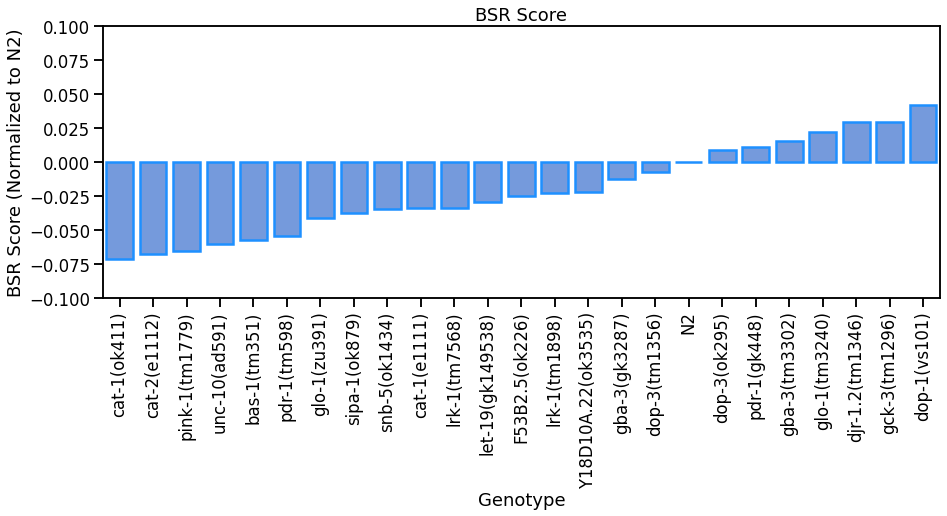

In [33]:
Title = "BSR Score" #<---------------- Input Here -----------------
sns.set_context("talk")
plt.figure(linewidth = 1)
plt.figure(figsize=(15, 5))
plt.gca().xaxis.grid(False)
ax = sns.barplot(x="Genotype", 
             y = 'Score', 
             data = speed_diff, #<--------------- Input Here -------------
             color = 'CornflowerBlue',
             edgecolor="DodgerBlue",
             linewidth = 2.5,
#              seed=5,
#              ci = 95, # 'sd' for SD, '68' for SEM
#              palette = ['grey',
#                         'black'
#                        ]
                )
plt.xlabel("Genotype")
plt.xticks(rotation=90)
plt.ylabel("BSR Score (Normalized to N2)")
plt.ylim(top = 0.1)
plt.ylim(bottom = -0.1)
plt.title(Title)
# plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.savefig(f'{Title}.png', format='png', dpi=450, bbox_inches = 'tight')
plt.show()

# 8.3 Graphing Bar Graphs

# Speed Barplots Comparison

In [ ]:
# Valid Measurement inputs(change var)
# 1:'speed', <---
# 2: "x",
# 3: "y",
# 4: "angularspeed", <-----
# 5: "pathlength",
# 6: "kink",  <---
# 7: "bias", <----
# 8: "curve", <---
# 9: "dir",<----
# 10: "crab",<----
# 11: "length",<---
# 12: "midline",<----
# 13: "width",<----
# 14: "morphwidth",<----
# 15: "area"<----

start = 200
point = 400
var = "area"
chunkeddata0 = TotalConcatenated[TotalConcatenated["time"] >= start]
chunkeddata = chunkeddata0[chunkeddata0["time"] <= point]
chunkeddata_mean = chunkeddata.groupby(["Strain","worm"], as_index=False).mean()
chunkeddata_mean[['Genotype', 'Treatment']] = chunkeddata_mean['Strain'].str.split(' - ', 1, expand=True)

Title = f"{var} - {start}-{point} seconds" #<---------------- Input Here -----------------
sns.set_context("talk")
plt.figure(linewidth = 2.5)
plt.figure(figsize=(15, 3))
plt.gca().xaxis.grid(False)
ax = sns.barplot(x="Genotype", 
             y = var, 
             data = chunkeddata_mean, #<--------------- Input Here -------------
             hue = 'Treatment',
             edgecolor="black",
             linewidth = 2.5,
#              seed=5,
             ci = 95, # 'sd' for SD, '68' for SEM
             palette = ['grey',
                        'black'
                       ]
                )
plt.xlabel("Strain and Condition")
# plt.ylabel("Average Speed (mm/s)")
plt.title(Title)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.savefig(f'{Title}.png', format='png', dpi=450, bbox_inches = 'tight')
plt.show()

In [ ]:
# Test Cell
# chunkeddata_mean

In [ ]:
# Test Cell
# TotalConcatenated.describe()
# chunkeddata0
# chunkeddata

# Bias Barplots Comparison

In [ ]:
point = 420
var = "bias"
chunkeddata0 = TotalConcatenated[TotalConcatenated["time"] >= 0]
chunkeddata = chunkeddata0[chunkeddata0["time"] <= point]

Title = f"{var} - First {point} seconds" #<---------------- Input Here -----------------
sns.set_context("talk")
plt.figure(linewidth = 2.5)
plt.figure(figsize=(15, 5))
plt.gca().xaxis.grid(False)
ax = sns.barplot(x="Genotype", 
             y = var, 
             data = chunkeddata, #<--------------- Input Here -------------
             hue = 'Treatment',
             edgecolor="black",
             linewidth = 2.5,
             ci = None,
             palette = ['black',
                        'grey'
                       ]
                )
plt.xlabel("Strain and Condition")
# plt.ylabel("Average Speed (mm/s)")
plt.title(Title)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
# plt.savefig(f'{Title}.png', format='png', dpi=450, bbox_inches = 'tight')
plt.show()

# Dispersion Plot (starburst) - *Not Functional In Current Iteration

In [ ]:
timepoint=60 # <---------------------- indicate end timepoint


chunkeddata0 = TotalConcatenated[TotalConcatenated["time"] >= 0]
chunkeddata = chunkeddata0[chunkeddata0["time"] <= timepoint]

Title = f"0 - {timepoint} seconds" #<--------------------
sns.set(context="talk")
# sns.set_context("talk", fontscale=0.5)
plt.figure(linewidth = 2.5)
plt.figure(figsize=(16, 4))
g = sns.FacetGrid(chunkeddata, row = "Treatment", col = "Genotype", margin_titles=True) #<--------------------------
g.map_dataframe(sns.scatterplot, "x_0", "y_0", hue="time", palette = "YlOrBr", linewidth=0, alpha=0.7, s=2)
g.set_axis_labels("x position", "y position")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
# g.fig.subplots_adjust(top=0.8)
g.fig.suptitle(f"{Title} Dispersion map", y=1.05)
g.tight_layout()
# plt.savefig(f'{Title} Dispersion map.png', format='png', dpi=900, bbox_inches = 'tight')

# Total Distance Traveled Trace - *Not Functional In Current Iteration

In [ ]:
start=50
timepoint=420 # <---------------------- indicate end timepoint


chunkeddata0 = TotalConcatenated[TotalConcatenated["time"] >= start]
chunkeddata = chunkeddata0[chunkeddata0["time"] <= timepoint]

Title = f"{start} - {timepoint} seconds" #<--------------------
sns.set(context="talk")
# sns.set_context("talk", fontscale=0.5)
plt.figure(linewidth = 2.5)
plt.figure(figsize=(16, 4))
g = sns.FacetGrid(chunkeddata, row = "Treatment", col = "Genotype", margin_titles=True, ylim=[0,15]) #<---- set y-lim
g.map_dataframe(sns.scatterplot, "time", "distance", hue="worm", palette = "colorblind", linewidth=0, alpha=0.7, s=2)
# g.set_axis_labels("x position", "y position")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
# g.fig.subplots_adjust(top=0.8)
g.fig.suptitle(f'{Title} Total Distance Traveled Trace', y=1.05)
g.tight_layout()
# plt.savefig(f'{Title} Total Distance Traveled Trace.png', format='png', dpi=900, bbox_inches = 'tight')

# Done!

In [ ]:
AfterOneHundredSecs = TotalConcatenated[TotalConcatenated["time_bin"] >= 100].reset_index(drop=True)
print(AfterOneHundredSecs)

In [ ]:
AfterOneHundredMean = AfterOneHundredSecs.groupby(["Strain", "worm", "Genotype", "Treatment"], as_index=False).mean()
print(AfterOneHundredMean)

In [ ]:
# Valid Measurement inputs(change var)
# 1:'speed', <---
# 2: "x",
# 3: "y",
# 4: "angularspeed", <-----
# 5: "pathlength",
# 6: "kink",  <---
# 7: "bias", <----
# 8: "curve", <---
# 9: "dir",<----
# 10: "crab",<----
# 11: "length",<---
# 12: "midline",<----
# 13: "width",<----
# 14: "morphwidth",<----
# 15: "area"<----


var = "speed"

Title = f"{var}" #<---------------- Input Here -----------------
sns.set_context("talk")
plt.figure(linewidth = 2.5)
plt.figure(figsize=(15, 3))
plt.gca().xaxis.grid(False)
ax = sns.barplot(x="Genotype", 
             y = var, 
             data = AfterOneHundredMean, #<--------------- Input Here -------------
             hue = 'Treatment',
             edgecolor="black",
             linewidth = 2.5,
#              seed=5,
             ci = 95, # 'sd' for SD, '68' for SEM
             palette = ['grey',
                        'black'
                       ]
                )
plt.xlabel("Strain and Condition")
# plt.ylabel("Average Speed (mm/s)")
plt.title(Title)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
# plt.savefig(f'{Title}.png', format='png', dpi=450, bbox_inches = 'tight')
plt.show()

In [ ]:
AfterOneHundredCAT = AfterOneHundredMean[AfterOneHundredMean.Genotype != "Test"]
AfterOneHundredTEST = AfterOneHundredMean[AfterOneHundredMean.Genotype != "cat-2 (e1112)"]


In [ ]:
print(AfterOneHundredMean)
print(AfterOneHundredCAT)
print(AfterOneHundredTEST)

In [ ]:
AfterOneHundredCAT.anova(dv="speed", between=["Genotype","Treatment"])

In [ ]:
AfterOneHundredTEST.anova(dv="speed", between=["Genotype","Treatment"]).round(7)